# Medical Database

## Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, roc_auc_score
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC, KMeansSMOTE
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


## Loading Dataset


In [2]:
# Load dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/train (1).csv')

## Exploratory Data Analysis

### Data Exploration

In [3]:
#exploring dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

In [4]:
# Information about the dataset
df.head(5)

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  ...  citoglipton_No  insulin_No  \
0            True                 False  ...            True        True   
1            True                 False  ...            True       False   
2            True                 False  ...            True        True   
3            True                 False  ...            True        True   
4            True                 False  ...            True        True   

   glyburide-metformin_No  glipizide-metformin_No  \
0                    True                    True   
1                    True                    True   
2                    True                    True   
3                    True                    True   
4                    True                    True   

   glimepiride-pioglitazone_No  metformin-rosiglitazone_No  \
0                         True                        True   
1                         True                        True   
2                         True                        True   
3                         True                        True   
4                         True                        True   

   metformin-pioglitazone_No  change_No  diabetesMed_Yes  readmitted  
0                       True       True             True           0  
1                       True      False             True           1  
2                       True       True             True           1  
3                       True       True             True           1  
4                       True       True            False           0  

[5 rows x 65 columns]

In [5]:
#shape of dataframe
df.shape

(25000, 65)

In [6]:
# Get the column names
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [7]:
#replace True and False with 1's and 0's
df = df.replace({True: 1, False: 0})

In [8]:
# Recheck for basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  int64
 9   race_AfricanAmerican                      25000 non-null  int64
 10  gender_Female                             25000 non-null  

In [9]:
# Rechecking for missing values
df.isnull().sum().sum()
# Count the total number of columns with '?' as missing values
total_columns_with_question_mark = df.isin(['?']).sum()[df.isin(['?']).sum() > 0].count()
print("\n Total columns with '?' as null values:", total_columns_with_question_mark)
print("")
# Display the count of '?' occurrences for each column with missing values
question_mark_counts = df.isin(['?']).sum()[df.isin(['?']).sum() > 0]
print(question_mark_counts)

# Count the total number of columns with '?' as missing values
total_columns_with_NaN = df.isin(['NaN']).sum()[df.isin(['NaN']).sum() > 0].count()
print("\n Total columns with 'NaN' as null values:", total_columns_with_NaN)
print("")
# Display the count of '?' occurrences for each column with missing values
NaN_counts = df.isin(['NaN']).sum()[df.isin(['NaN']).sum() > 0]
print(NaN_counts)


 Total columns with '?' as null values: 0

Series([], dtype: int64)

 Total columns with 'NaN' as null values: 0

Series([], dtype: int64)


In [10]:
# Check for duplicated rows
print(df.duplicated().sum())

0


In [11]:
# Reprint the dataset
df.head(5)

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                14                  41               0               11   
1                 2                  30               0               12   
2                 5                  66               0               22   
3                 3                  63               0                8   
4                 5                  40               0                6   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 6   
1                  0                 0                 1                 9   
2                  1                 0                 2                 9   
3                  0                 0                 0                 8   
4                  0                 0                 1                 9   

   race_Caucasian  race_AfricanAmerican  ...  citoglipton_No  insulin_No  \
0               1                     0  ...               1           1   
1               1                     0  ...               1           0   
2               1                     0  ...               1           1   
3               1                     0  ...               1           1   
4               1                     0  ...               1           1   

   glyburide-metformin_No  glipizide-metformin_No  \
0                       1                       1   
1                       1                       1   
2                       1                       1   
3                       1                       1   
4                       1                       1   

   glimepiride-pioglitazone_No  metformin-rosiglitazone_No  \
0                            1                           1   
1                            1                           1   
2                            1                           1   
3                            1                           1   
4                            1                           1   

   metformin-pioglitazone_No  change_No  diabetesMed_Yes  readmitted  
0                          1          1                1           0  
1                          1          0                1           1  
2                          1          1                1           1  
3                          1          1                1           1  
4                          1          1                0           0  

[5 rows x 65 columns]

## Exploring Dataset

In [12]:
#dataframe description
df.describe()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      25000.000000         25000.00000    25000.000000     25000.000000   
mean           4.395640            42.96012        1.341080        15.988440   
std            2.991165            19.76881        1.705398         8.107743   
min            1.000000             1.00000        0.000000         1.000000   
25%            2.000000            31.00000        0.000000        10.000000   
50%            4.000000            44.00000        1.000000        15.000000   
75%            6.000000            57.00000        2.000000        20.000000   
max           14.000000           126.00000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  \
count       25000.000000      25000.000000       25000.00000   
mean            0.365920          0.203280           0.64300   
std             1.224419          0.982973           1.26286   
min             0.000000          0.000000           0.00000   
25%             0.000000          0.000000           0.00000   
50%             0.000000          0.000000           0.00000   
75%             0.000000          0.000000           1.00000   
max            36.000000         64.000000          21.00000   

       number_diagnoses  race_Caucasian  race_AfricanAmerican  ...  \
count      25000.000000    25000.000000          25000.000000  ...   
mean           7.420160        0.742120              0.192680  ...   
std            1.940932        0.437476              0.394412  ...   
min            1.000000        0.000000              0.000000  ...   
25%            6.000000        0.000000              0.000000  ...   
50%            8.000000        1.000000              0.000000  ...   
75%            9.000000        1.000000              0.000000  ...   
max           16.000000        1.000000              1.000000  ...   

       citoglipton_No    insulin_No  glyburide-metformin_No  \
count         25000.0  25000.000000            25000.000000   
mean              1.0      0.468680                0.993640   
std               0.0      0.499028                0.079497   
min               1.0      0.000000                0.000000   
25%               1.0      0.000000                1.000000   
50%               1.0      0.000000                1.000000   
75%               1.0      1.000000                1.000000   
max               1.0      1.000000                1.000000   

       glipizide-metformin_No  glimepiride-pioglitazone_No  \
count            25000.000000                 25000.000000   
mean                 0.999840                     0.999960   
std                  0.012648                     0.006325   
min                  0.000000                     0.000000   
25%                  1.000000                     1.000000   
50%                  1.000000                     1.000000   
75%                  1.000000                     1.000000   
max                  1.000000                     1.000000   

       metformin-rosiglitazone_No  metformin-pioglitazone_No     change_No  \
count                     25000.0                    25000.0  25000.000000   
mean                          1.0                        1.0      0.542600   
std                           0.0                        0.0      0.498192   
min                           1.0                        1.0      0.000000   
25%                           1.0                        1.0      0.000000   
50%                           1.0                        1.0      1.000000   
75%                           1.0                        1.0      1.000000   
max                           1.0                        1.0      1.000000   

       diabetesMed_Yes    readmitted  
count     25000.000000  25000.000000  
mean          0.767400      0.456400  
std           0.422498      0.498105  
min           0.000000      0.000000  
25%           1.000000      0.000000  
50%           

In [13]:
#identifying correlations within the dataset
df.corr()

time_in_hospital  num_lab_procedures  \
time_in_hospital                    1.000000            0.324888   
num_lab_procedures                  0.324888            1.000000   
num_procedures                      0.192580            0.057895   
num_medications                     0.461874            0.273101   
number_outpatient                  -0.013918           -0.018161   
...                                      ...                 ...   
metformin-rosiglitazone_No               NaN                 NaN   
metformin-pioglitazone_No                NaN                 NaN   
change_No                          -0.106270           -0.070928   
diabetesMed_Yes                     0.066586            0.031332   
readmitted                          0.057583            0.040087   

                            num_procedures  num_medications  \
time_in_hospital                  0.192580         0.461874   
num_lab_procedures                0.057895         0.273101   
num_procedures                    1.000000         0.390198   
num_medications                   0.390198         1.000000   
number_outpatient                -0.028145         0.039319   
...                                    ...              ...   
metformin-rosiglitazone_No             NaN              NaN   
metformin-pioglitazone_No              NaN              NaN   
change_No                        -0.009640        -0.254378   
diabetesMed_Yes                  -0.007307         0.194301   
readmitted                       -0.049950         0.056378   

                            number_outpatient  number_emergency  \
time_in_hospital                    -0.013918         -0.013573   
num_lab_procedures                  -0.018161         -0.016669   
num_procedures                      -0.028145         -0.039572   
num_medications                      0.039319          0.011724   
number_outpatient                    1.000000          0.095898   
...                                       ...               ...   
metformin-rosiglitazone_No                NaN               NaN   
metformin-pioglitazone_No                 NaN               NaN   
change_No                           -0.027785         -0.034593   
diabetesMed_Yes                      0.026432          0.023894   
readmitted                           0.087092          0.100618   

                            number_inpatient  number_diagnoses  \
time_in_hospital                    0.073334          0.215924   
num_lab_procedures                  0.038290          0.154354   
num_procedures                     -0.073735          0.071921   
num_medications                     0.058422          0.267158   
number_outpatient                   0.115013          0.096235   
...                                      ...               ...   
metformin-rosiglitazone_No               NaN               NaN   
metformin-pioglitazone_No                NaN               NaN   
change_No                          -0.016550         -0.068236   
diabetesMed_Yes                     0.021595          0.028840   
readmitted                          0.216490          0.123423   

                            race_Caucasian  race_AfricanAmerican  ...  \
time_in_hospital                 -0.001568              0.013468  ...   
num_lab_procedures               -0.025144              0.027197  ...   
num_procedures                    0.028521             -0.024382  ...   
num_medications                   0.051094             -0.031677  ...   
number_outpatient                 0.058106             -0.046936  ...   
...                                    ...                   ...  ...   
metformin-rosiglitazone_No             NaN                   NaN  ...   
metformin-pioglitazone_No              NaN                   NaN  ...   
change_No                        -0.000157              0.008203  ...   
diabetesMed_Yes                  -0.012676              0.009706  ...   
readmitted                        0.027060           

## Dividing Variables into Different Analysis Groups

Separate numerical and categorical variables


In [14]:
# List of numerical variables
numerical_vars = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                  'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# List of categorical variables
categorical_vars = ['race_Caucasian', 'race_AfricanAmerican', 'gender_Female',
                    'age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)',
                    'payer_code_?', 'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
                    'medical_specialty_?', 'medical_specialty_InternalMedicine',
                    'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
                    'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414', 'diag_1_786',
                    'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427', 'diag_3_250', 'diag_3_401',
                    'diag_3_276', 'diag_3_428', 'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
                    'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No', 'glimepiride_No',
                    'acetohexamide_No', 'glipizide_No', 'glyburide_No', 'tolbutamide_No',
                    'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No', 'miglitol_No', 'troglitazone_No',
                    'tolazamide_No', 'examide_No', 'citoglipton_No', 'insulin_No', 'glyburide-metformin_No',
                    'glipizide-metformin_No', 'glimepiride-pioglitazone_No', 'metformin-rosiglitazone_No',
                    'metformin-pioglitazone_No', 'change_No', 'diabetesMed_Yes']

In [15]:
# Separate numerical and categorical variables
numerical_data = df[numerical_vars]
categorical_data = df[categorical_vars]

List of variables for slicing


In [16]:
# List of variables for slicing
variables_to_analyze = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
    'race_Caucasian', 'race_AfricanAmerican', 'gender_Female',
    'age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)',
    'payer_code_?', 'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
    'medical_specialty_?', 'medical_specialty_InternalMedicine',
    'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
    'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414', 'diag_1_786',
    'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427', 'diag_3_250',
    'diag_3_401', 'diag_3_276', 'diag_3_428', 'max_glu_serum_None', 'A1Cresult_None',
    'metformin_No', 'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
    'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
    'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No',
    'miglitol_No', 'troglitazone_No', 'tolazamide_No', 'examide_No',
    'citoglipton_No', 'insulin_No', 'glyburide-metformin_No',
    'glipizide-metformin_No', 'glimepiride-pioglitazone_No',
    'metformin-rosiglitazone_No', 'metformin-pioglitazone_No', 'change_No',
    'diabetesMed_Yes'
]

Grouping variables for slicing


In [17]:
# Define groups of variables for slicing
age_variables = ['age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)']
race_variables = ['race_Caucasian', 'race_AfricanAmerican']
hospital_variables = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
payer_variables = ['payer_code_?', 'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC']
medical_specialty_variables = ['medical_specialty_?', 'medical_specialty_InternalMedicine',
                               'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
                               'medical_specialty_Cardiology']
diagnosis_variables = ['diag_1_428', 'diag_1_414', 'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250',
                      'diag_2_427', 'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428']
medicine_variables = ['max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
                    'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No', 'glimepiride_No',
                    'acetohexamide_No', 'glipizide_No', 'glyburide_No', 'tolbutamide_No',
                    'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No', 'miglitol_No', 'troglitazone_No',
                    'tolazamide_No', 'examide_No', 'citoglipton_No', 'insulin_No', 'glyburide-metformin_No',
                    'glipizide-metformin_No', 'glimepiride-pioglitazone_No', 'metformin-rosiglitazone_No',
                    'metformin-pioglitazone_No', 'change_No', 'diabetesMed_Yes']  # Excluding change_No and diabetesMed_Yes
diabetes_variables = ['change_No', 'diabetesMed_Yes']

Grouping variables by independent and dependent for analysis

In [18]:
independent = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures',
        'num_medications', 'number_outpatient', 'number_emergency',
        'number_inpatient', 'number_diagnoses', 'race_Caucasian',
        'race_AfricanAmerican', 'gender_Female', 'age_[70-80)',
        'age_[60-70)', 'age_[50-60)', 'age_[80-90)',
        'age_[40-50)', 'payer_code_?', 'payer_code_MC',
        'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
        'medical_specialty_?', 'medical_specialty_InternalMedicine',
        'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
        'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
        'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
        'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428', 'max_glu_serum_None',
        'A1Cresult_None', 'metformin_No', 'repaglinide_No', 'nateglinide_No',
        'chlorpropamide_No', 'glimepiride_No', 'acetohexamide_No',
        'glipizide_No', 'glyburide_No', 'tolbutamide_No',
        'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No',
        'miglitol_No', 'troglitazone_No', 'tolazamide_No',
        'examide_No', 'citoglipton_No', 'insulin_No',
        'glyburide-metformin_No', 'glipizide-metformin_No',
        'glimepiride-pioglitazone_No', 'metformin-rosiglitazone_No',
        'metformin-pioglitazone_No', 'change_No', 'diabetesMed_Yes'
       ]]  # Select the independent variables
dependent = df['readmitted']  # Select the dependent variable


## Processing Numerical Values

#### Data visualization

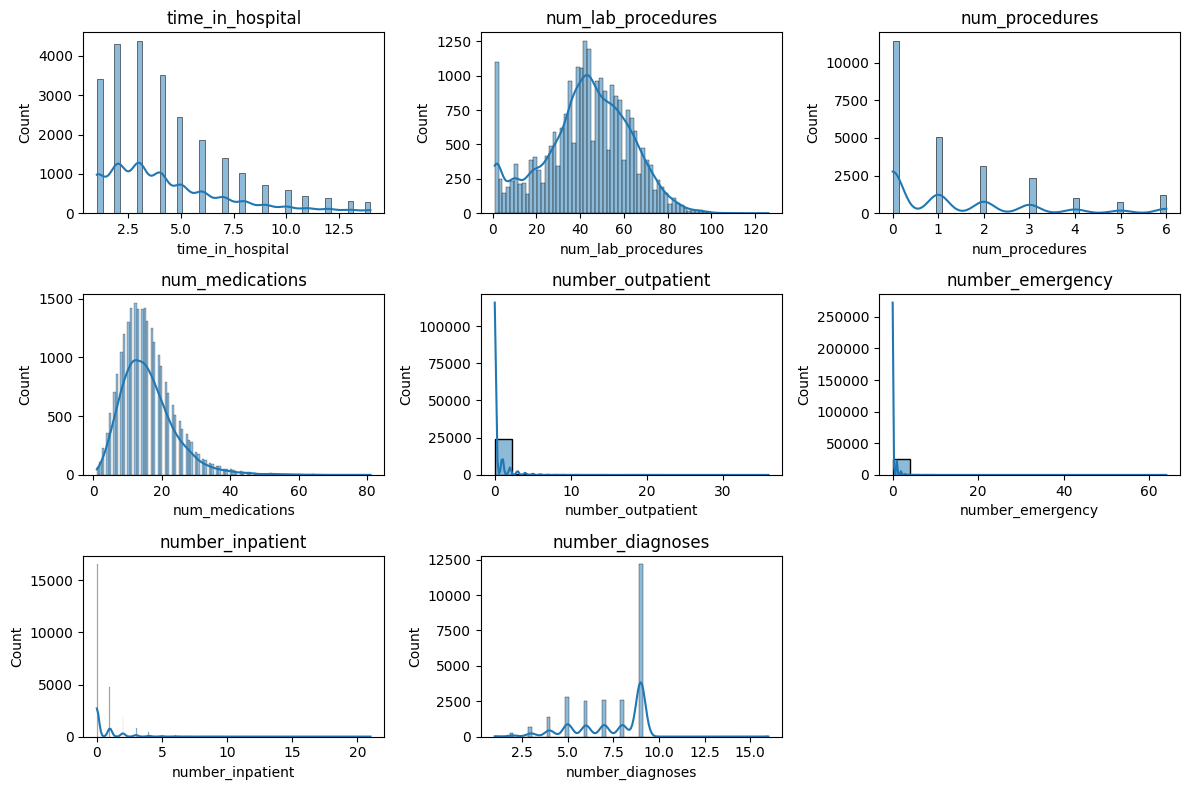

In [19]:
# Histogram for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

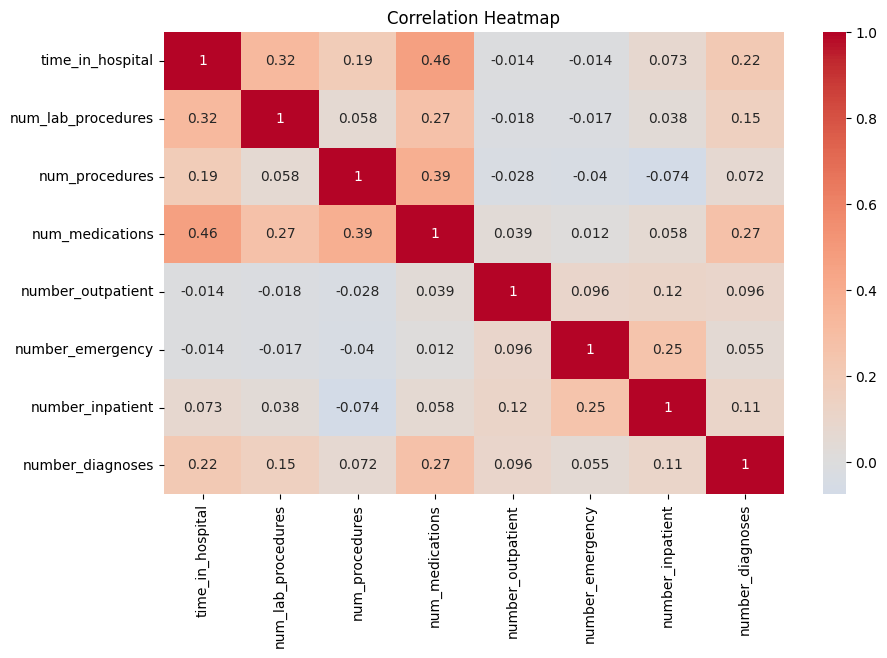

In [20]:
# Correlation heatmap for numerical features
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

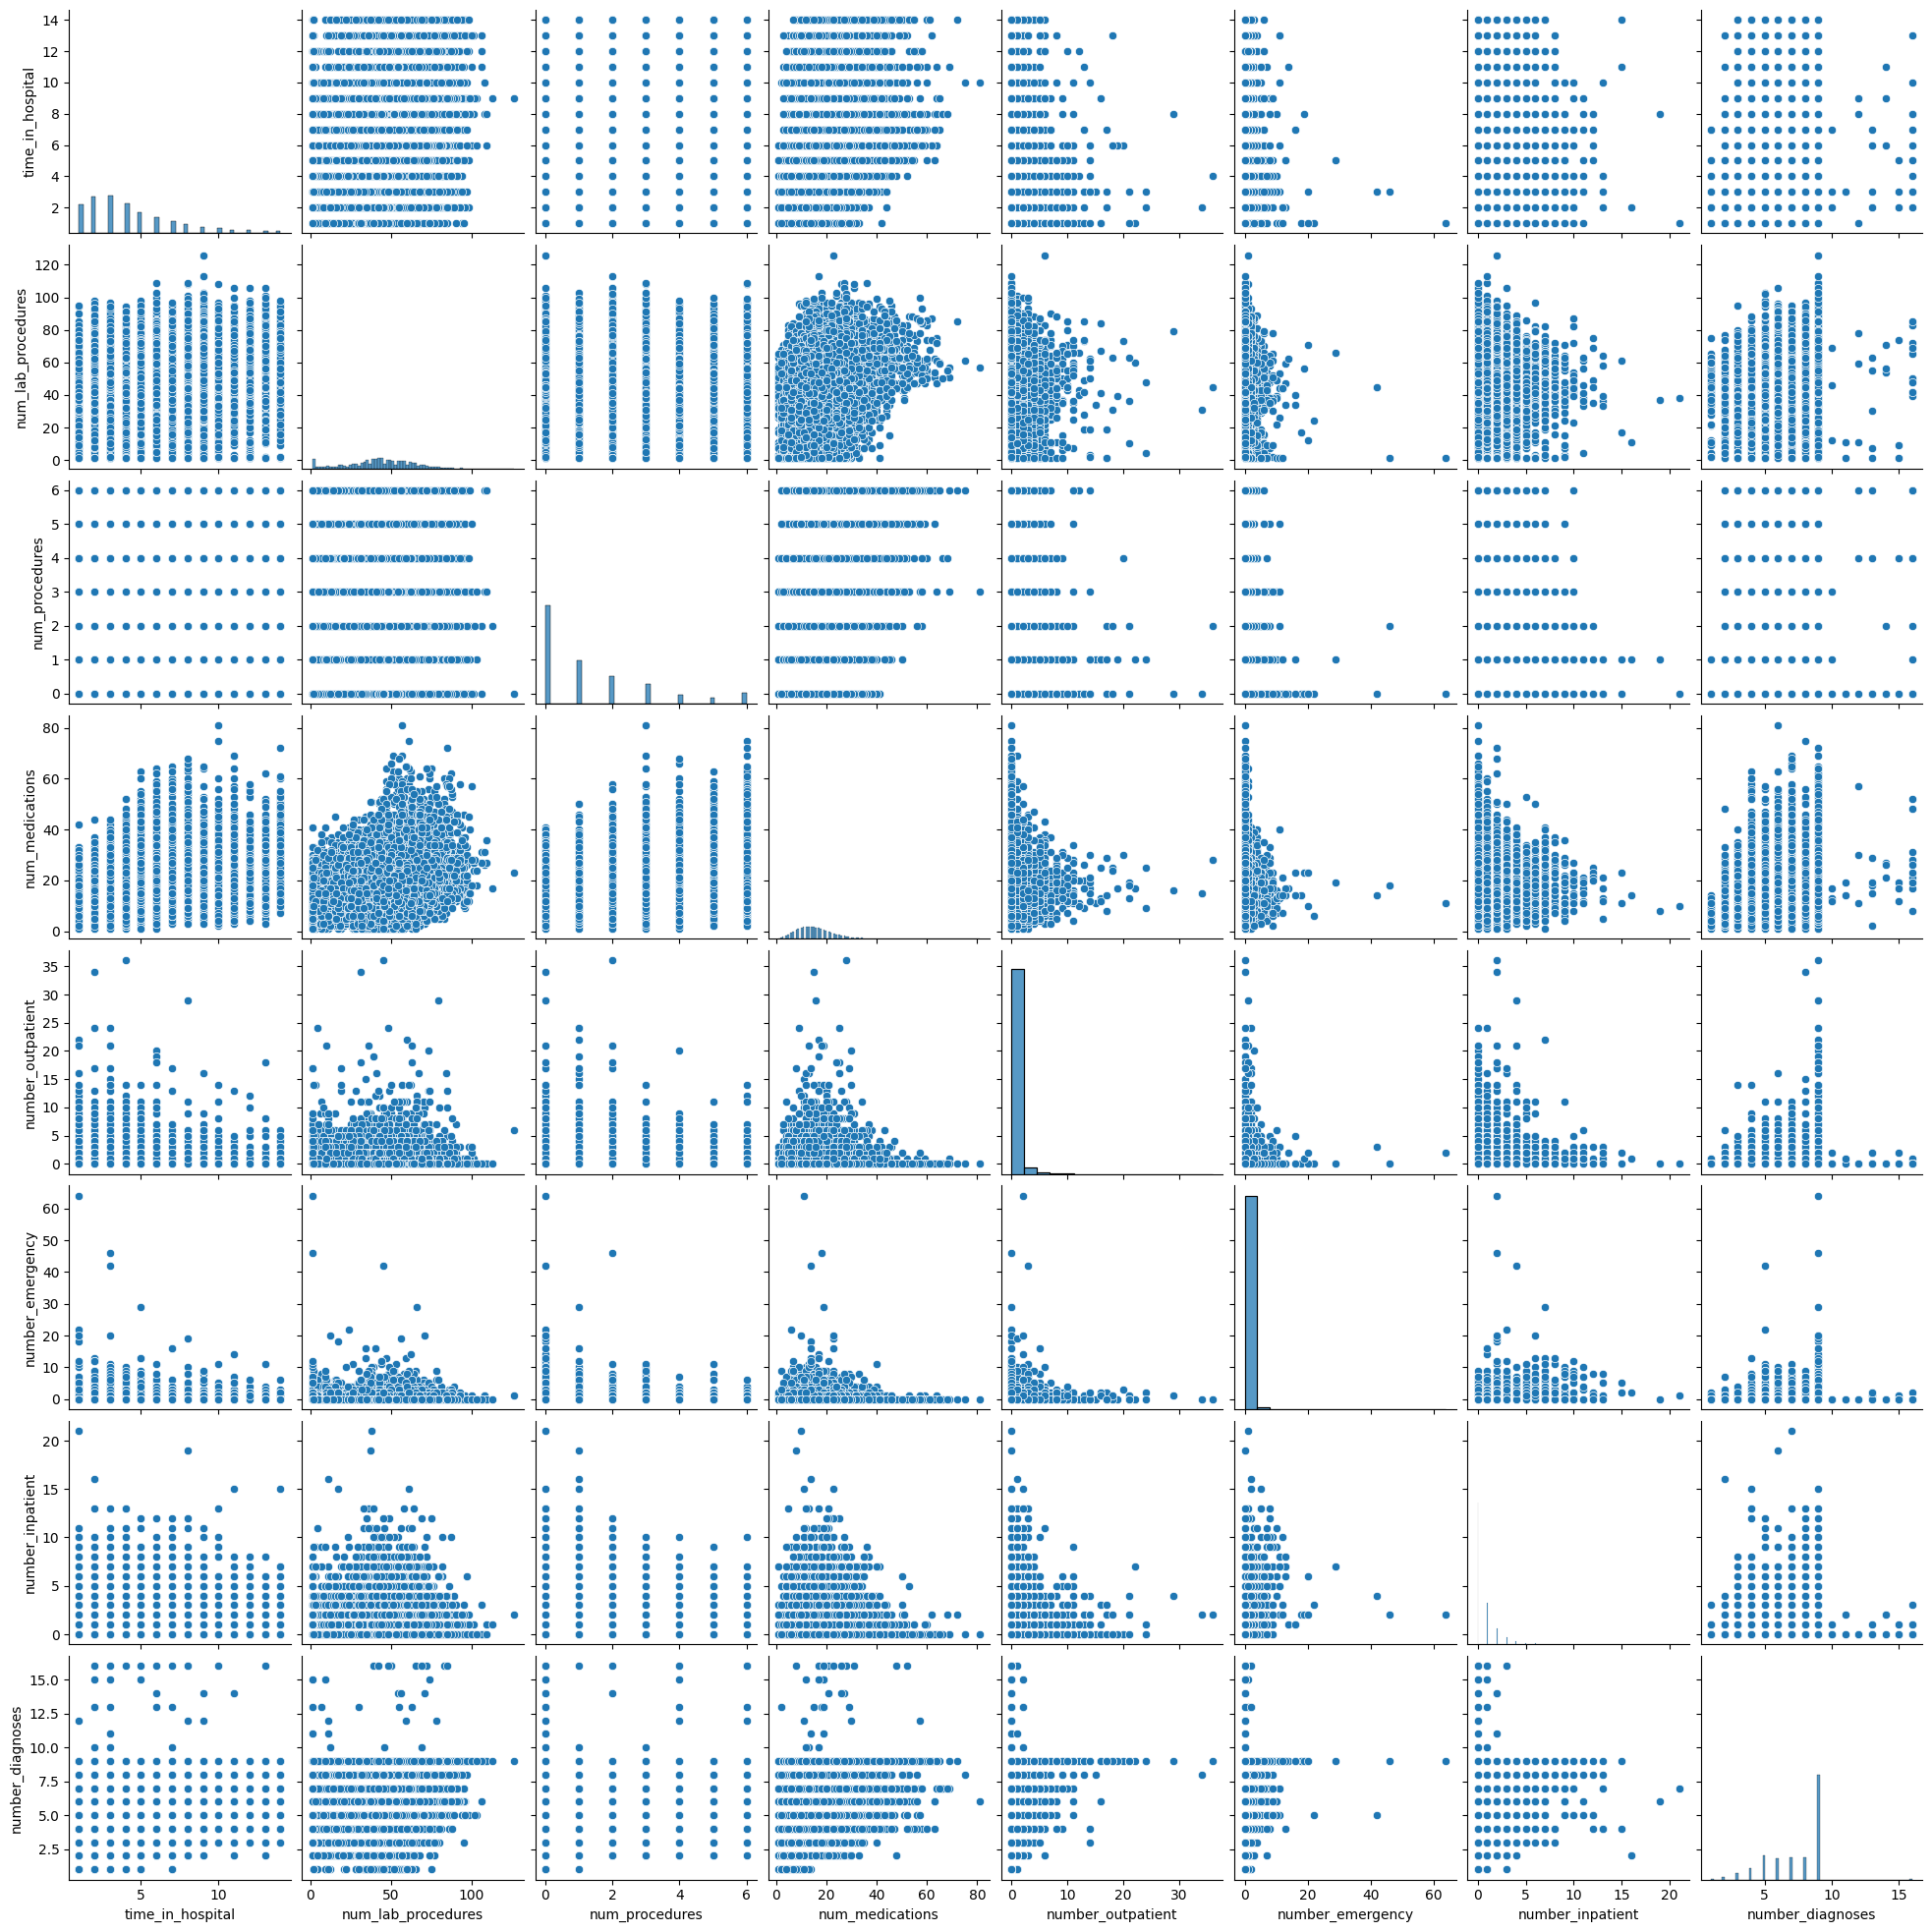

In [21]:
# Pairplot for selected numerical features
sns.pairplot(data=df[numerical_vars])
plt.show()

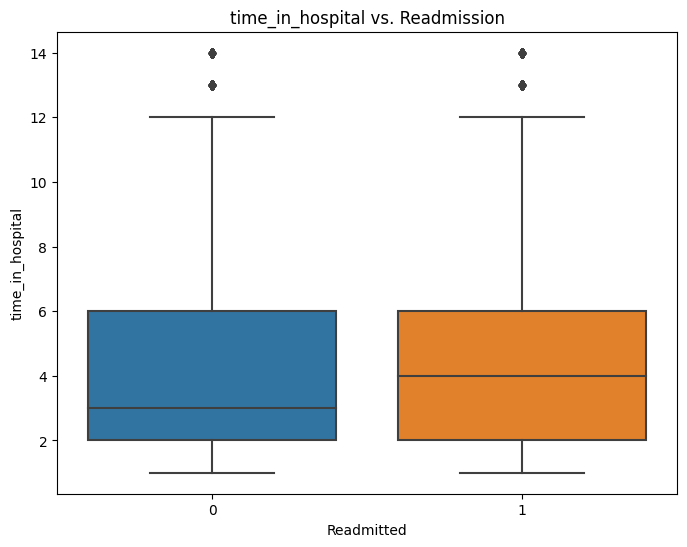

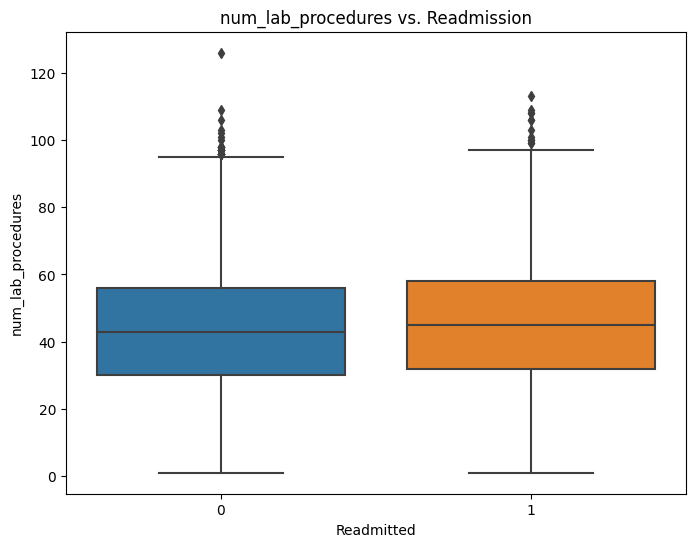

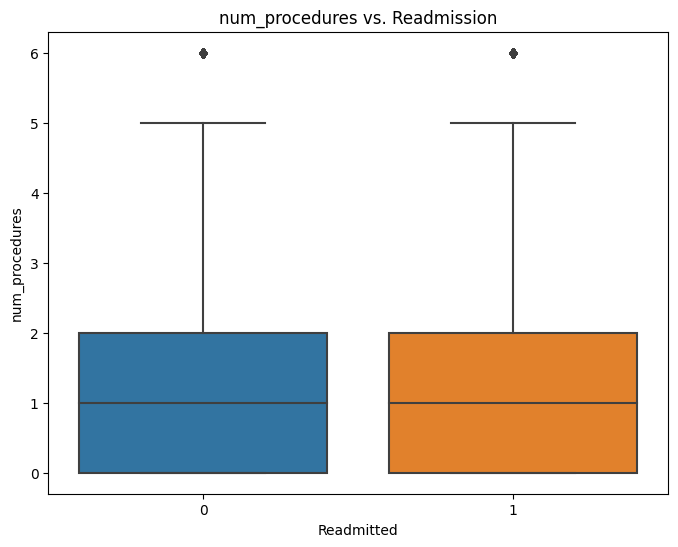

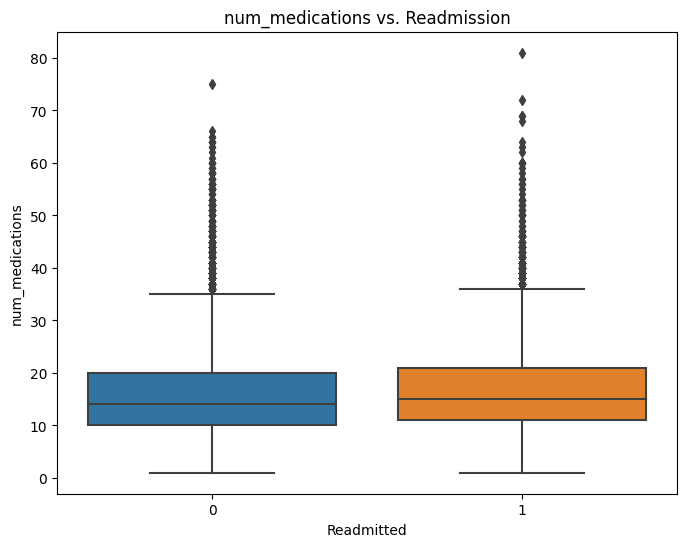

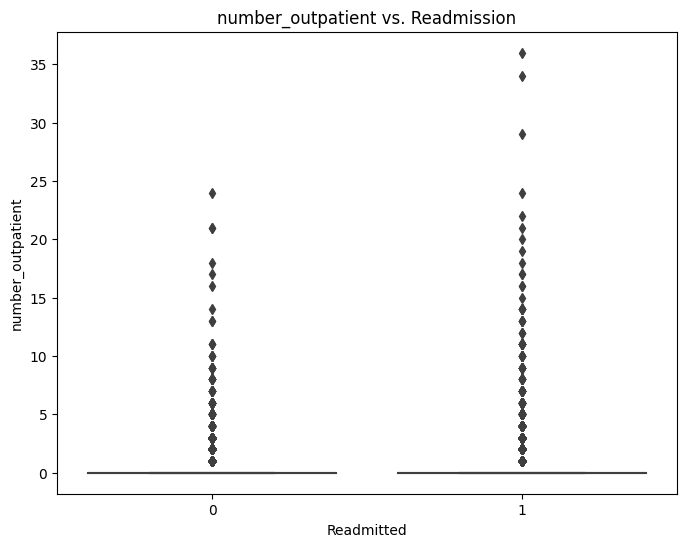

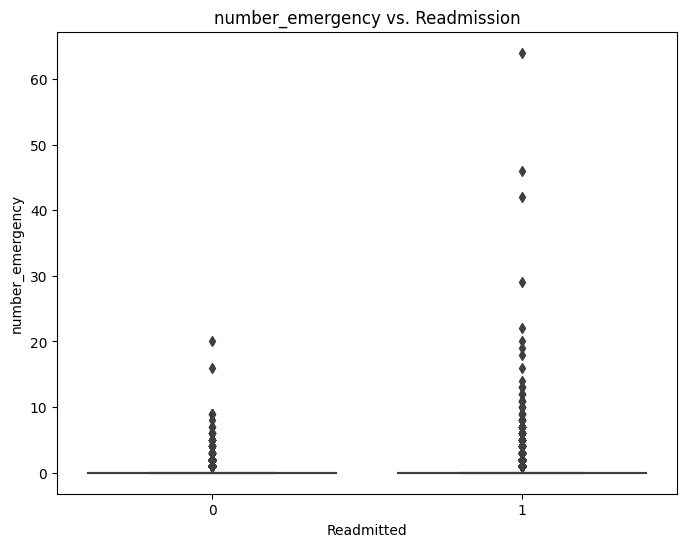

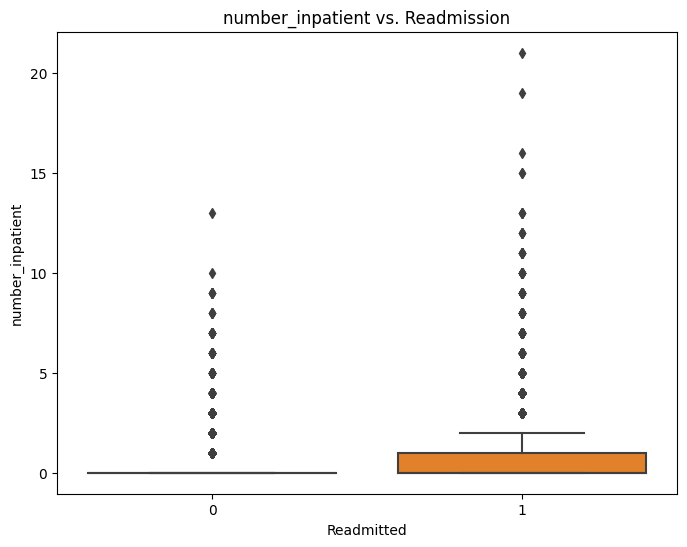

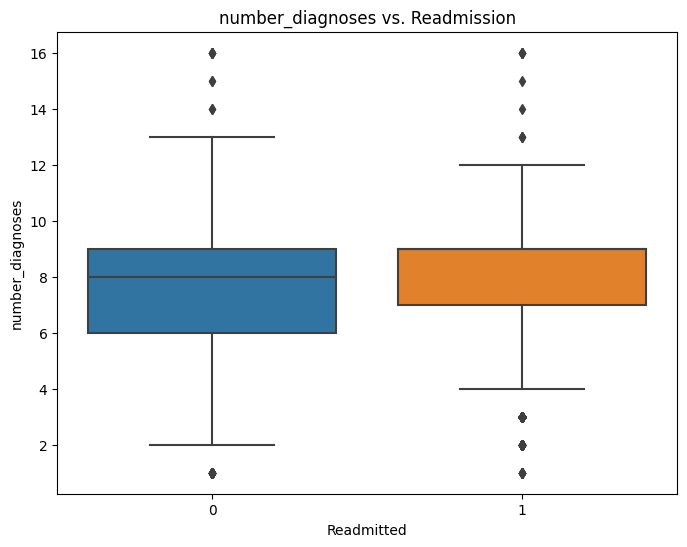

In [22]:
# Box plot for comparing numerical features across categories
for feature in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='readmitted', y=feature)
    plt.title(f'{feature} vs. Readmission')
    plt.xlabel('Readmitted')
    plt.ylabel(feature)
    plt.show()


### Processing Categorical Values

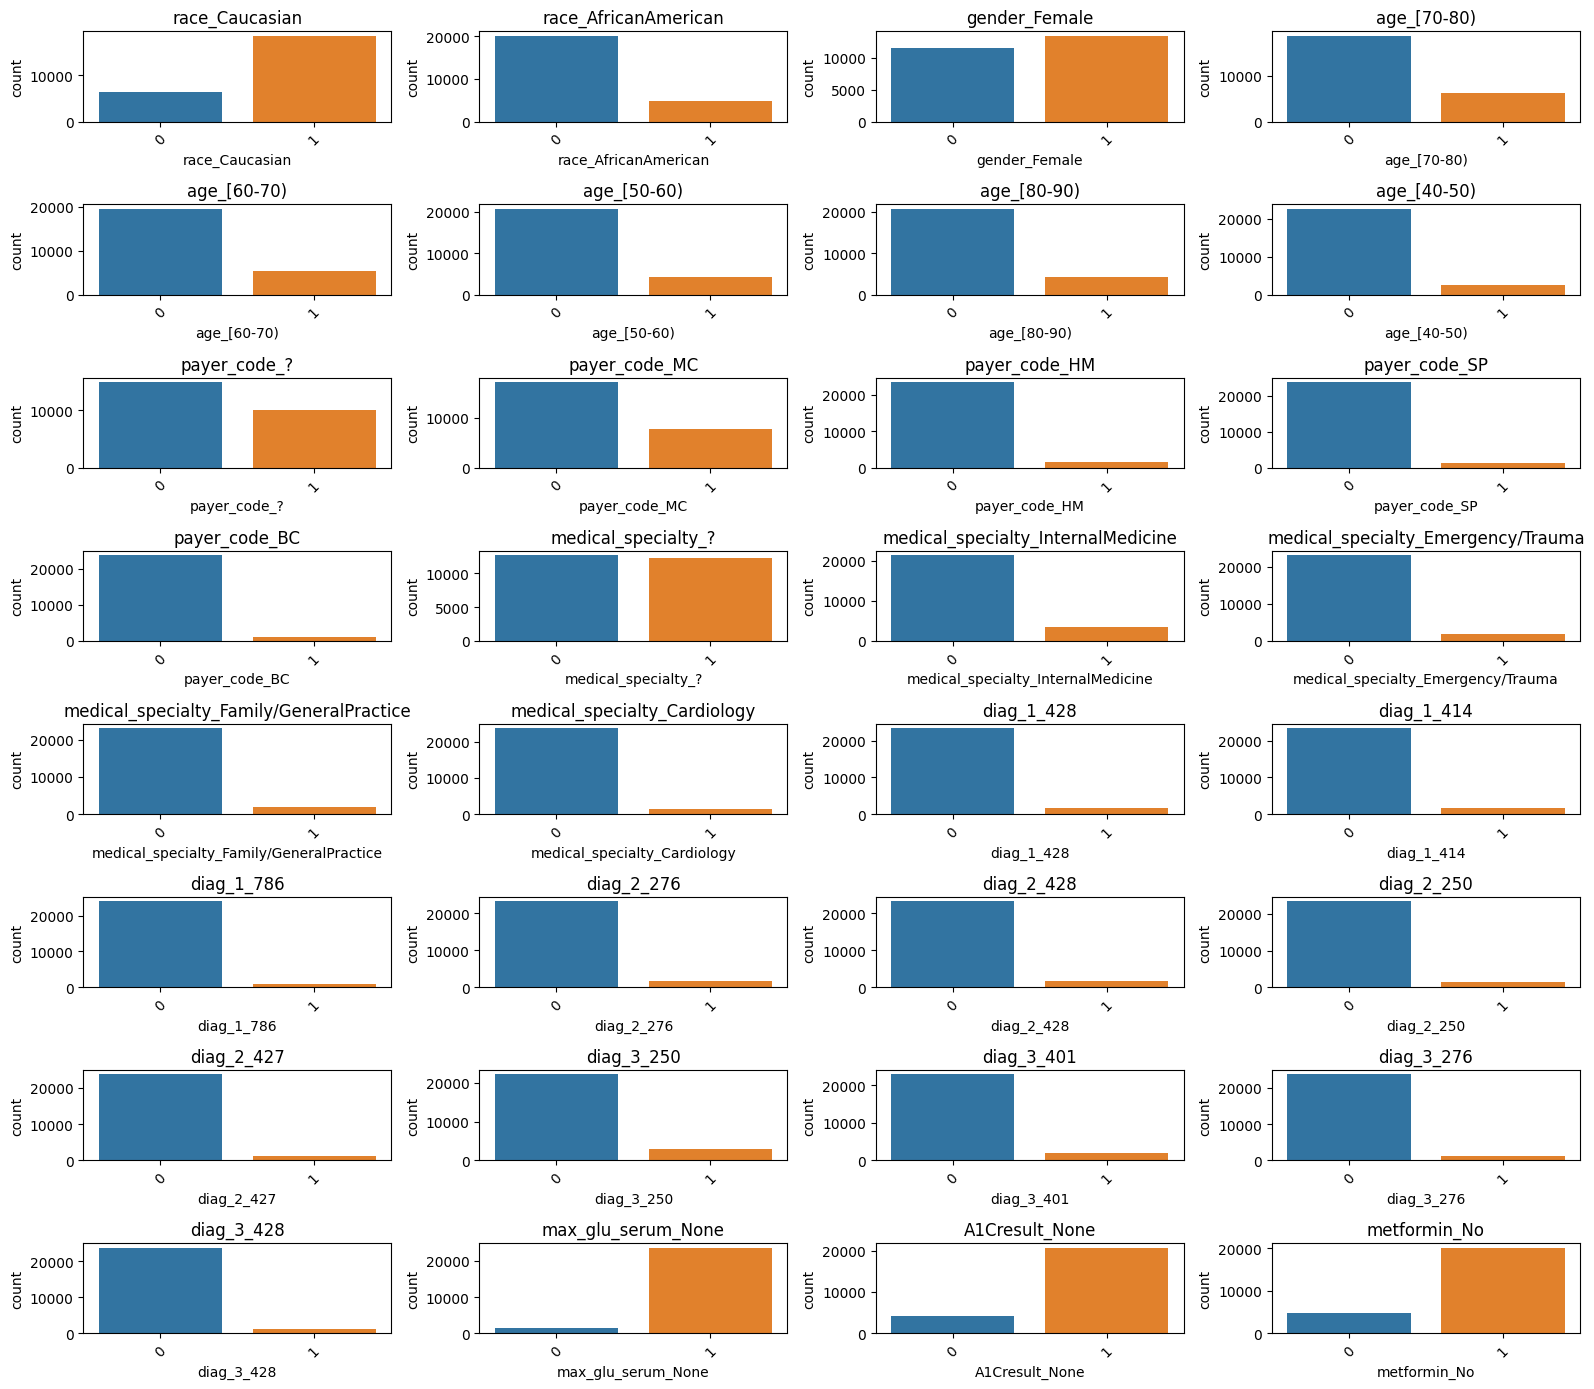

In [23]:
# Define the number of rows and columns for subplots
num_rows = 8
num_cols = 4
total_plots = num_rows * num_cols

# Count plot for categorical features
plt.figure(figsize=(16, 14))

for i, feature in enumerate(categorical_vars, 1):
    # Check if all subplots are used, then break
    if i > total_plots:
        break

    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.title(feature)

plt.tight_layout()
plt.show()



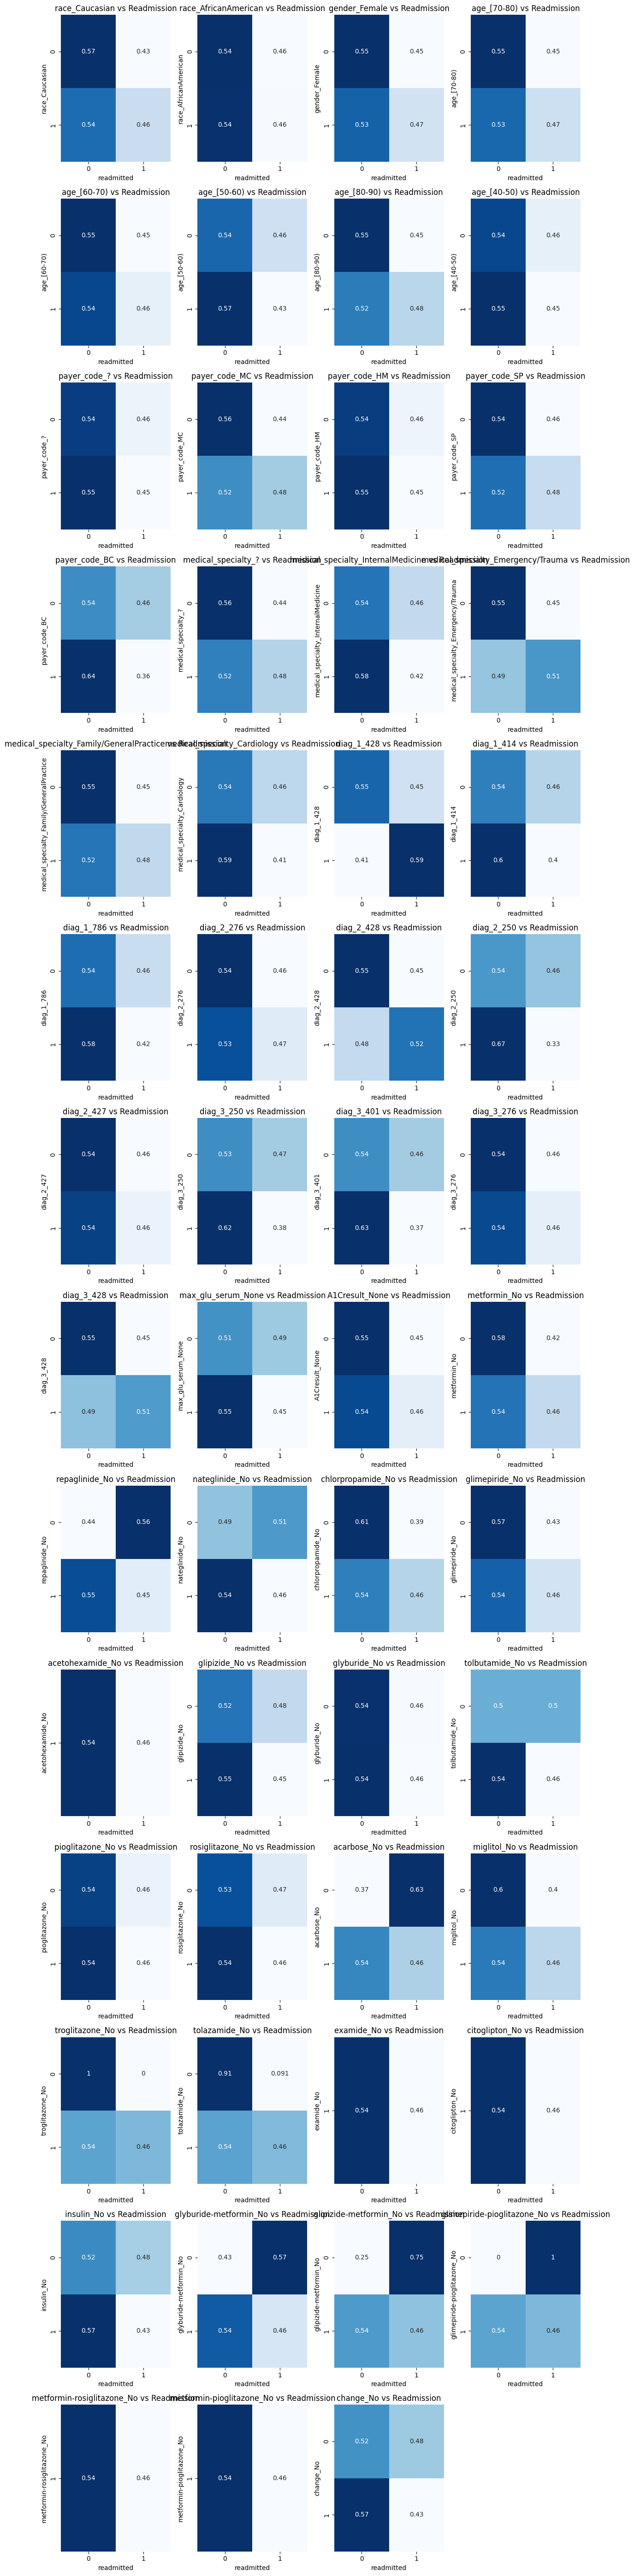

In [24]:
# Define the number of rows and columns for subplots
num_rows = math.ceil(len(categorical_vars[:-1]) / 4)  # Calculate the required number of rows
num_cols = 4

# Cross-tabulation and heatmap for categorical features vs. target
plt.figure(figsize=(12, 4 * num_rows))  # Adjust figsize based on the number of rows

for i, feature in enumerate(categorical_vars[:-1], 1):
    crosstab = pd.crosstab(df[feature], df['readmitted'], normalize='index')
    plt.subplot(num_rows, num_cols, i)
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f'{feature} vs Readmission')

plt.tight_layout()
plt.show()

### Analyzing Target Variable


Readmitted Distribuition across the Dataset

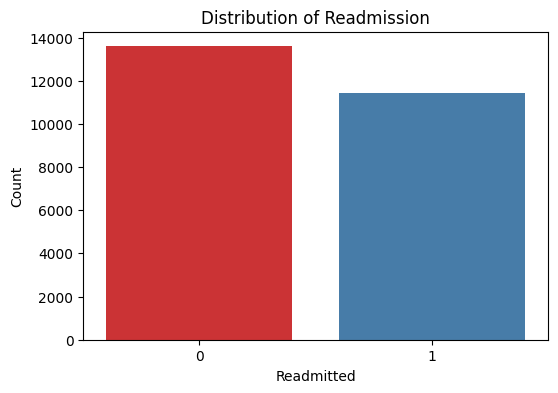

Proportion of Readmission:
Not Readmitted (0): 0.5436
Readmitted (1): 0.4564


In [25]:
# Create a count plot to visualize the distribution of 'readmitted' variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='readmitted', palette='Set1')
plt.title('Distribution of Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

# Calculate and display the proportion of readmitted vs. not readmitted
readmission_counts = df['readmitted'].value_counts()
readmission_proportions = readmission_counts / readmission_counts.sum()

print("Proportion of Readmission:")
print("Not Readmitted (0):", readmission_proportions[0])
print("Readmitted (1):", readmission_proportions[1])

Readmitted Distribuition Across Age

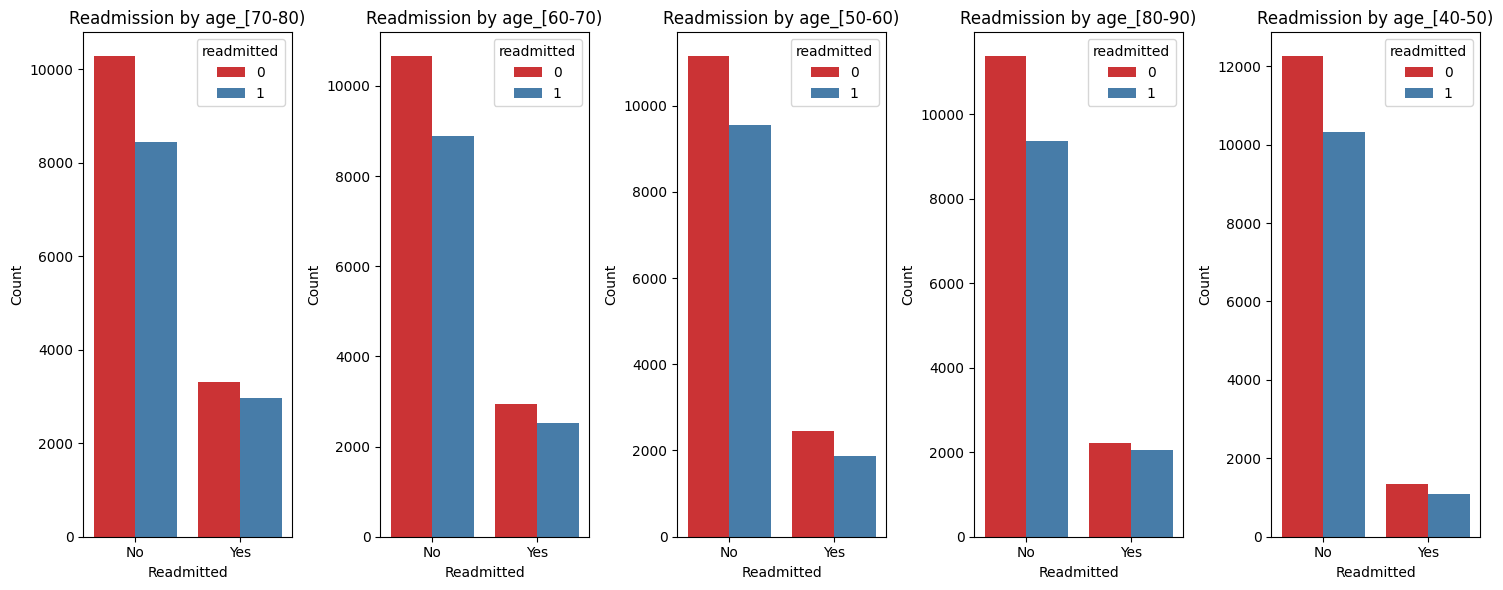

In [26]:
# Analyze readmission across Age
plt.figure(figsize=(15, 6))  # Set the figure size for the subplots
age_variables_labels = ['age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)']

# Loop through age variables to create subplots
for i, col in enumerate(age_variables, 1):
    plt.subplot(1, 5, i)  # Create a subplot
    sns.countplot(data=df, x=col, hue='readmitted', palette='Set1')  # Create a count plot
    plt.title(f'Readmission by {age_variables_labels[i-1]}')  # Set subplot title
    plt.xticks([0, 1], ['No', 'Yes'])  # Set x-axis labels
    plt.xlabel('Readmitted')  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the subplots

Readmitted Distribuition Across Race Variables


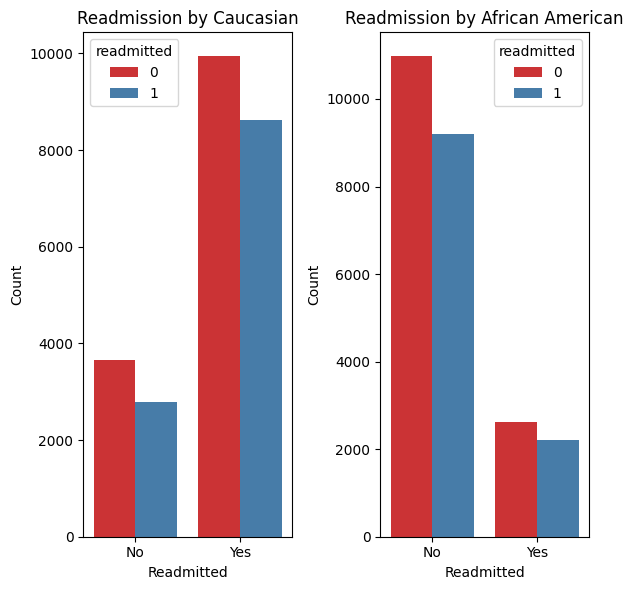

In [27]:
# Analyze readmission across Race
plt.figure(figsize=(15, 6))

race_variables = ['race_Caucasian', 'race_AfricanAmerican']
race_labels = ['Caucasian', 'African American']
for i, col in enumerate(race_variables, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, hue='readmitted', palette='Set1')
    plt.title(f'Readmission by {race_labels[i-1]}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Readmitted')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Readmitted Distribuition Across Gender Variables


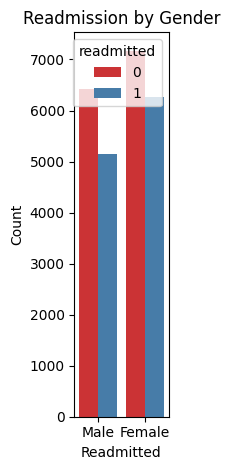

In [28]:
gender_variables = ['gender_Female']
gender_labels = ['Male', 'Female']
for i, col in enumerate(gender_variables, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, hue='readmitted', palette='Set1')
    plt.title(f'Readmission by Gender')
    plt.xticks([0, 1], ['Male', 'Female'])
    plt.xlabel('Readmitted')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Readmitted Distribuition Across Payer Variables


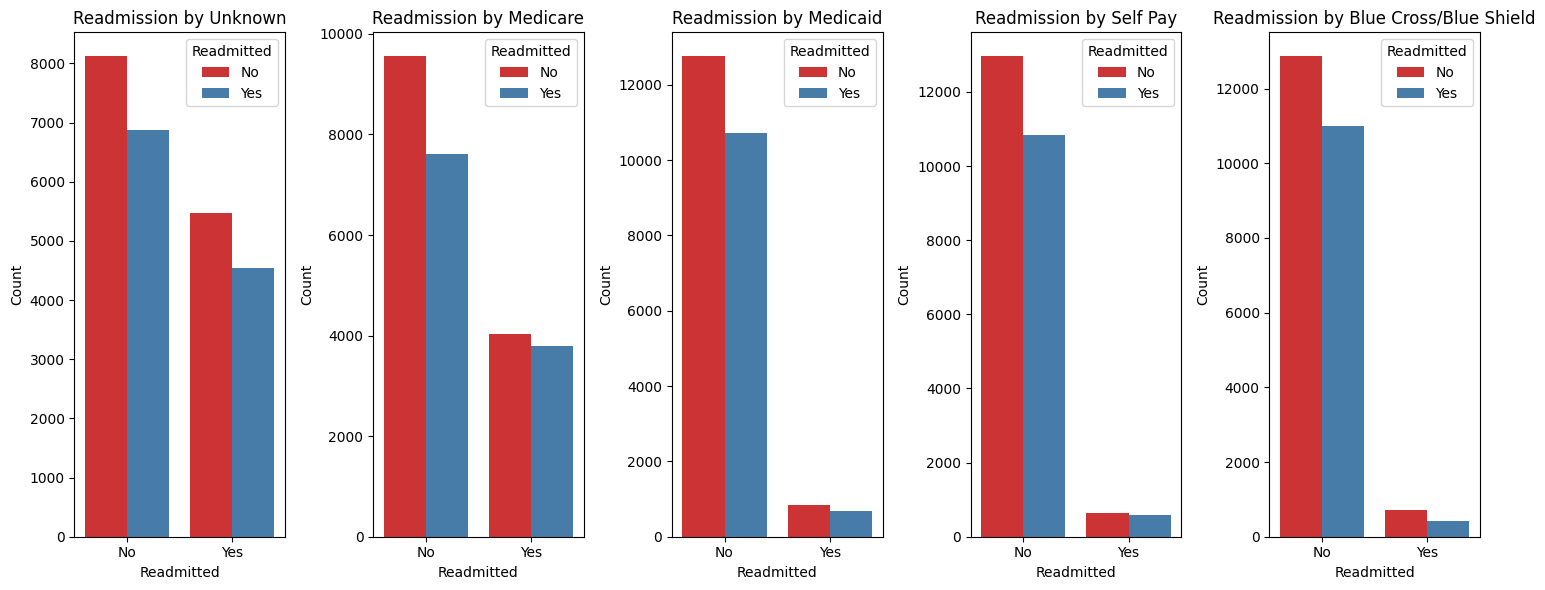

In [29]:
# Analyze readmission across payer variables
plt.figure(figsize=(15, 6))
payer_labels = ['Unknown', 'Medicare', 'Medicaid', 'Self Pay', 'Blue Cross/Blue Shield']
for i, col in enumerate(payer_variables, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, hue='readmitted', palette='Set1')
    plt.title(f'Readmission by {payer_labels[i-1]}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Readmitted')
    plt.ylabel('Count')
    plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Readmitted Distribuition Across Medical Specialties Variables


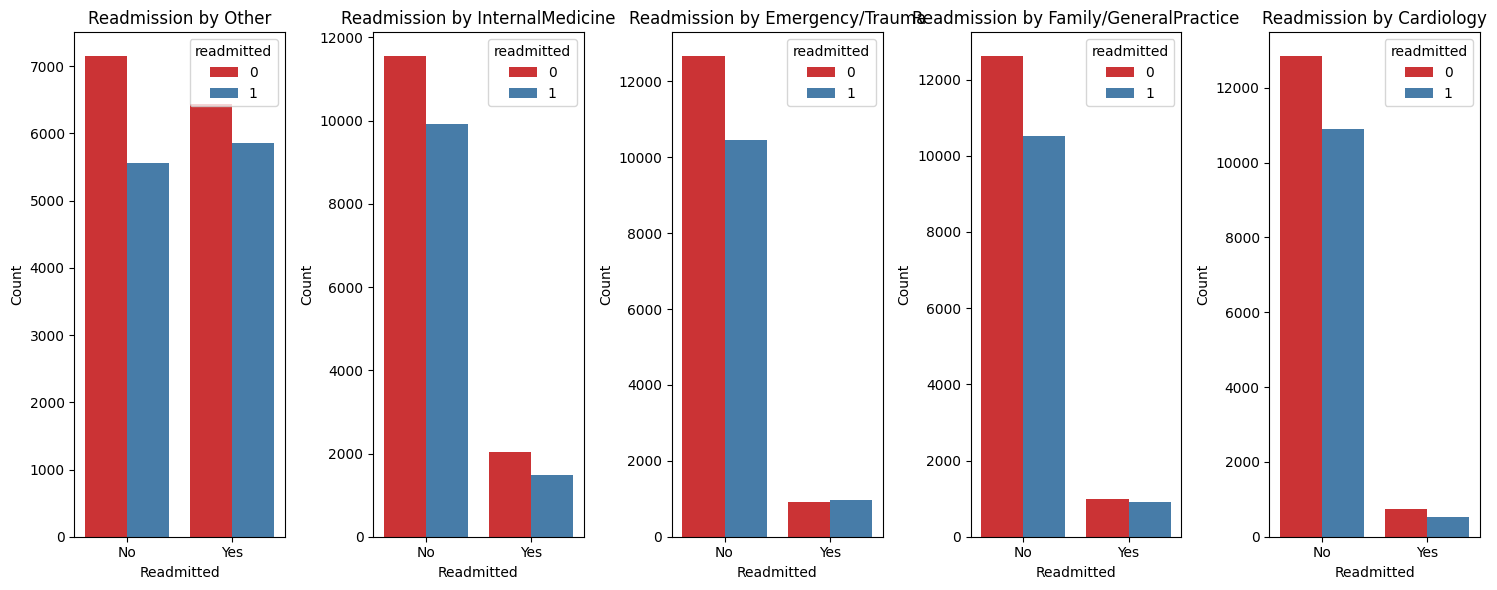

In [30]:
# Analyze readmission across medical specialties
plt.figure(figsize=(15, 6))
medical_specialty_cols = ['medical_specialty_?', 'medical_specialty_InternalMedicine',
                          'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
                          'medical_specialty_Cardiology']
medical_specialty_labels = ['Other', 'InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology']
for i, col in enumerate(medical_specialty_cols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, hue='readmitted', palette='Set1')
    plt.title(f'Readmission by {medical_specialty_labels[i-1]}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Readmitted')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Readmitted Distribuition Across Hospital Details Variables


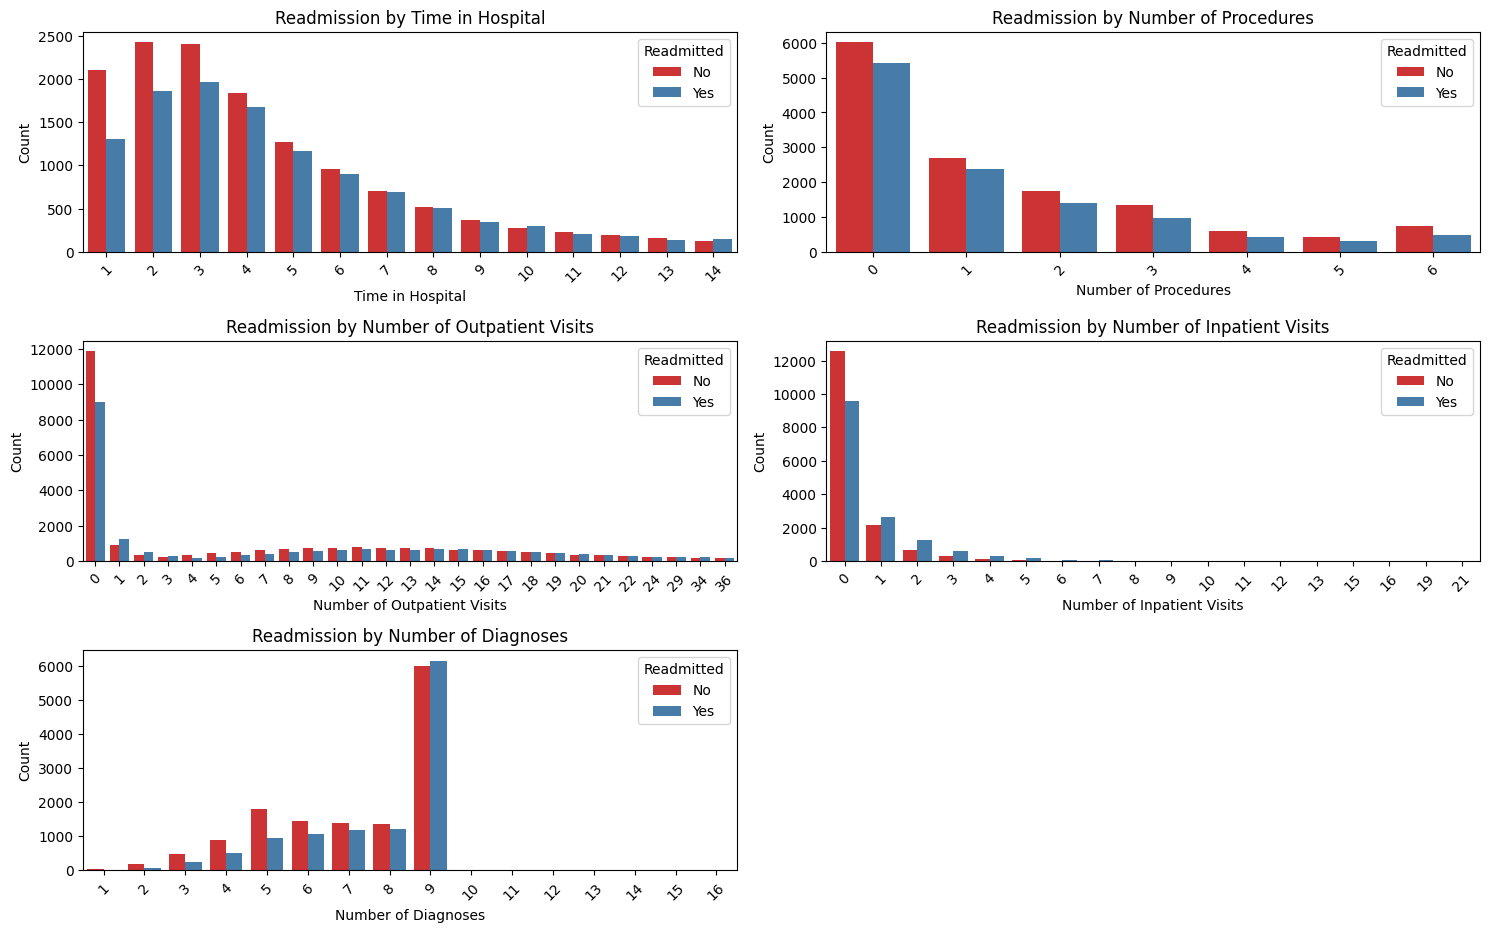

In [31]:
# Analyze readmission across Hospital Details
plt.figure(figsize=(15, 12))
hospital_labels = ['Time in Hospital', 'Number of Lab Procedures', 'Number of Procedures',
                   'Number of Medications', 'Number of Outpatient Visits', 'Number of Emergency Visits',
                   'Number of Inpatient Visits', 'Number of Diagnoses']
for i in range(0, len(hospital_variables), 2):
    plt.subplot(4, 2, i//2 + 1)
    sns.countplot(data=df, x=hospital_variables[i], hue='readmitted', palette='Set1')
    plt.title(f'Readmission by {hospital_labels[i]}')
    plt.xticks(rotation=45)
    plt.xlabel(hospital_labels[i])
    plt.ylabel('Count')
    plt.legend(title='Readmitted', labels=['No', 'Yes'])

    if i + 1 < len(hospital_variables):
        plt.subplot(4, 2, i//2 + 2)
        sns.countplot(data=df, x=hospital_variables[i + 1], hue='readmitted', palette='Set1')
        plt.title(f'Readmission by {hospital_labels[i + 1]}')
        plt.xticks(rotation=45)
        plt.xlabel(hospital_labels[i + 1])
        plt.ylabel('Count')
        plt.legend(title='Readmitted', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Readmitted Distribuition Across Diagnoses Variables


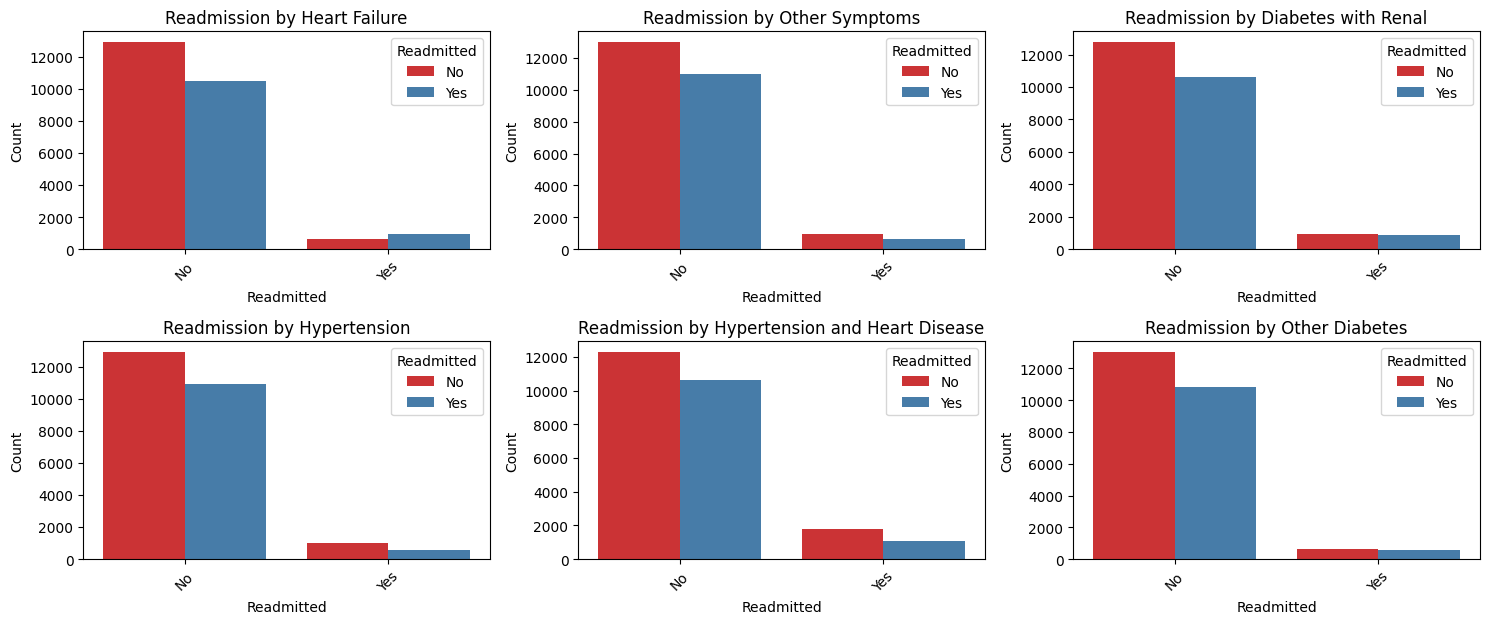

In [33]:
# Analyze readmission across Diagnoses
plt.figure(figsize=(15, 12))
diagnosis_labels = ['Heart Failure', 'Other Circulatory System', 'Other Symptoms', 'Other Metabolic',
                    'Diabetes with Renal', 'Diabetes without Complication', 'Hypertension',
                    'Diabetes with Neurological', 'Hypertension and Heart Disease', 'Other Disorders', 'Other Diabetes']
for i in range(0, len(diagnosis_variables), 2):
    plt.subplot(4, 3, i//2 + 1)
    sns.countplot(data=df, x=diagnosis_variables[i], hue='readmitted', palette='Set1')
    plt.title(f'Readmission by {diagnosis_labels[i]}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Readmitted')
    plt.ylabel('Count')
    plt.legend(title='Readmitted', labels=['No', 'Yes'])
    plt.xticks(rotation=45)

    if i + 1 < len(diagnosis_variables):
        plt.subplot(4, 3, i//2 + 2)
        sns.countplot(data=df, x=diagnosis_variables[i + 1], hue='readmitted', palette='Set1')
        plt.title(f'Readmission by {diagnosis_labels[i + 1]}')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.xlabel('Readmitted')
        plt.ylabel('Count')
        plt.legend(title='Readmitted', labels=['No', 'Yes'])
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Readmitted Distribuition Across Medication Variables


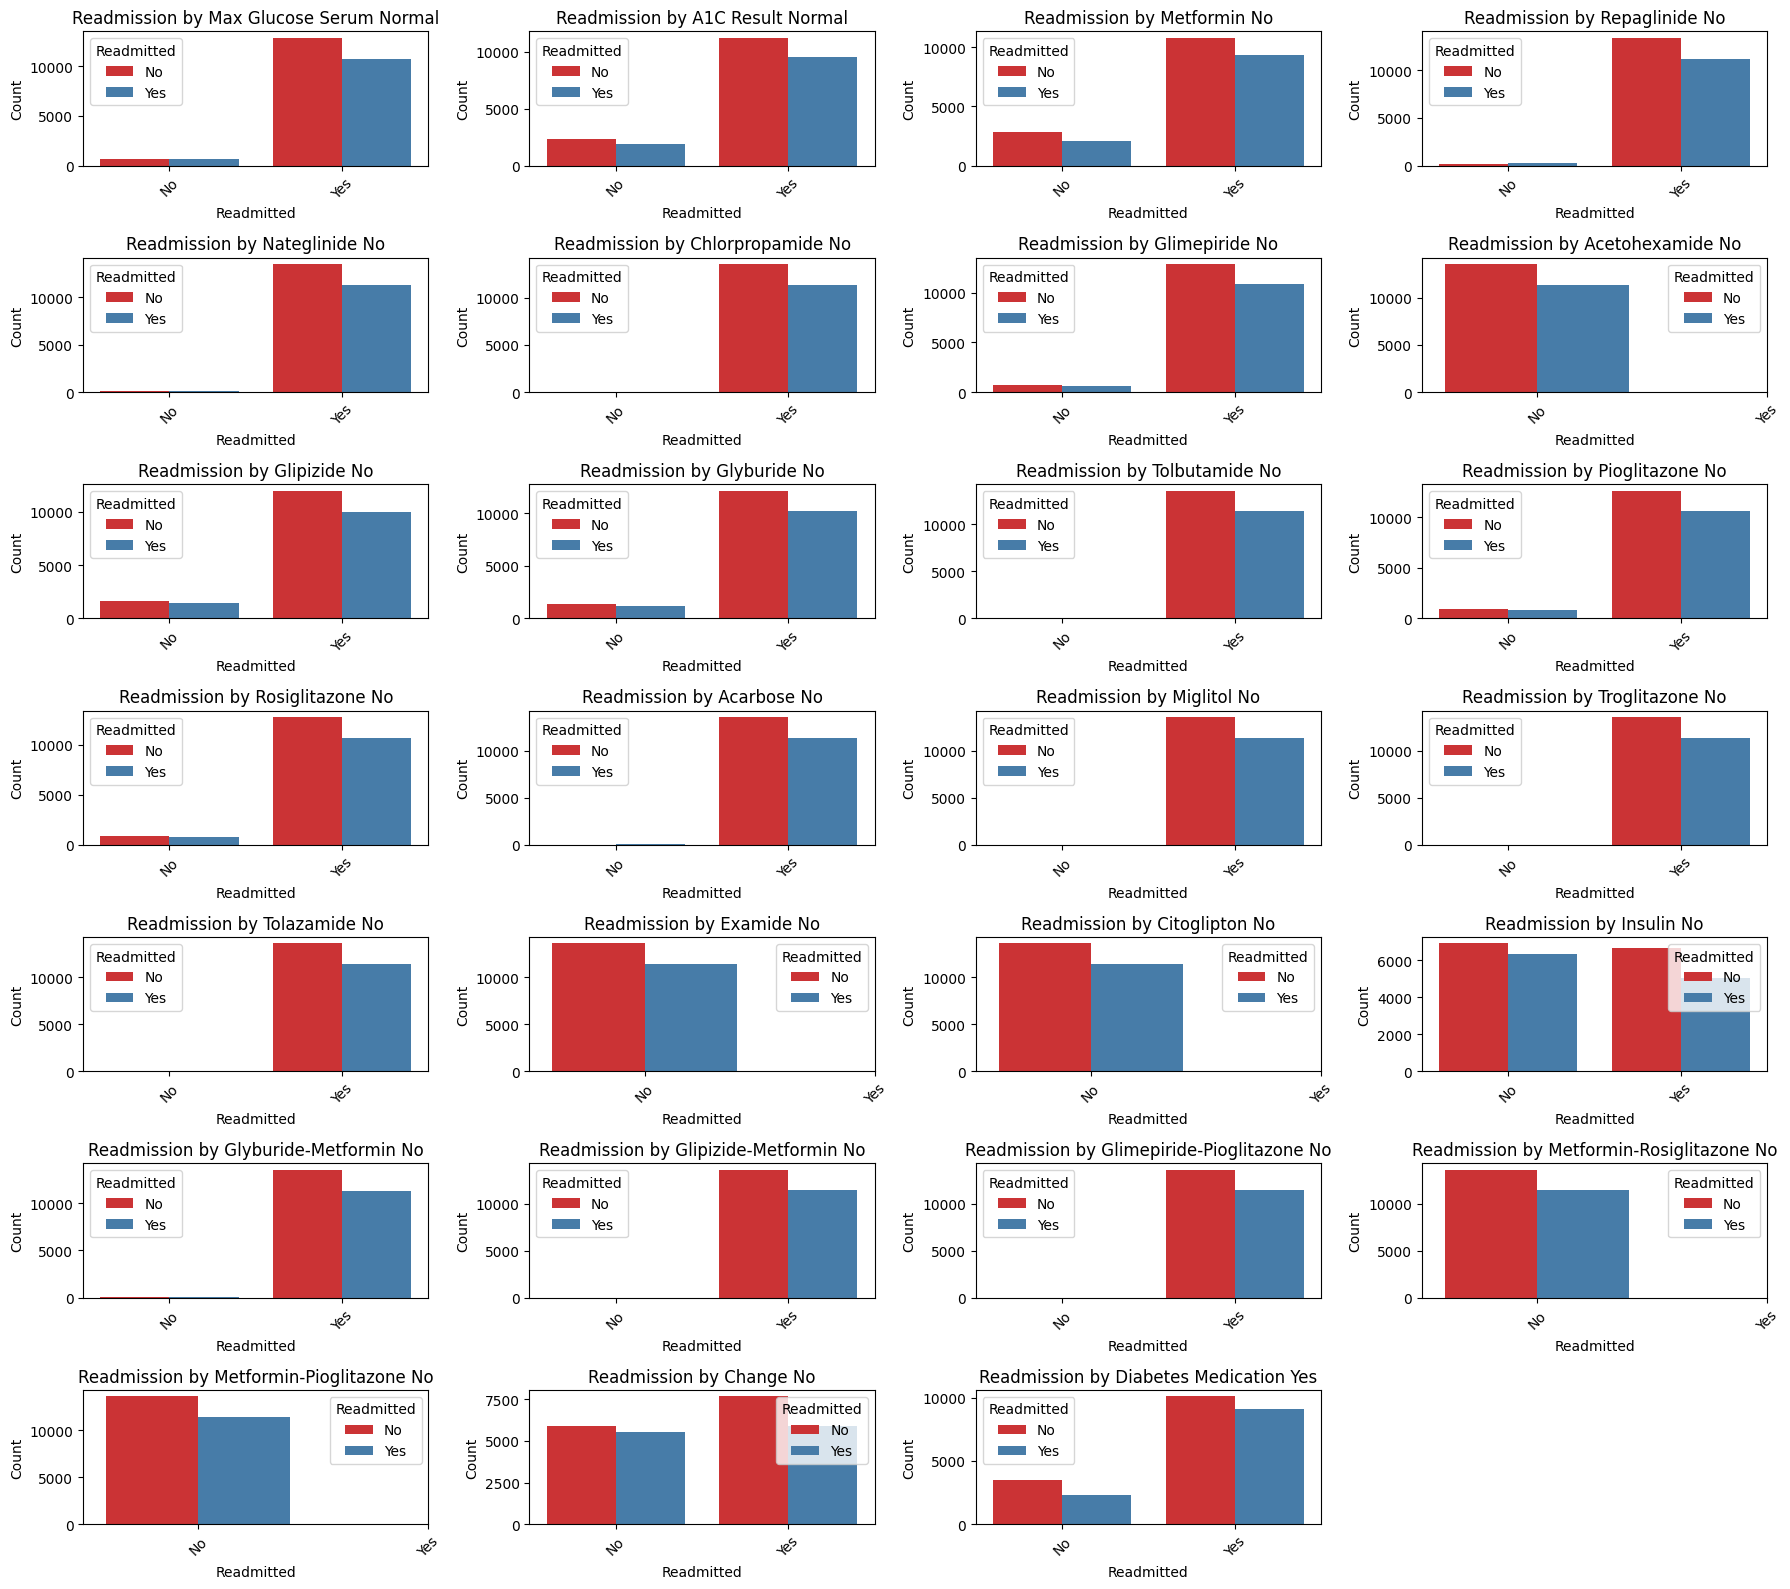

In [34]:
plt.figure(figsize=(18, 16))
medicine_labels = ['Max Glucose Serum Normal', 'A1C Result Normal', 'Metformin No', 'Repaglinide No',
                   'Nateglinide No', 'Chlorpropamide No', 'Glimepiride No', 'Acetohexamide No',
                   'Glipizide No', 'Glyburide No', 'Tolbutamide No', 'Pioglitazone No', 'Rosiglitazone No',
                   'Acarbose No', 'Miglitol No', 'Troglitazone No', 'Tolazamide No', 'Examide No',
                   'Citoglipton No', 'Insulin No', 'Glyburide-Metformin No', 'Glipizide-Metformin No',
                   'Glimepiride-Pioglitazone No', 'Metformin-Rosiglitazone No', 'Metformin-Pioglitazone No',
                   'Change No', 'Diabetes Medication Yes']

num_columns = 4
num_rows = math.ceil(len(medicine_variables) / num_columns)

for i, col in enumerate(medicine_variables, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.countplot(data=df, x=col, hue='readmitted', palette='Set1')
    plt.title(f'Readmission by {medicine_labels[i-1]}')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Readmitted')
    plt.ylabel('Count')
    plt.legend(title='Readmitted', labels=['No', 'Yes'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Variable by Variable EDA

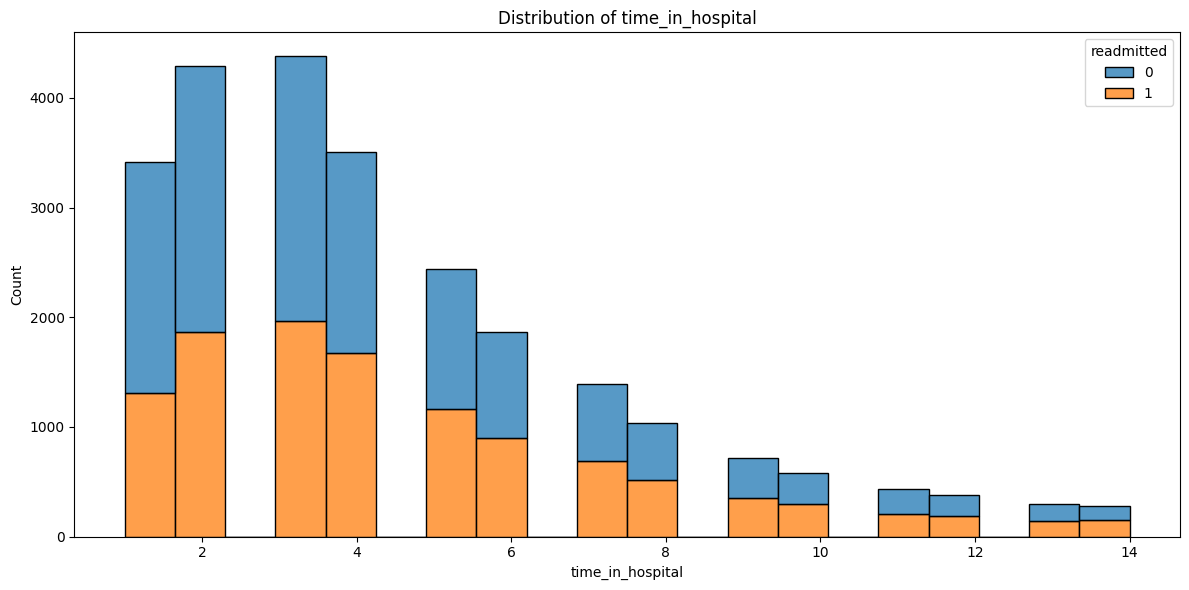

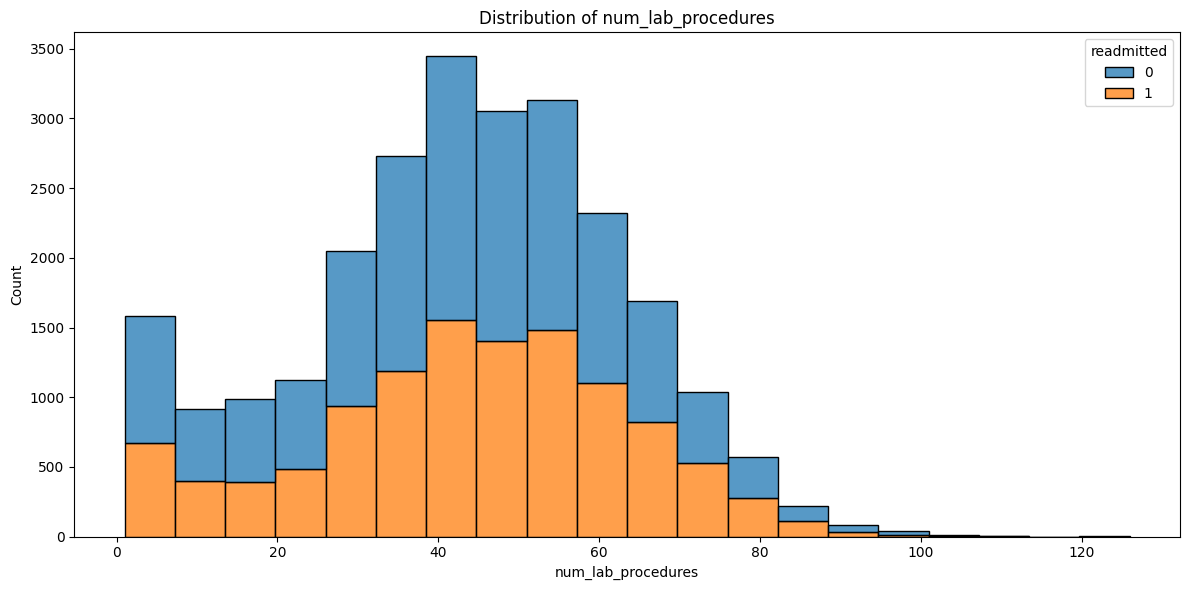

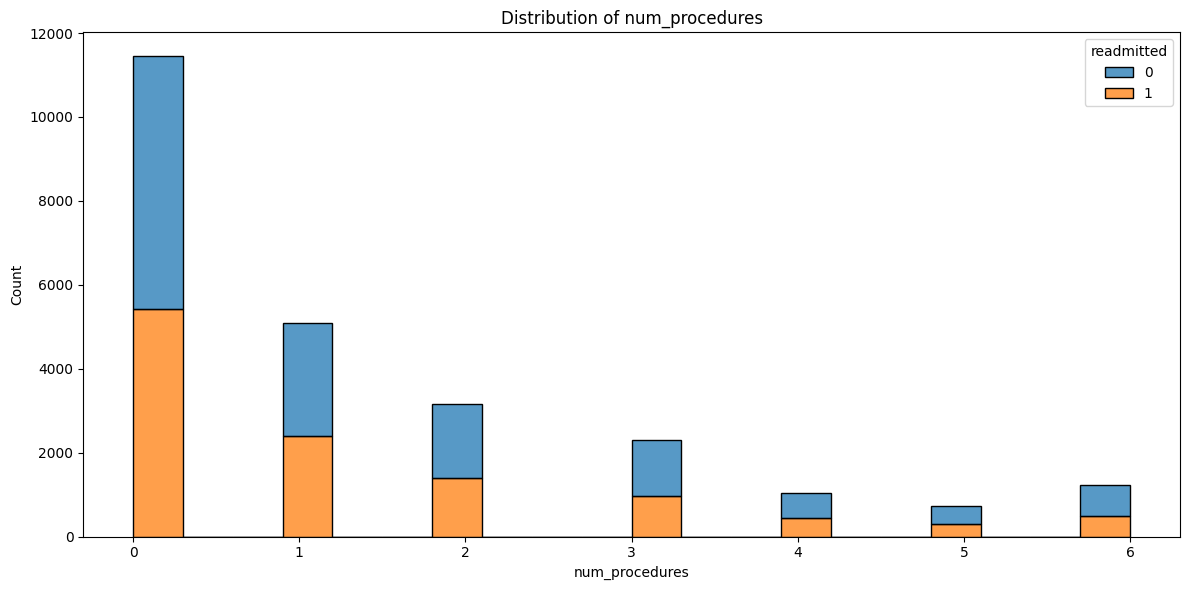

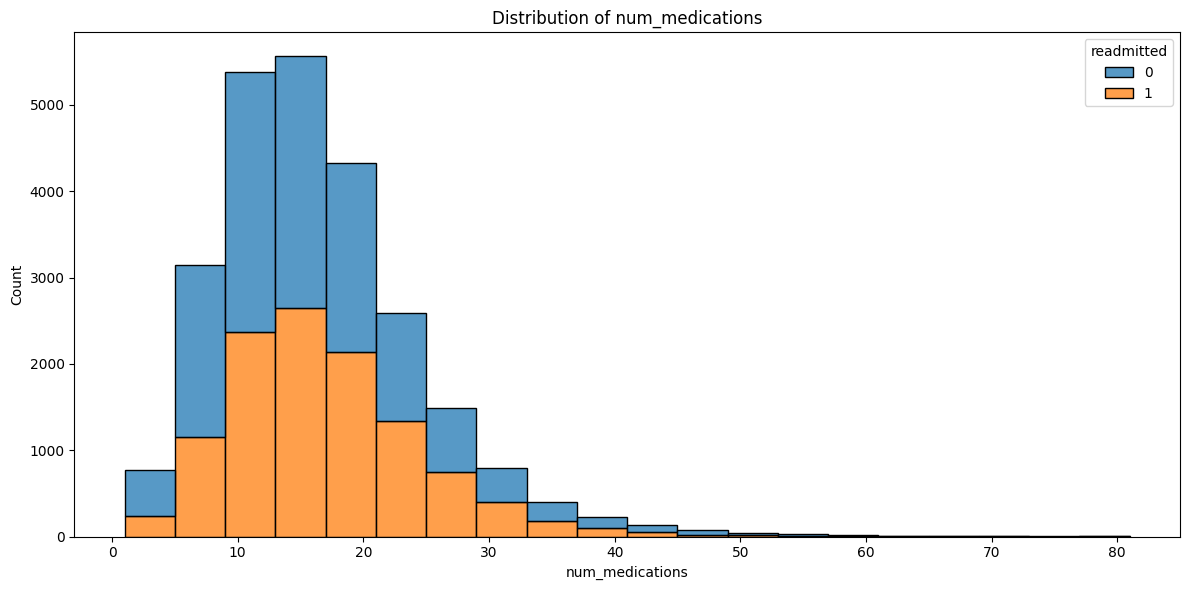

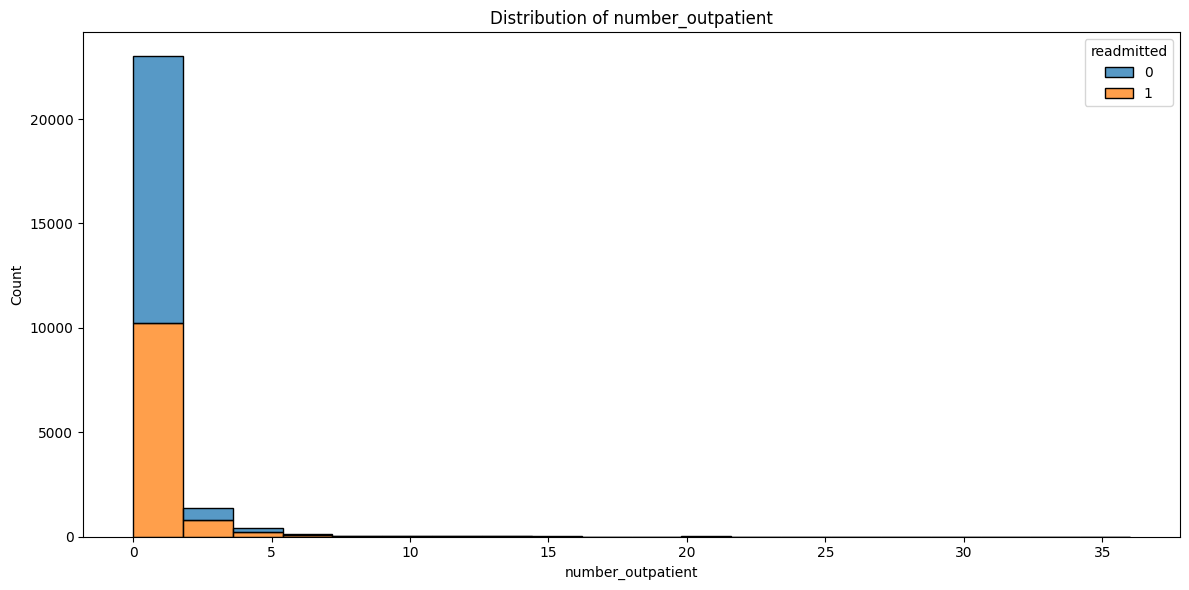

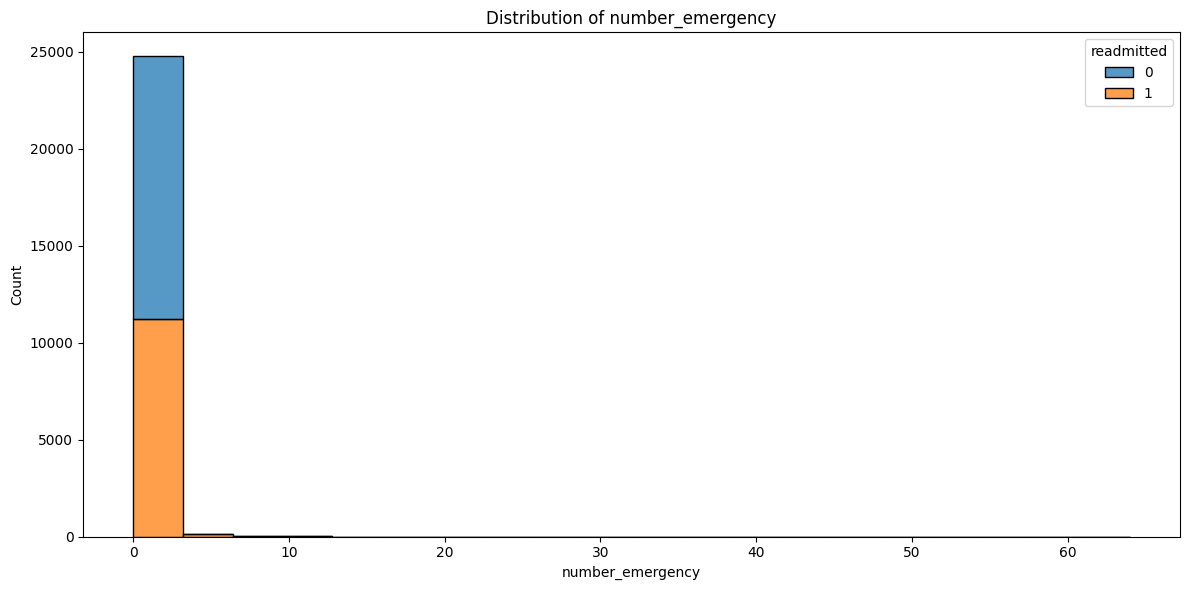

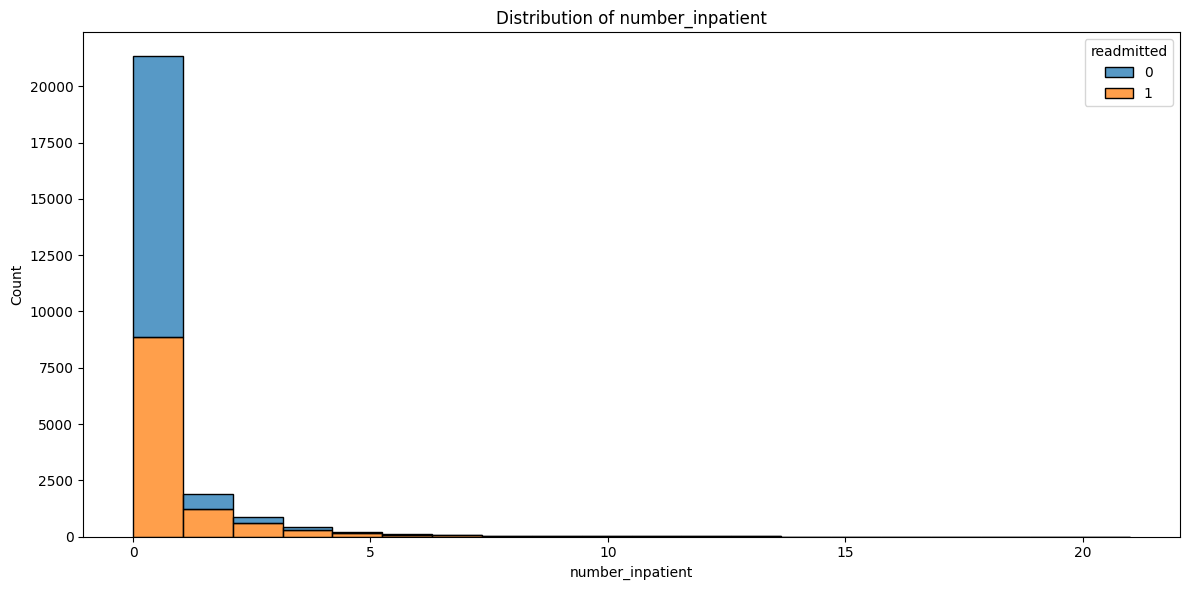

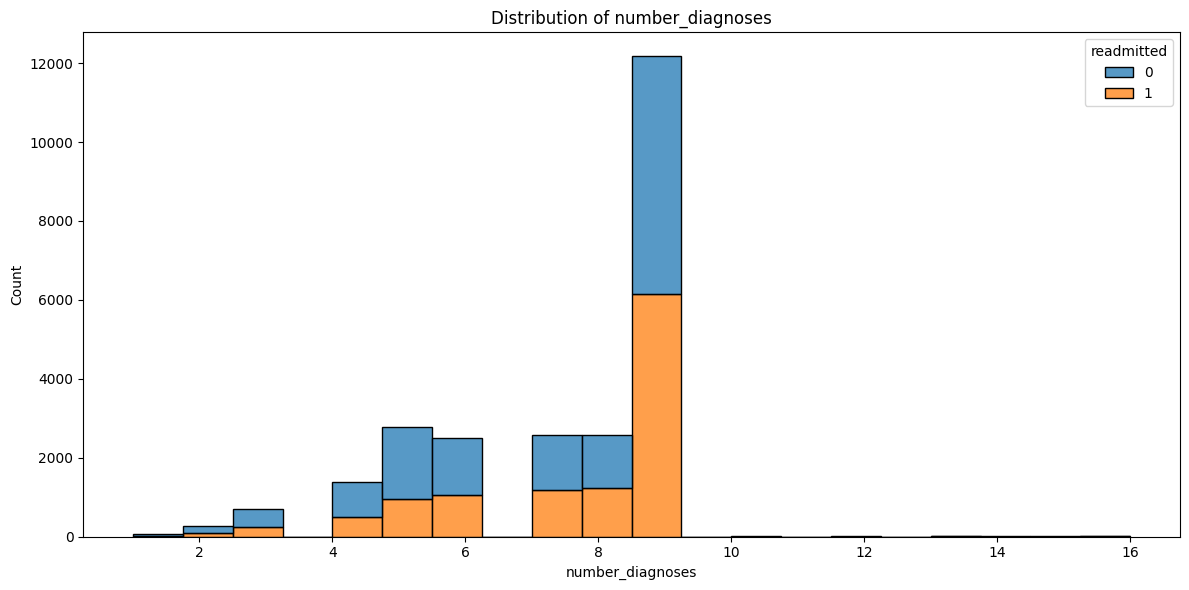

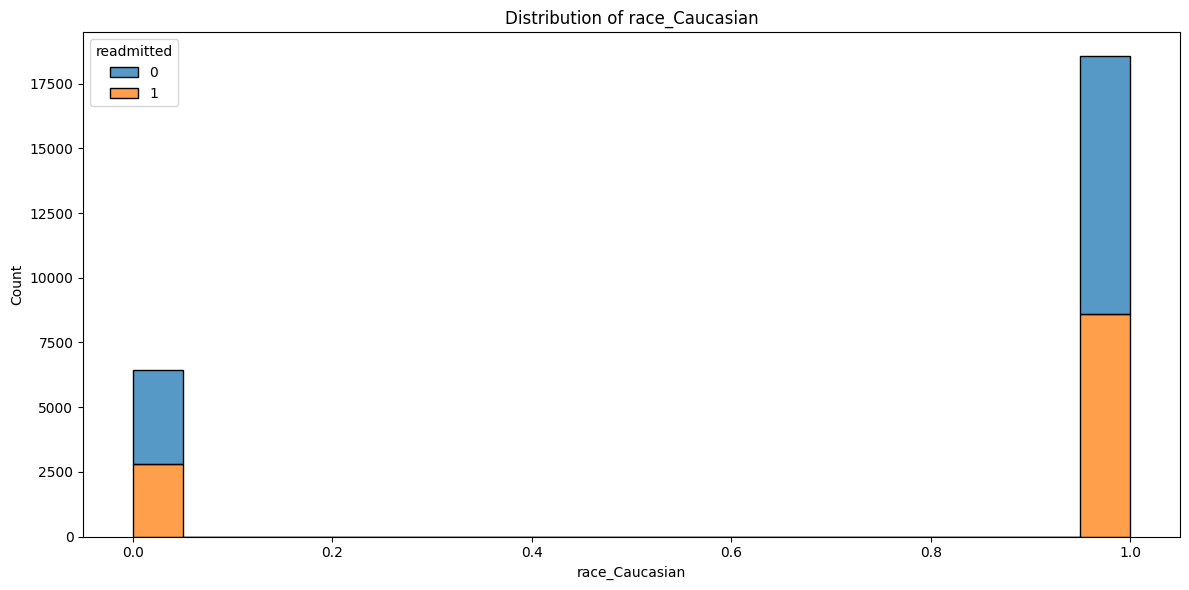

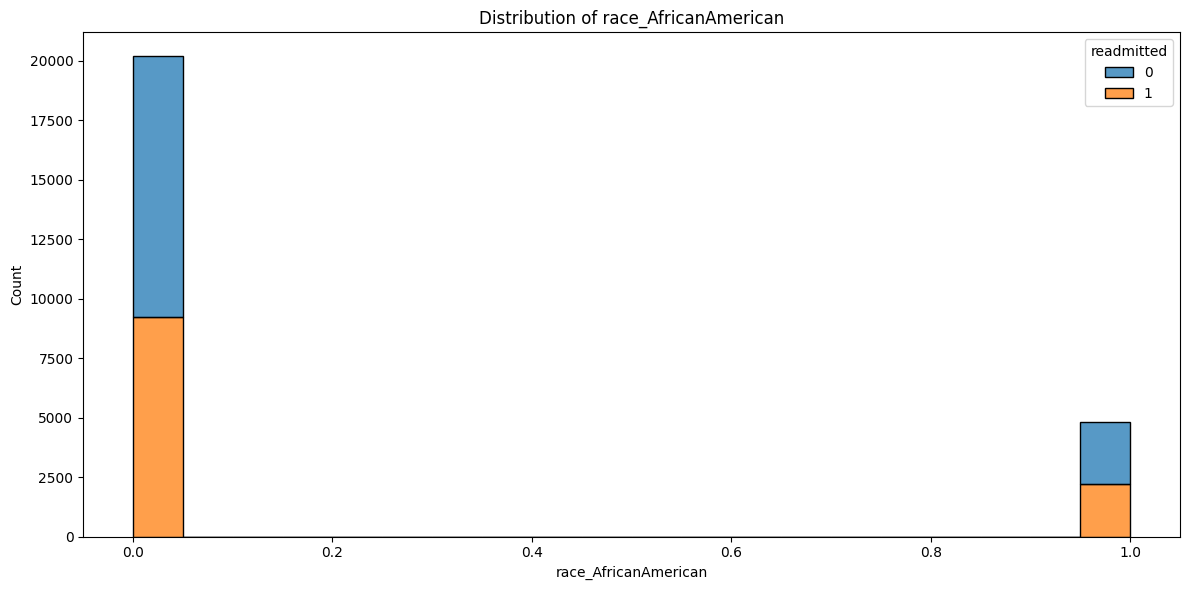

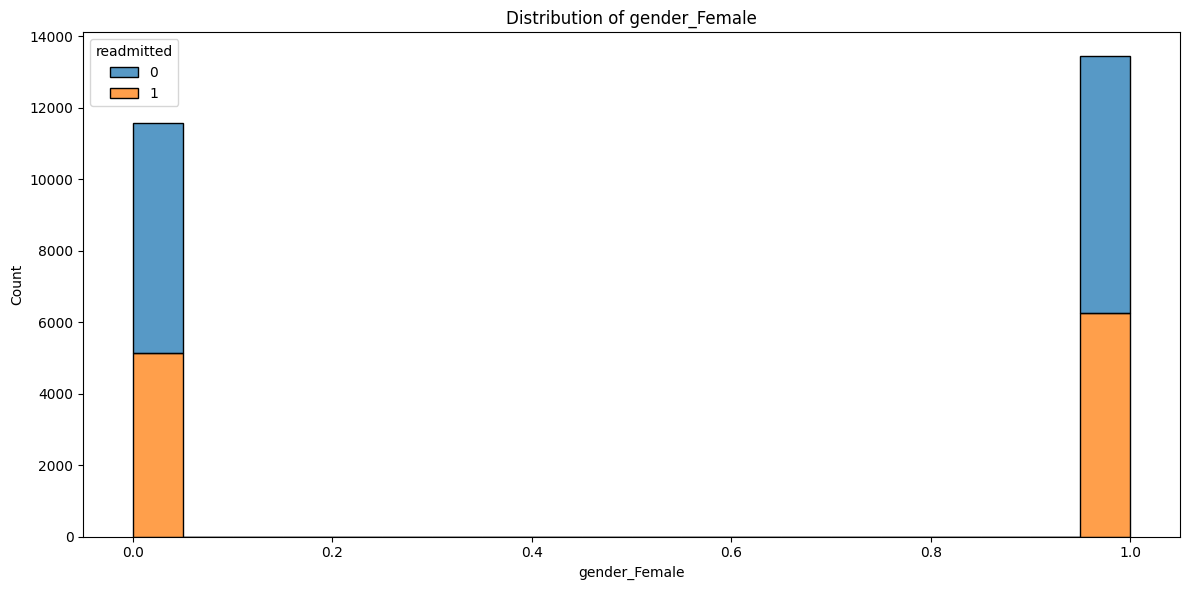

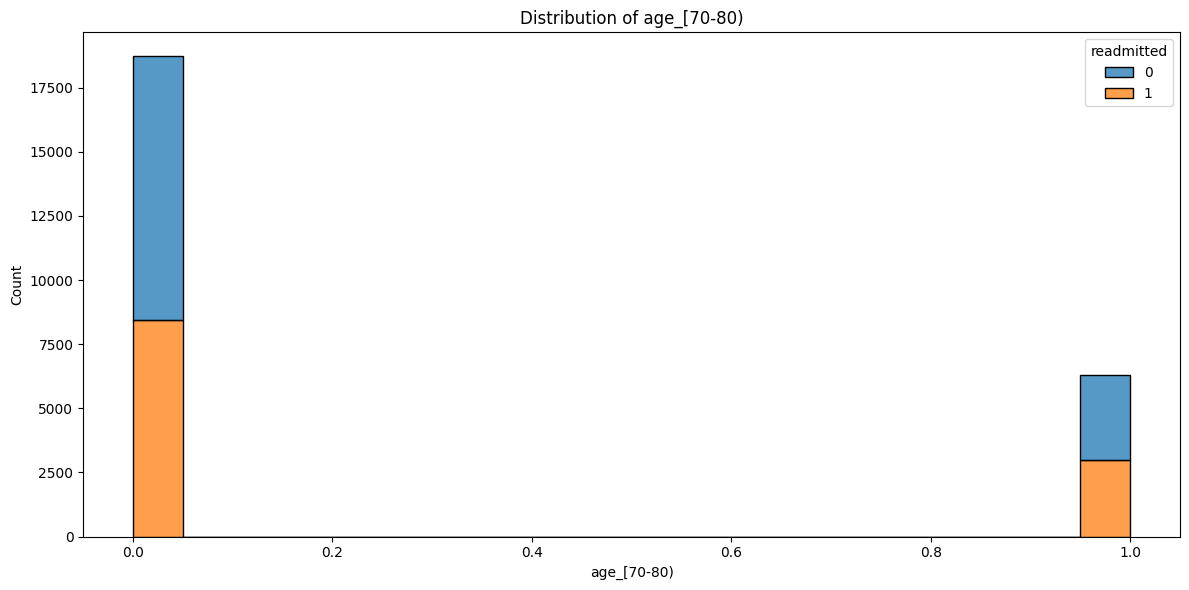

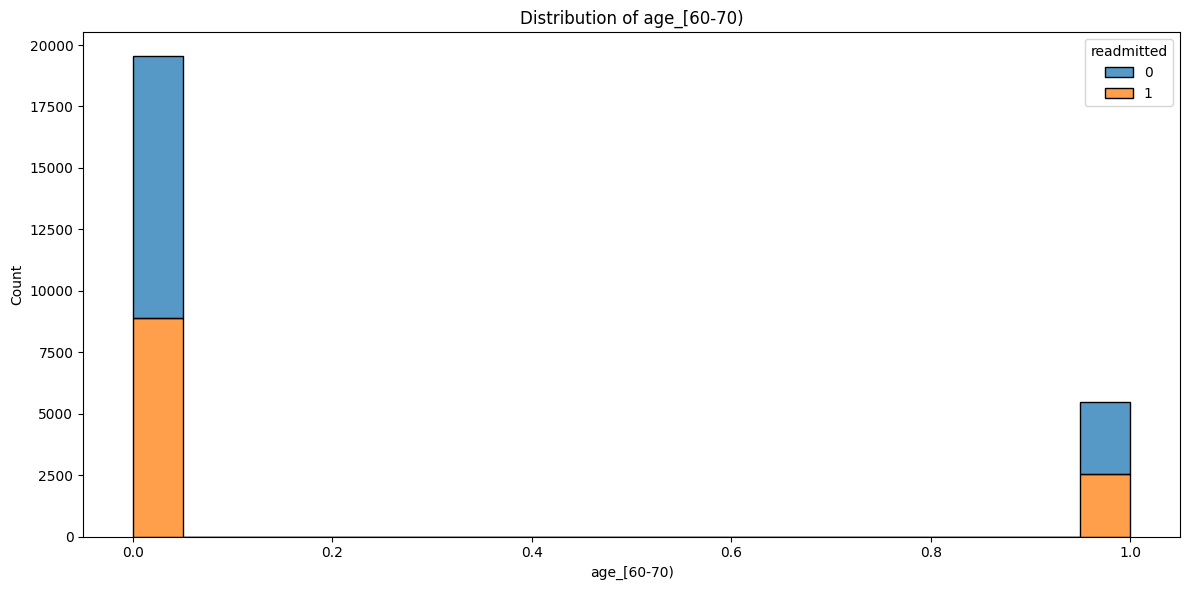

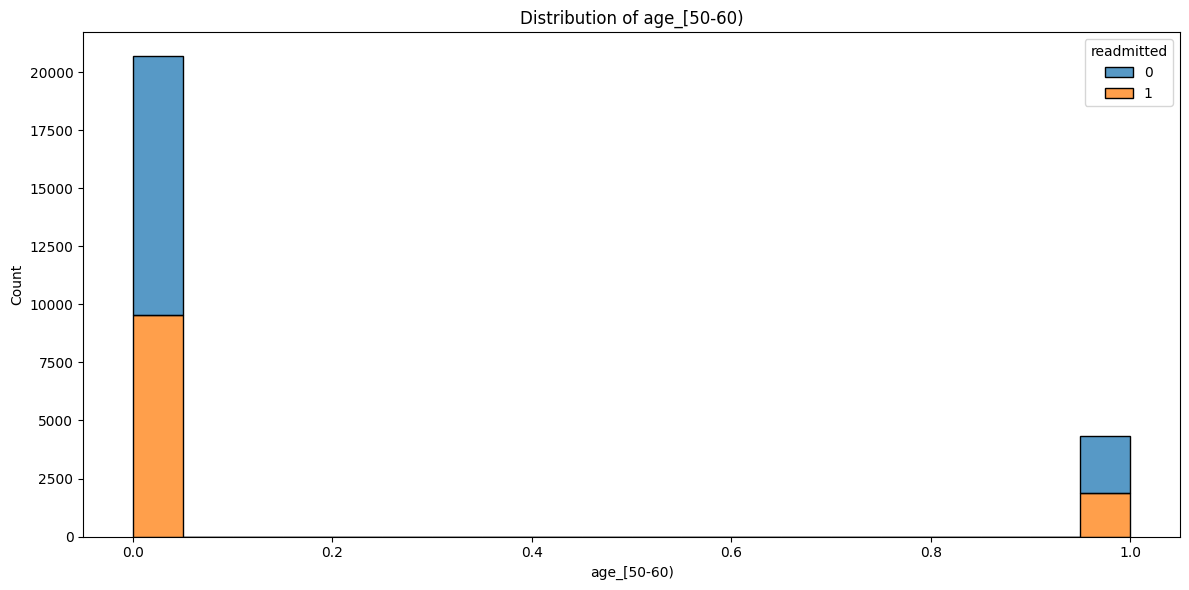

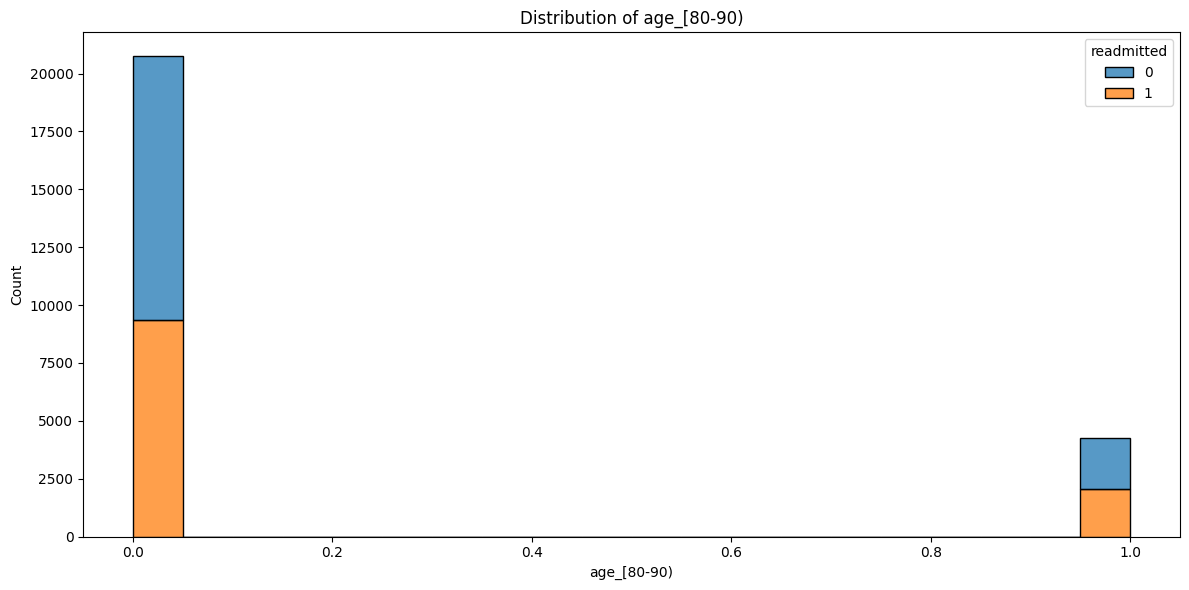

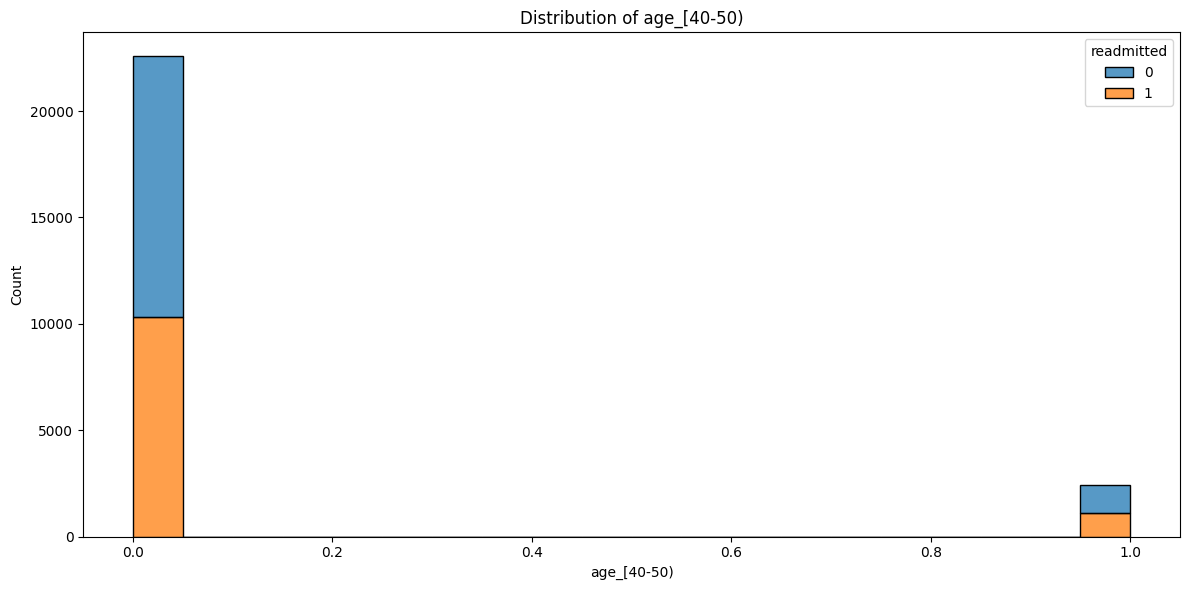

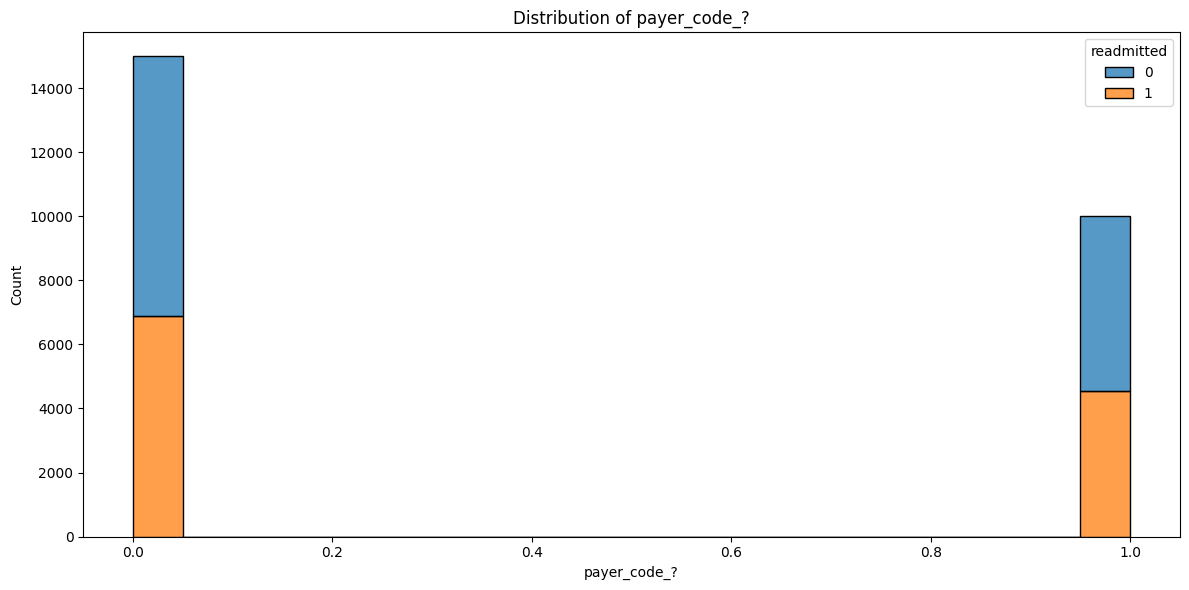

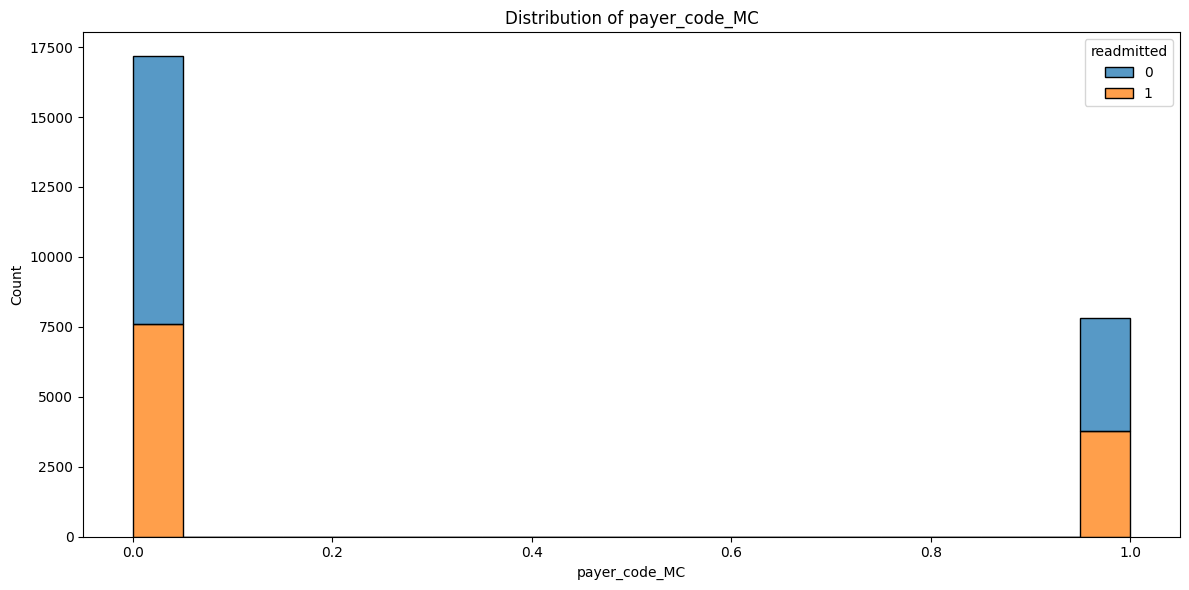

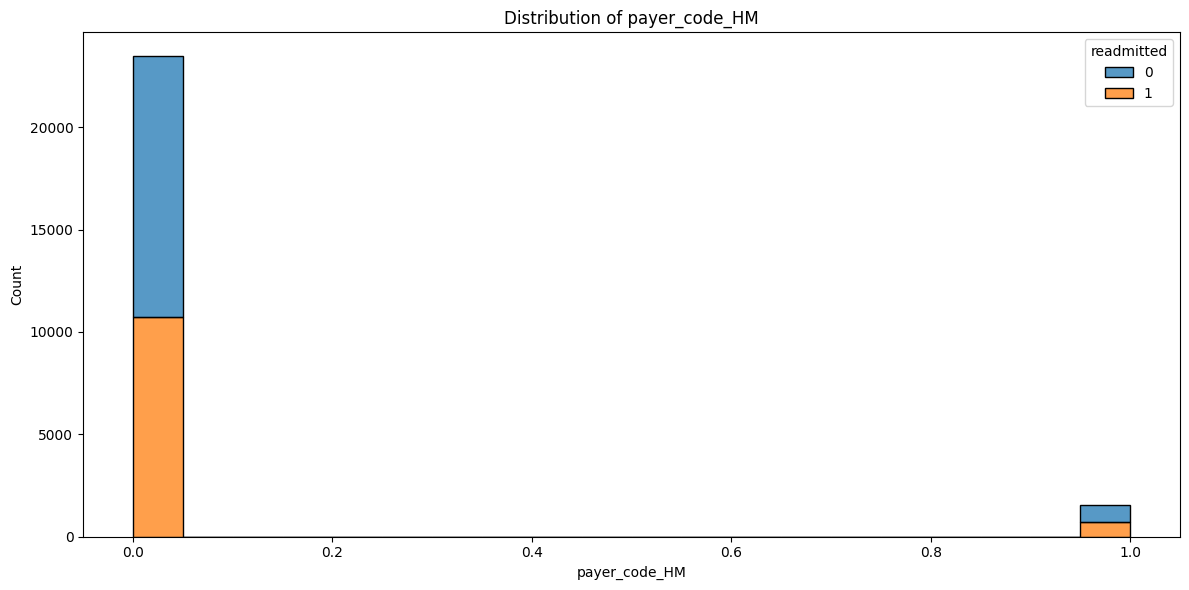

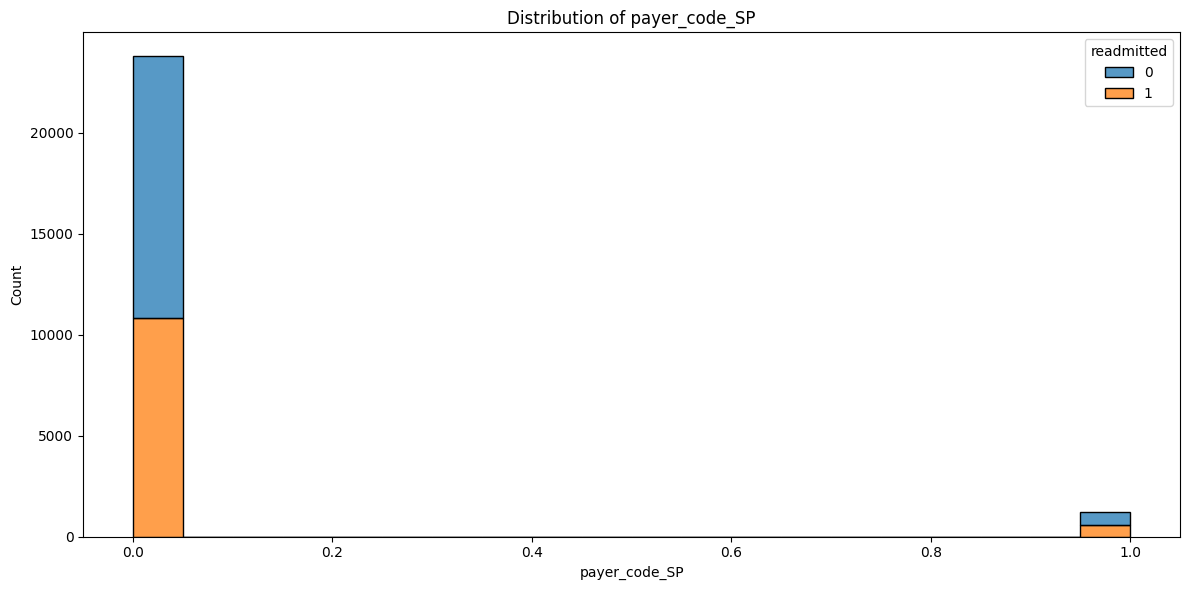

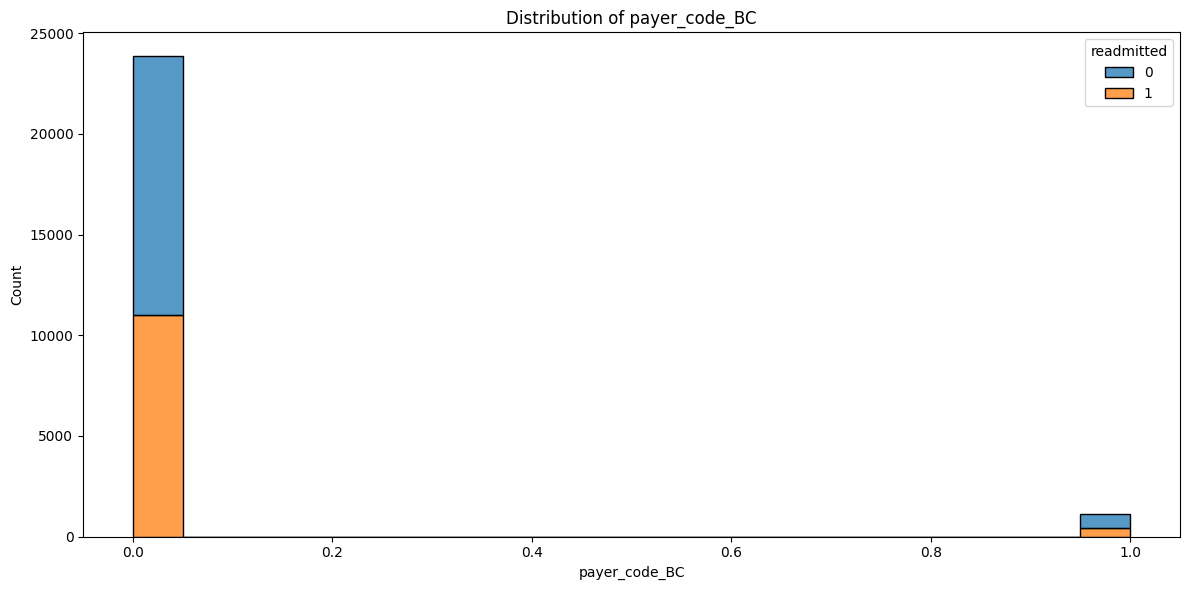

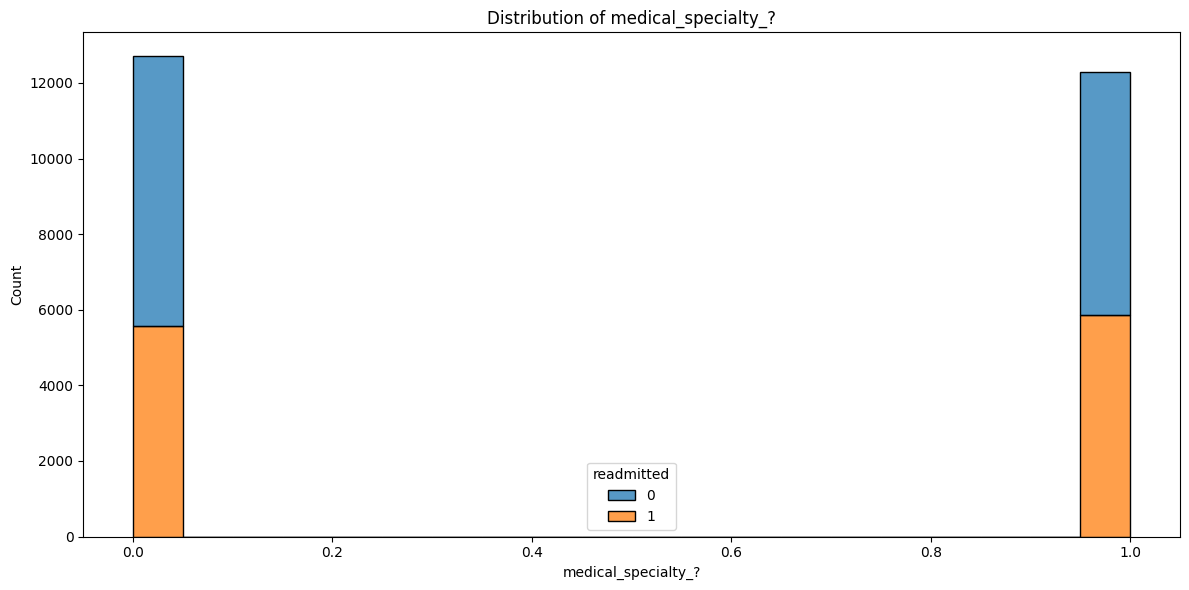

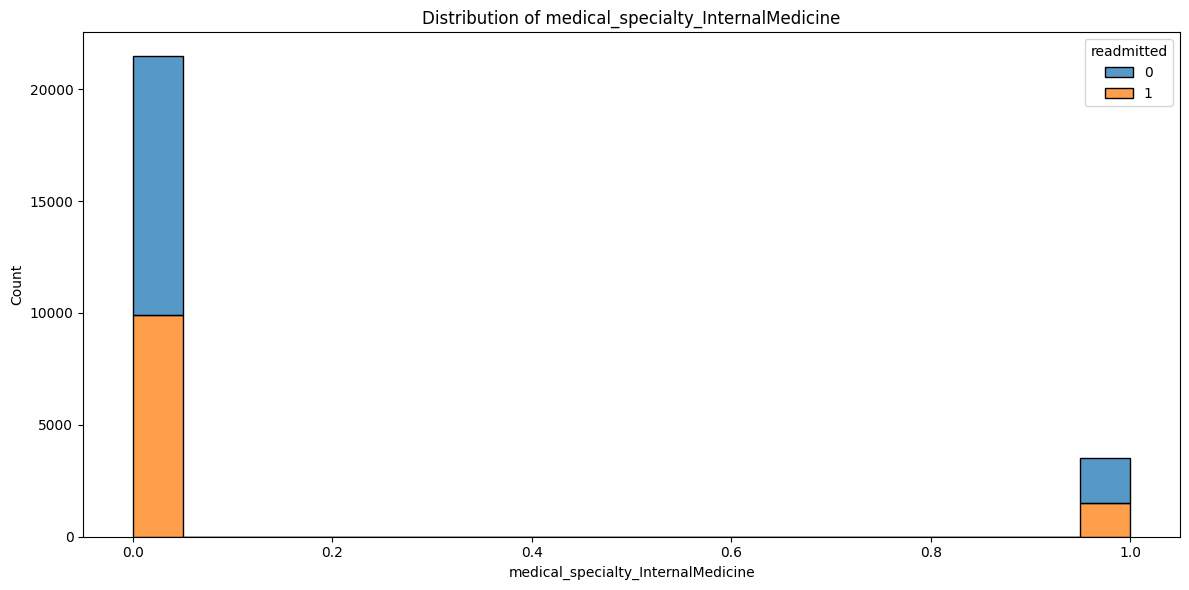

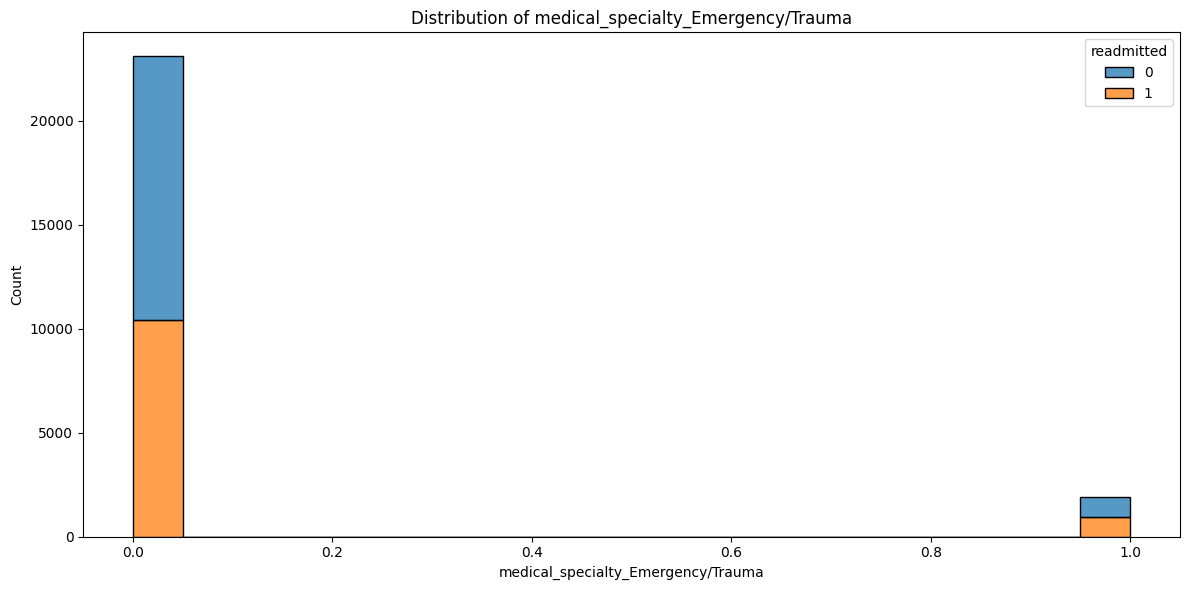

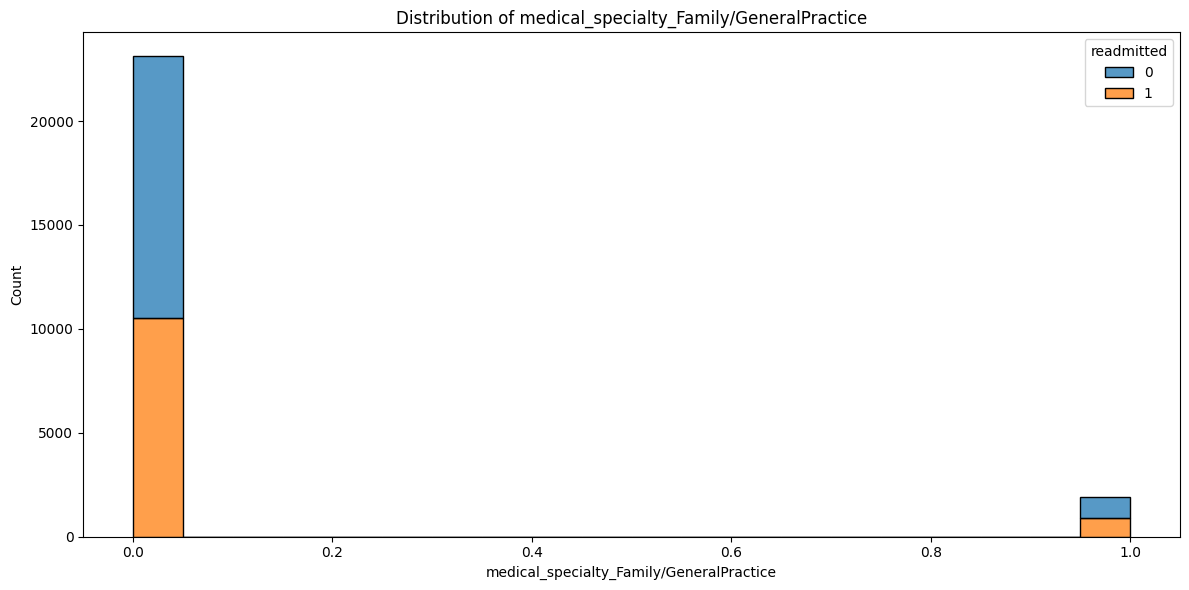

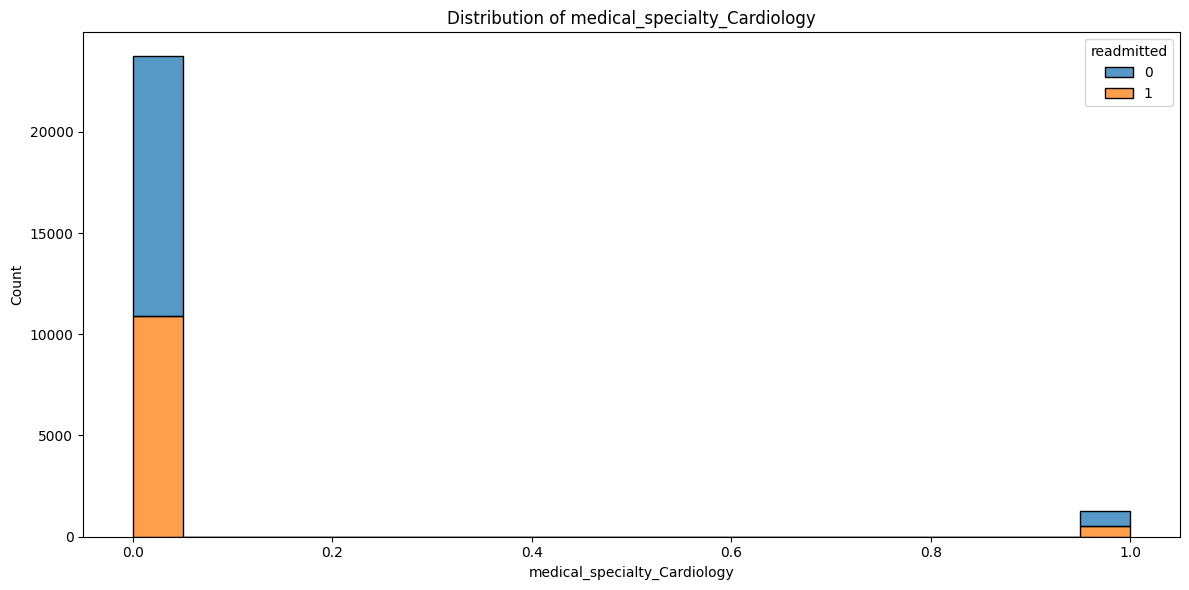

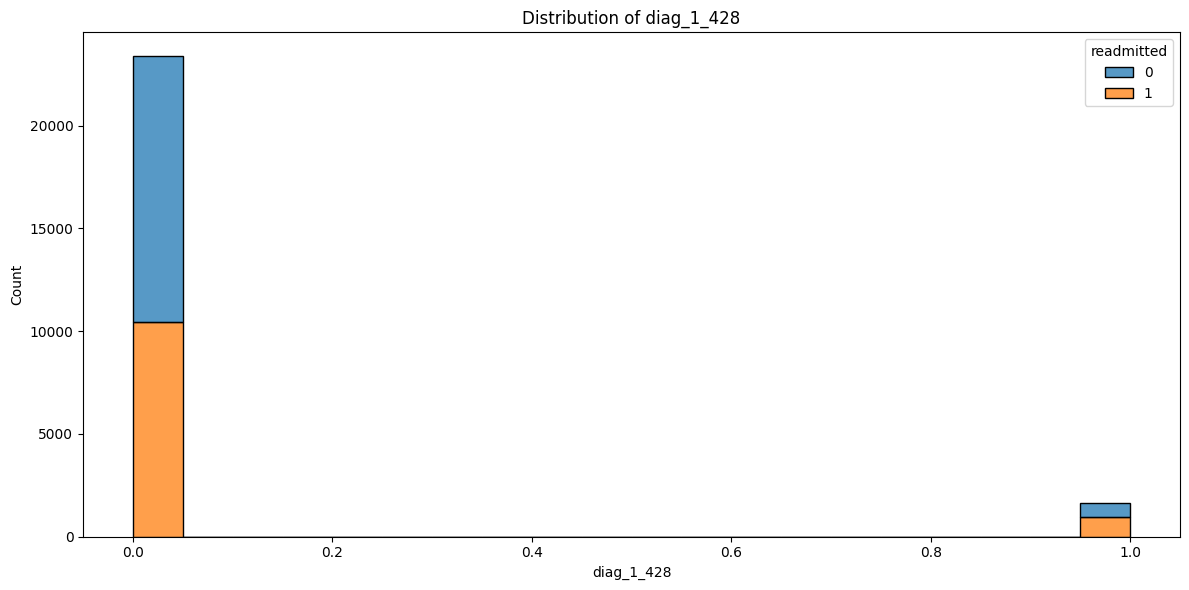

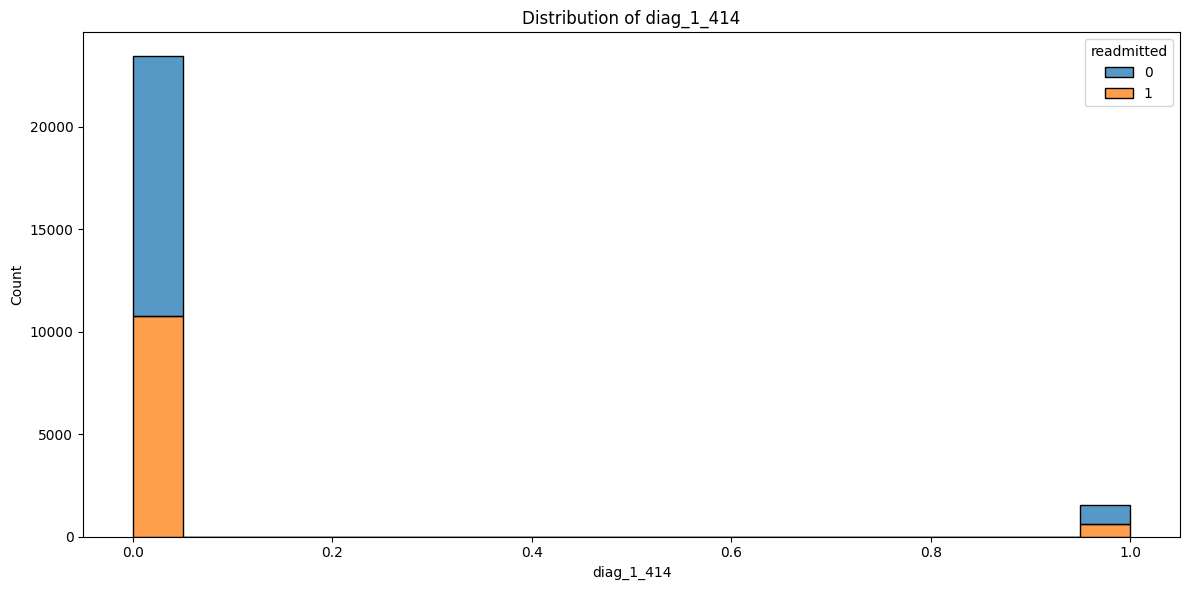

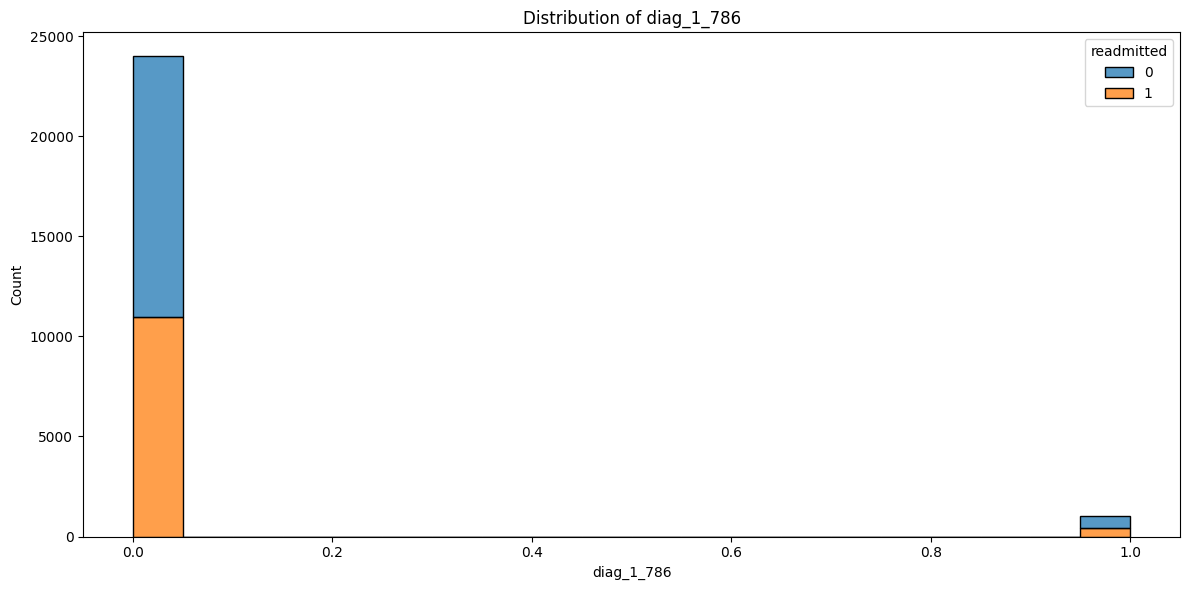

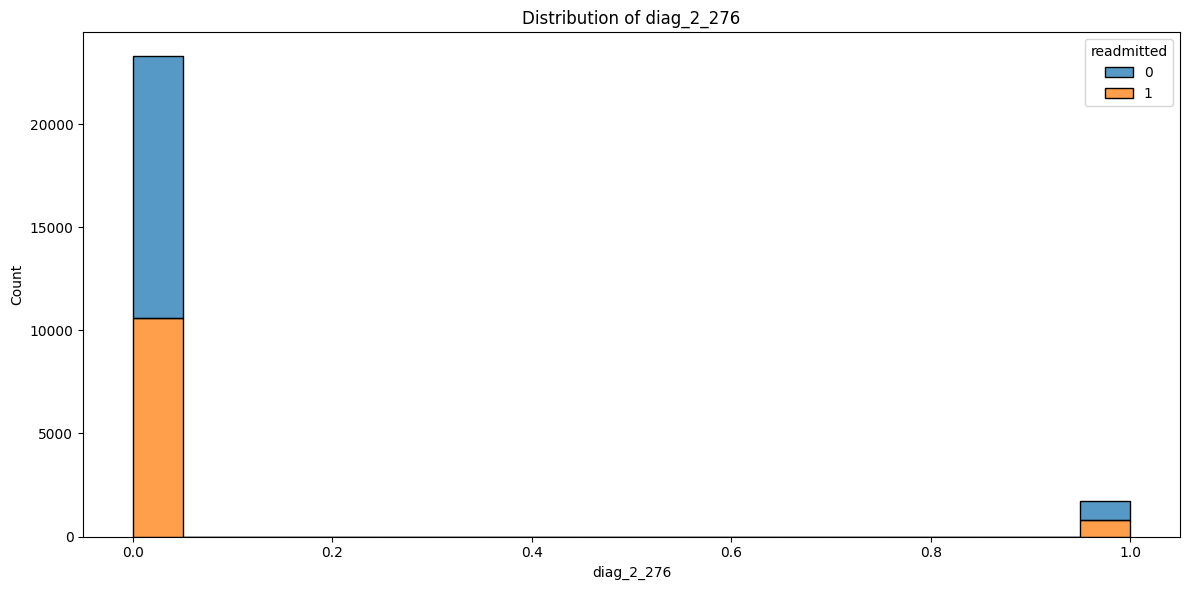

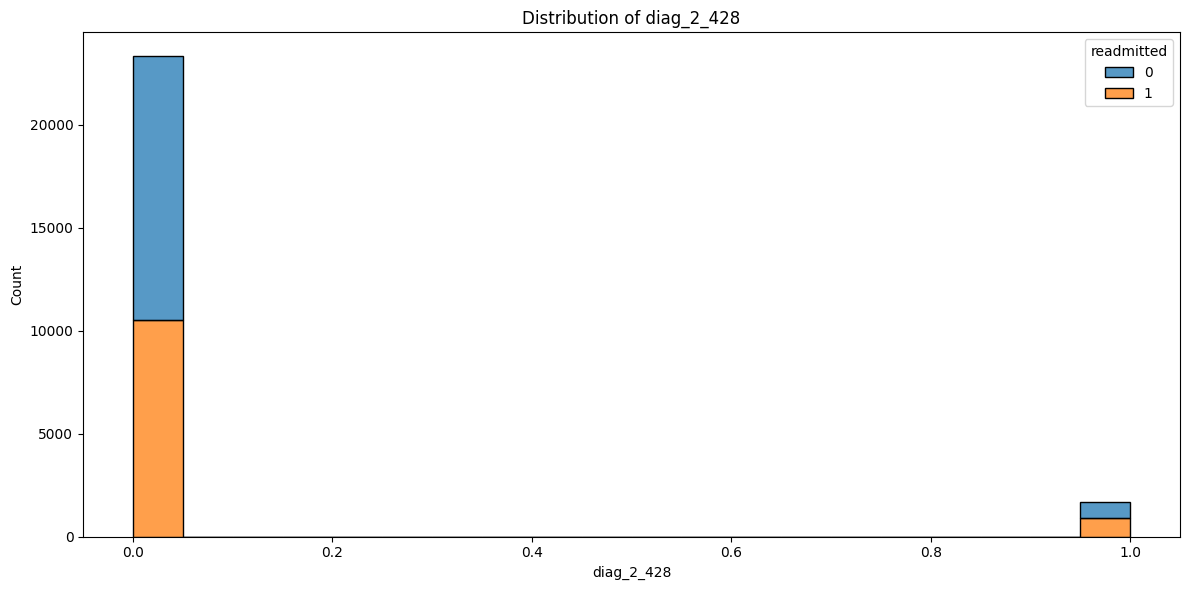

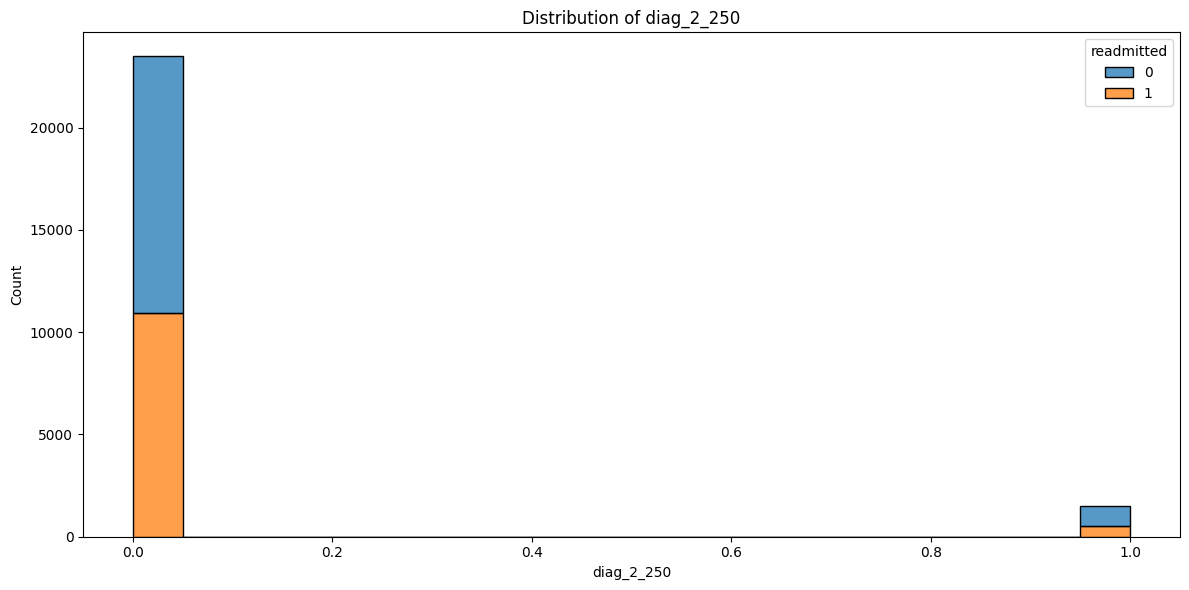

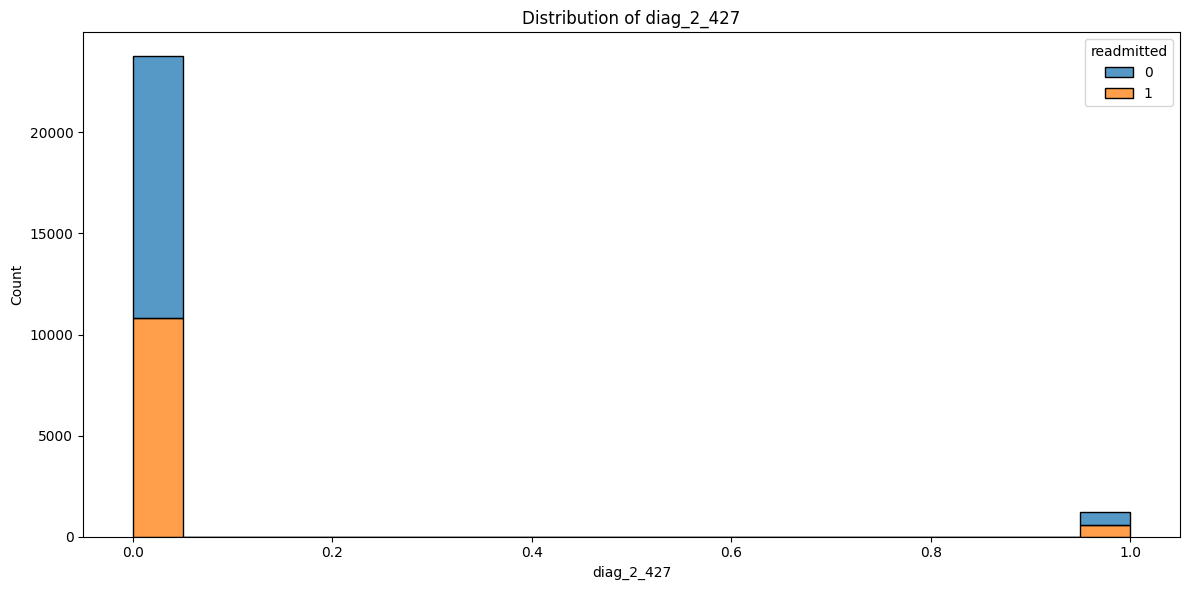

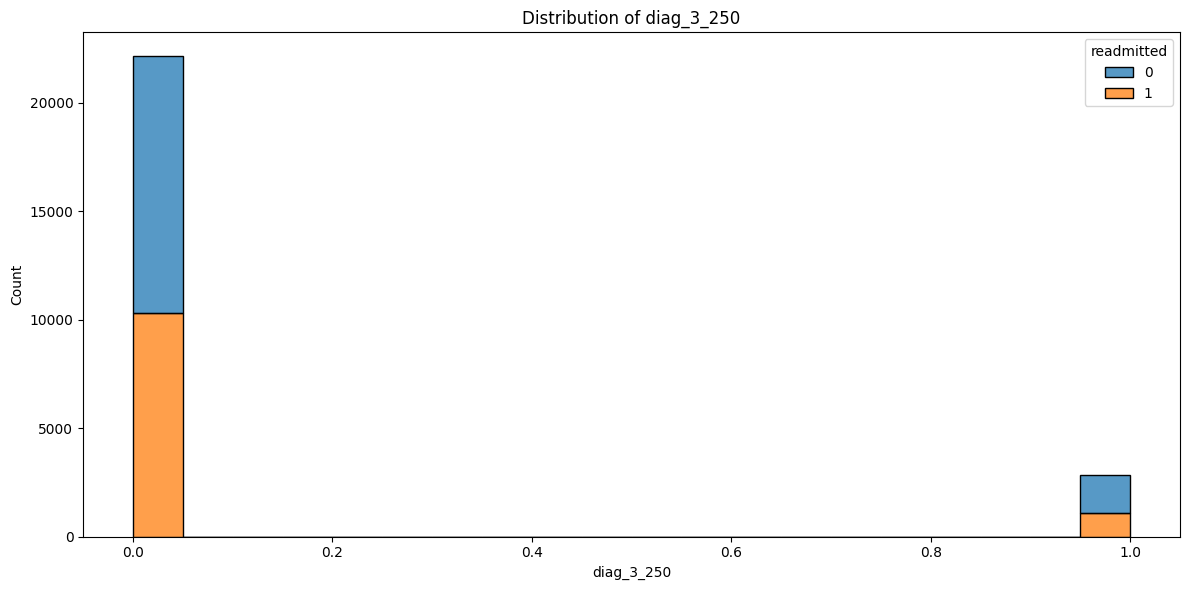

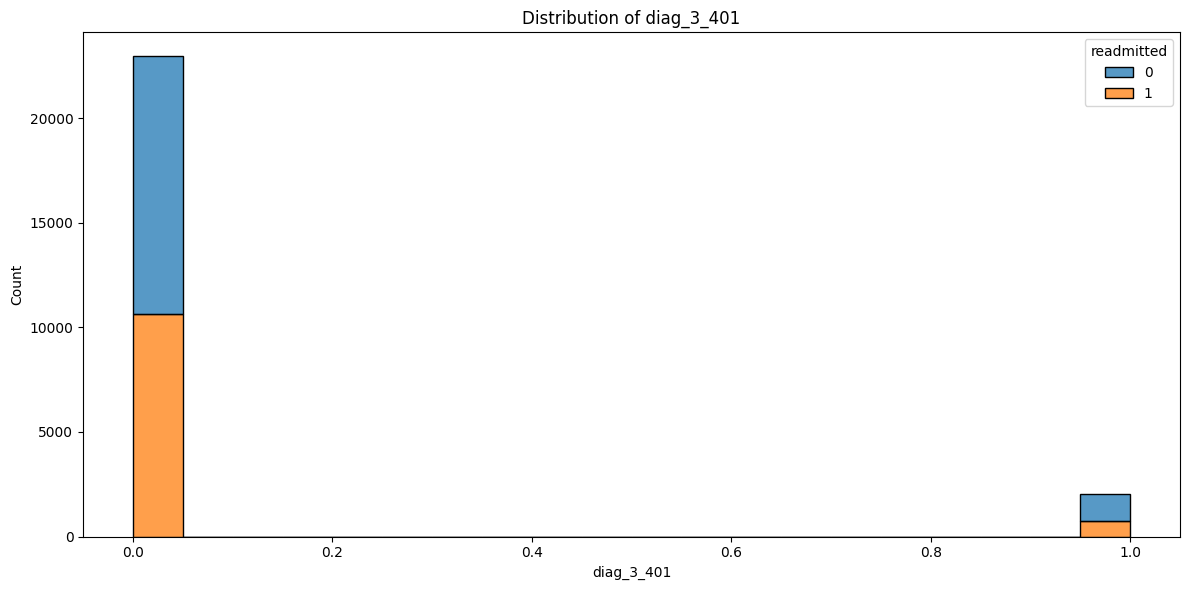

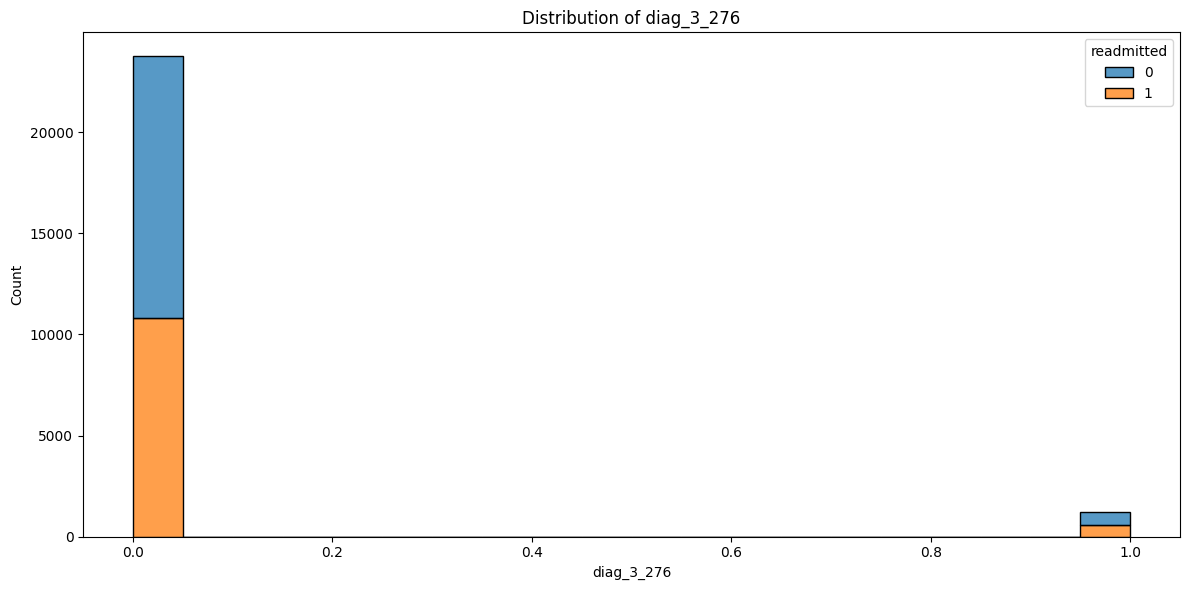

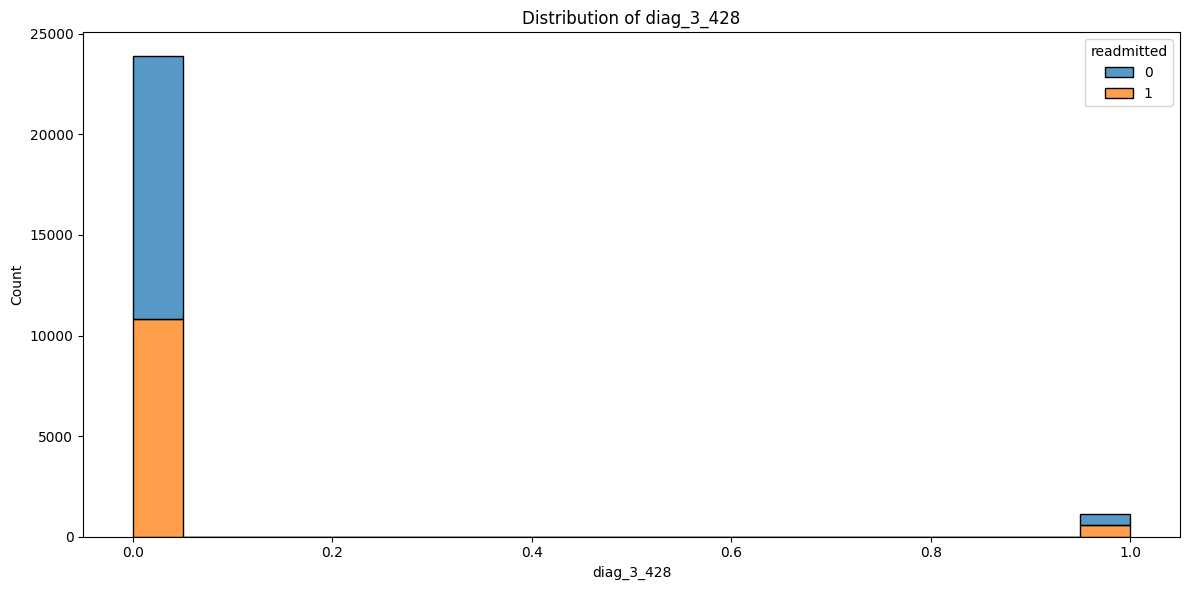

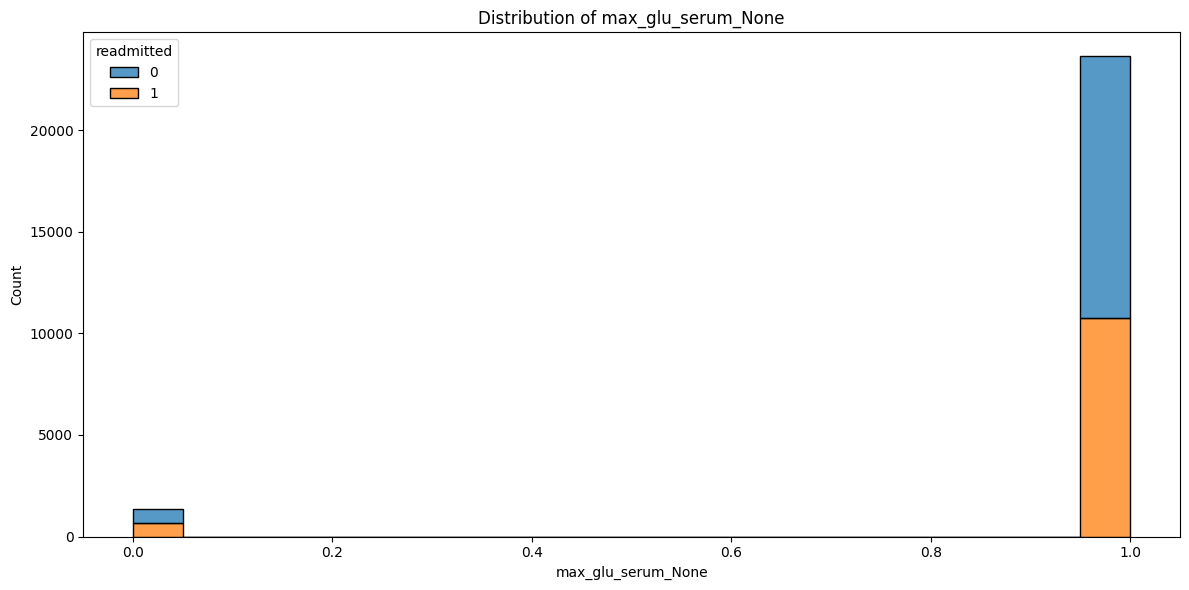

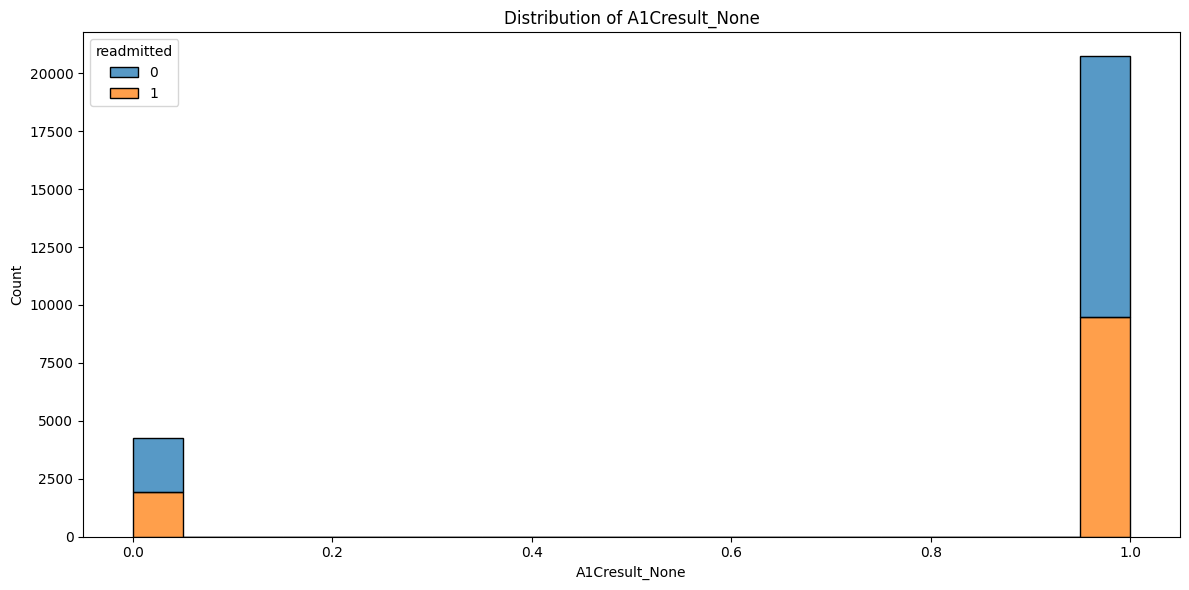

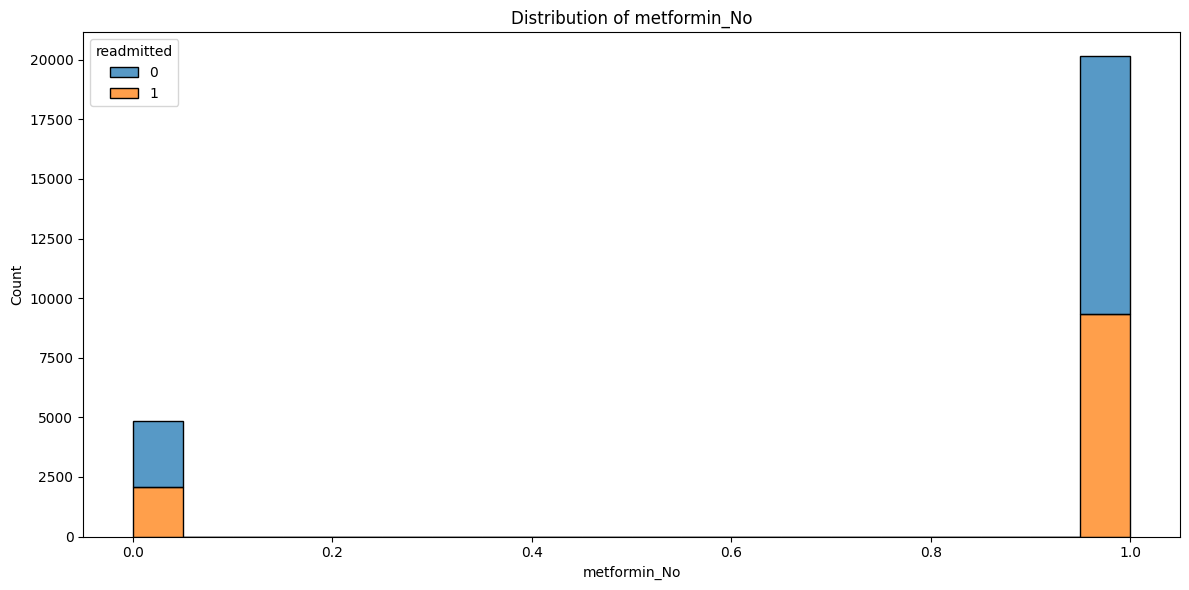

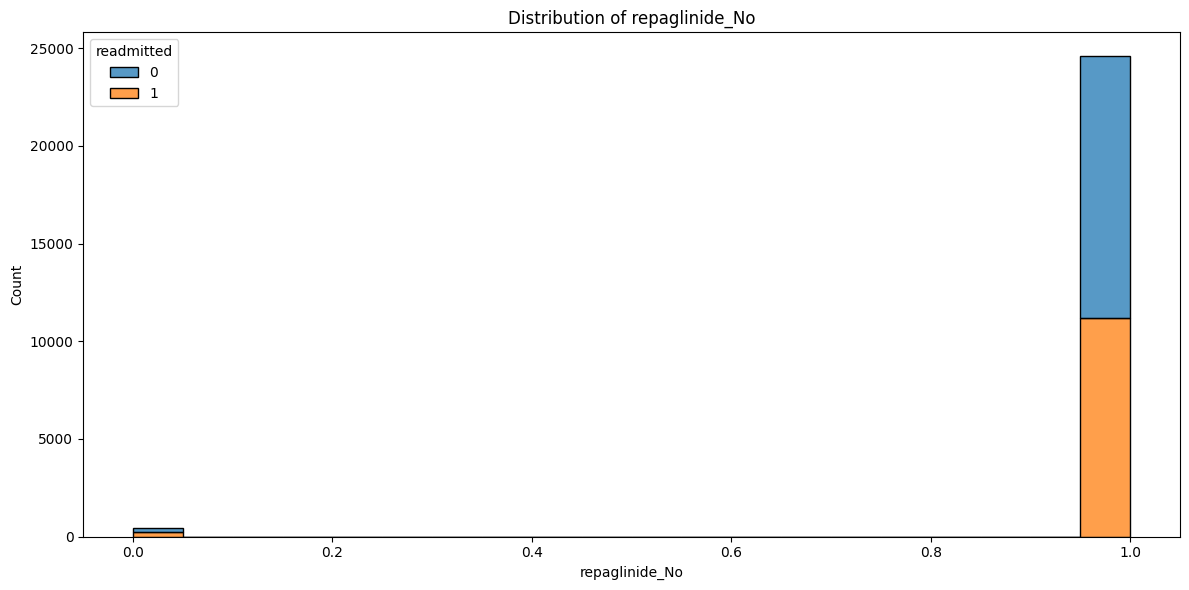

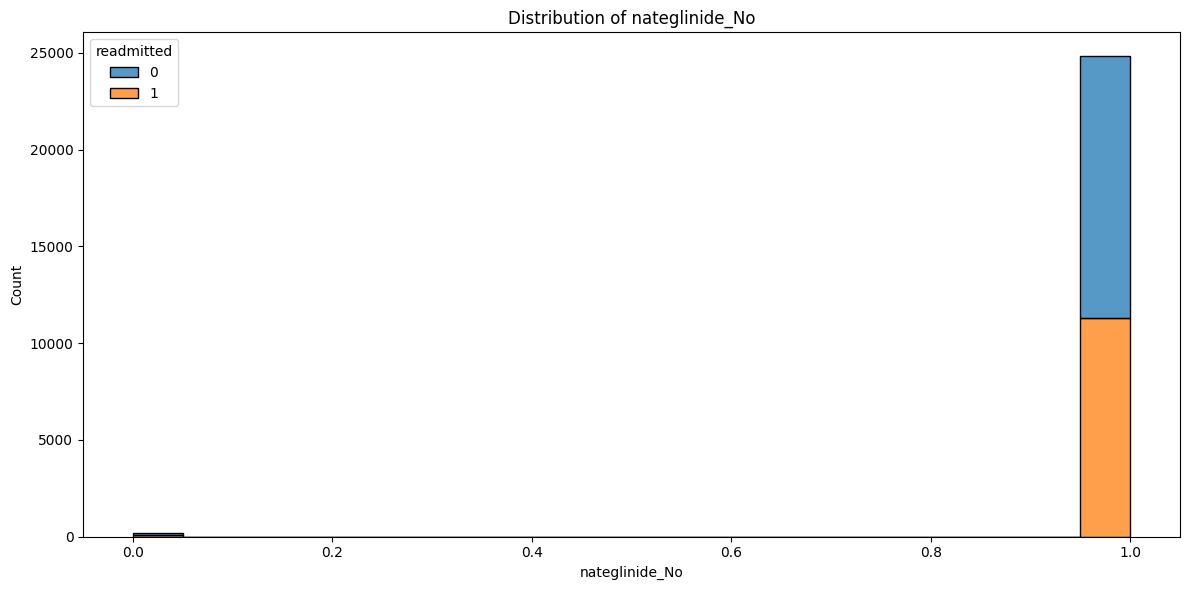

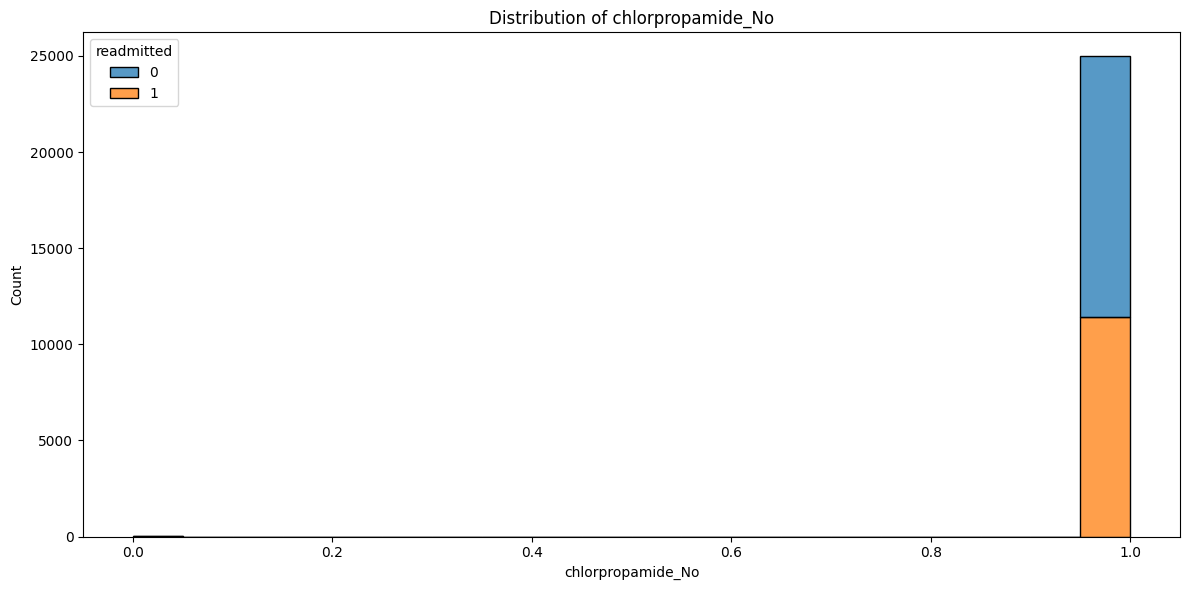

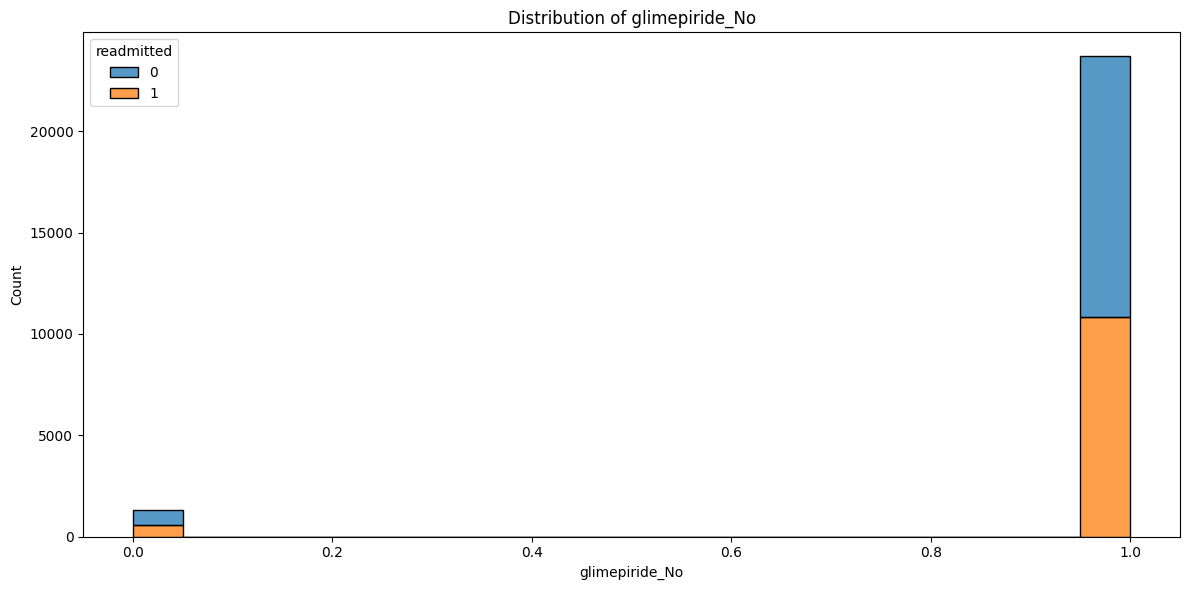

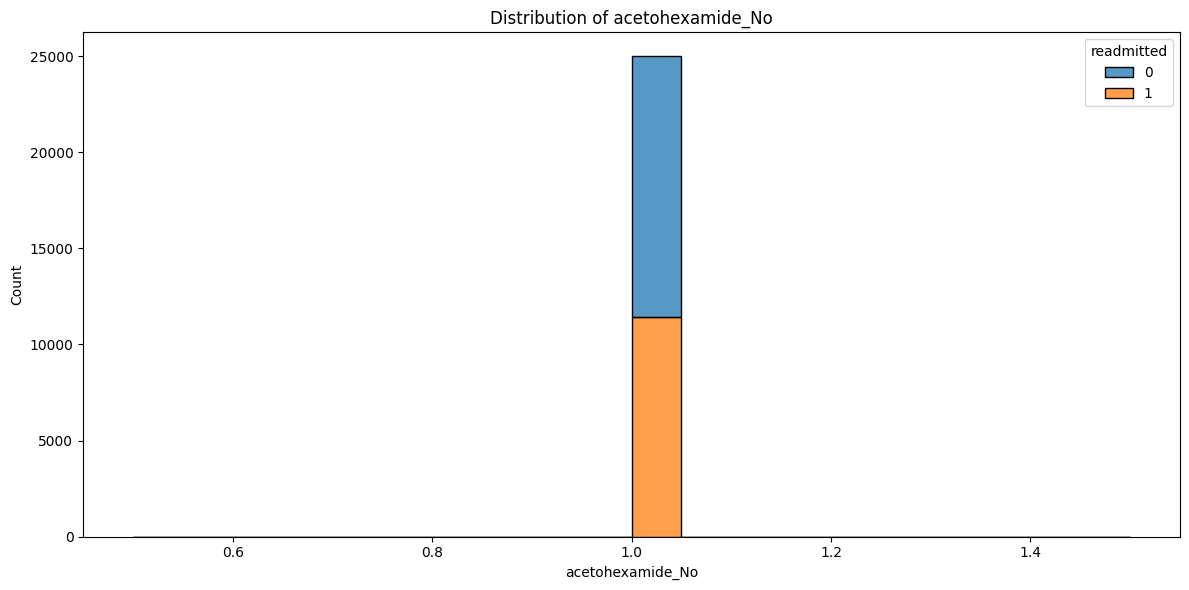

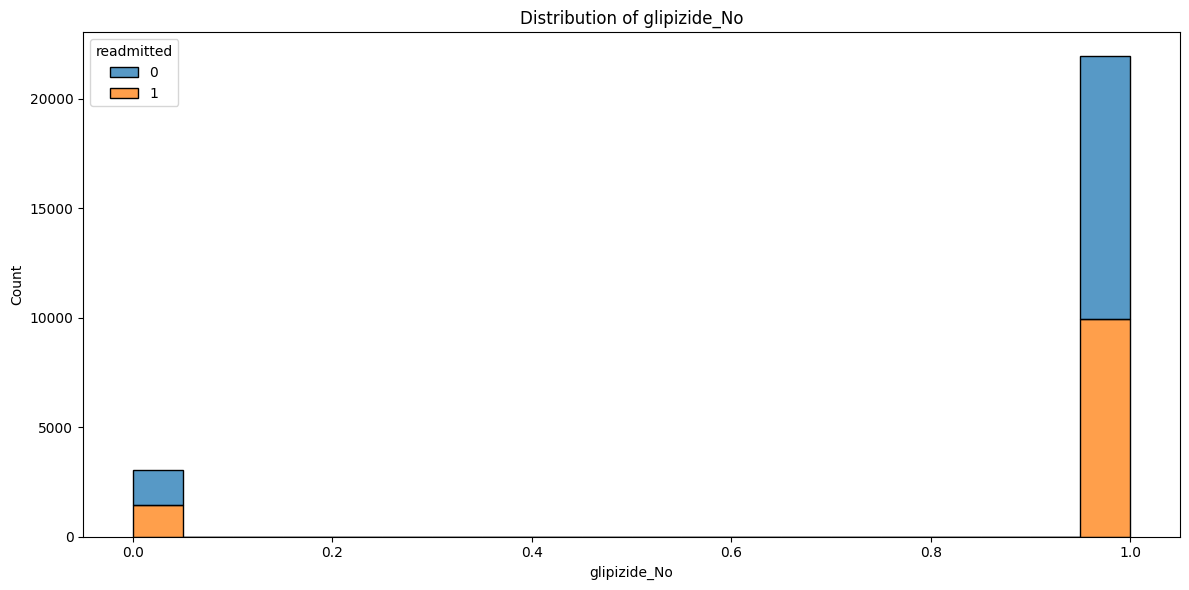

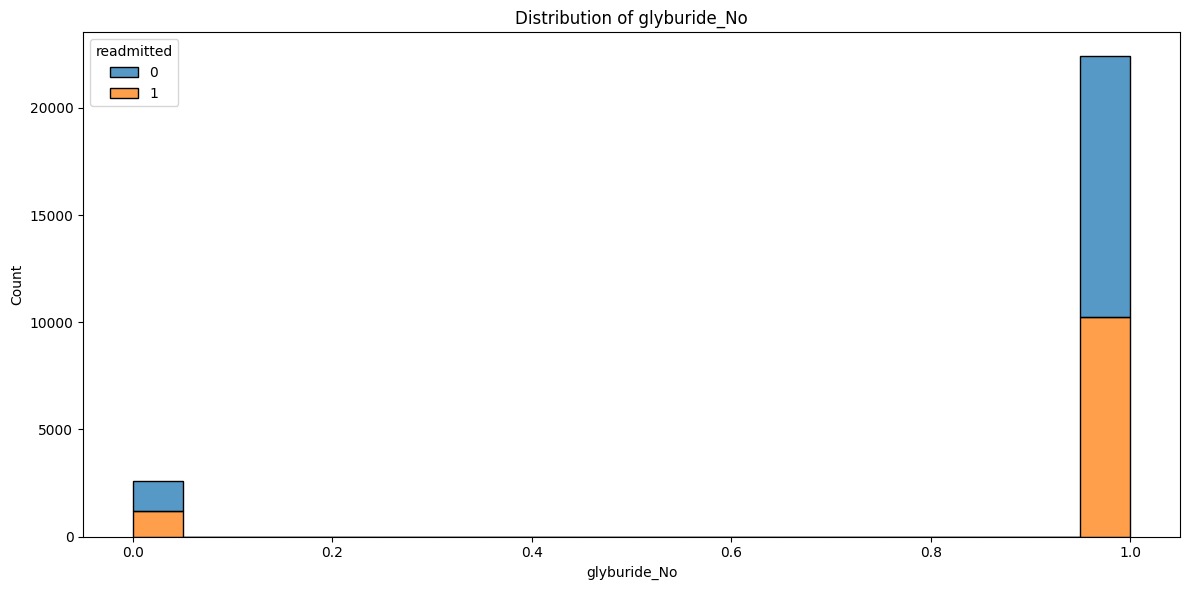

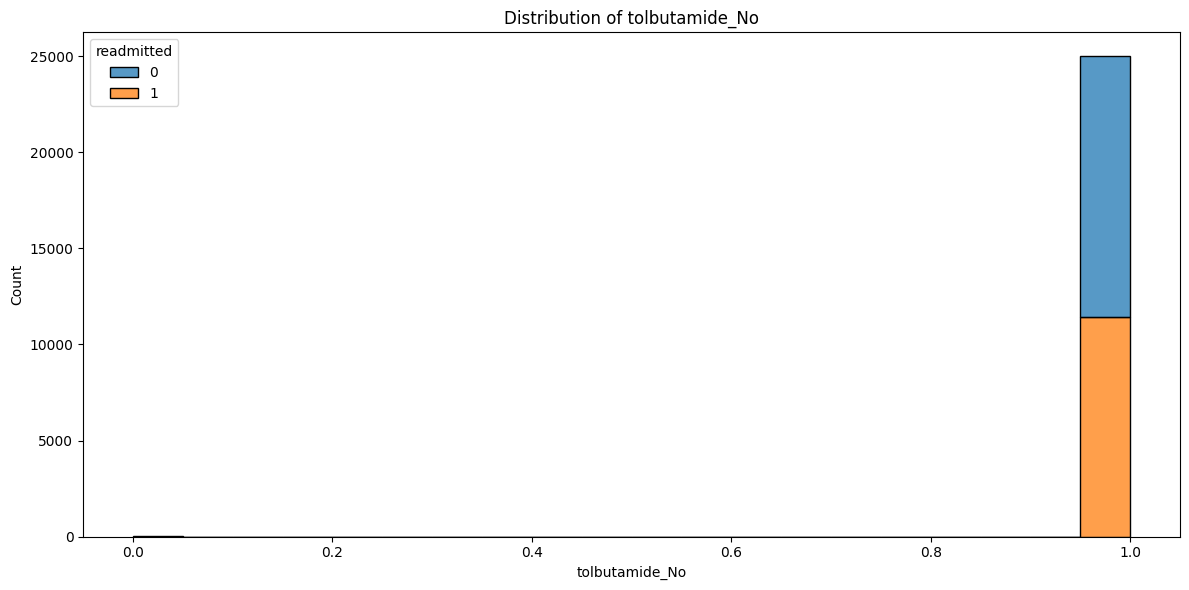

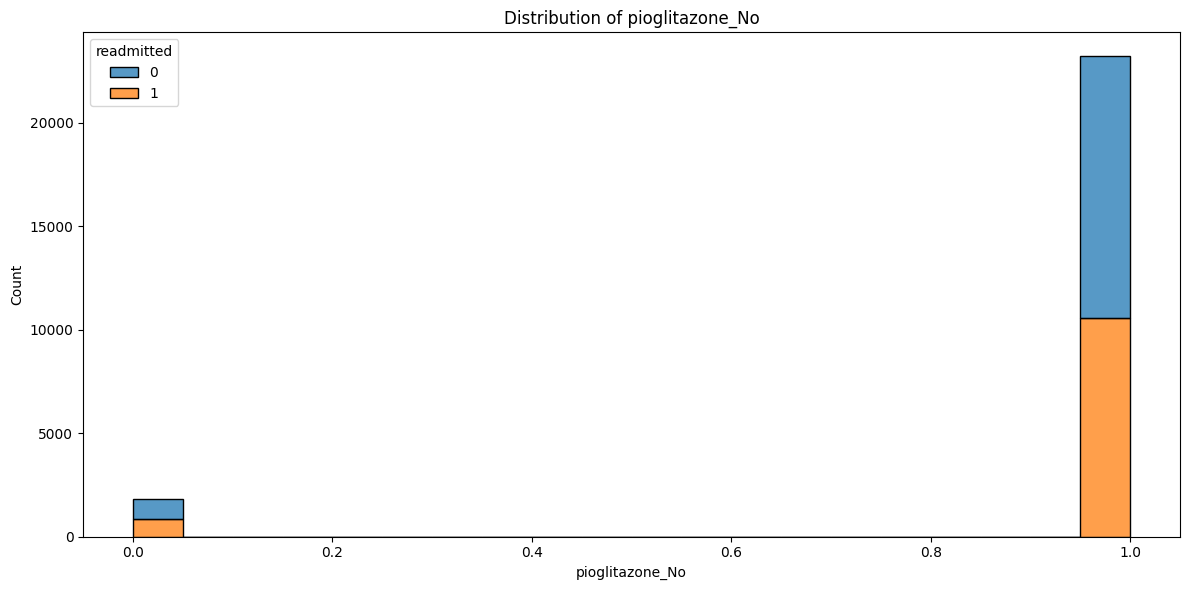

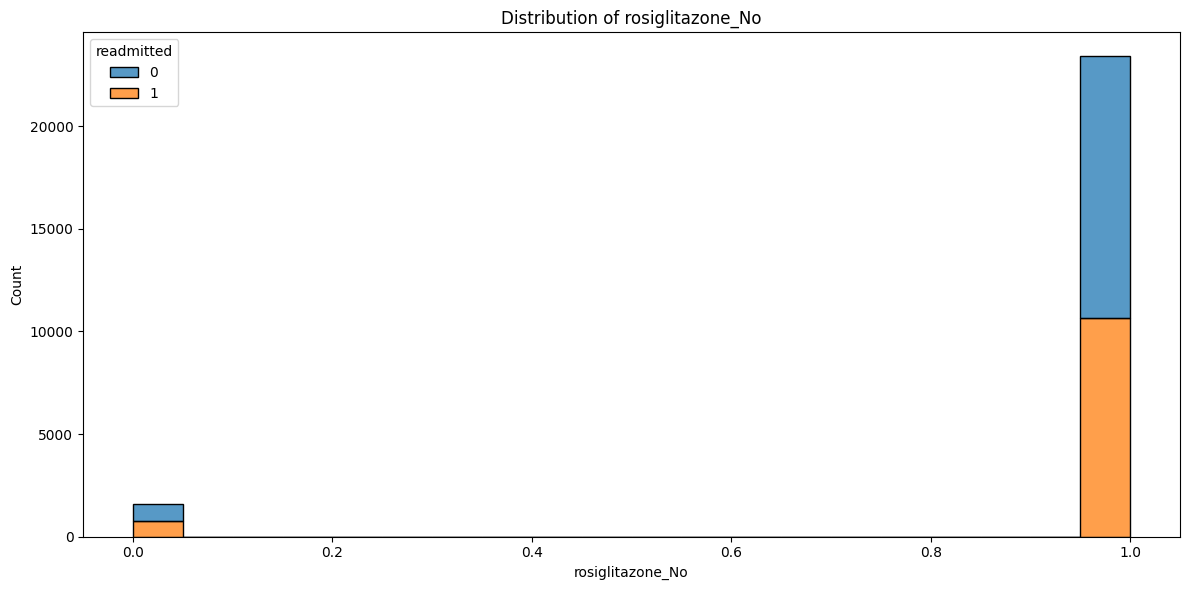

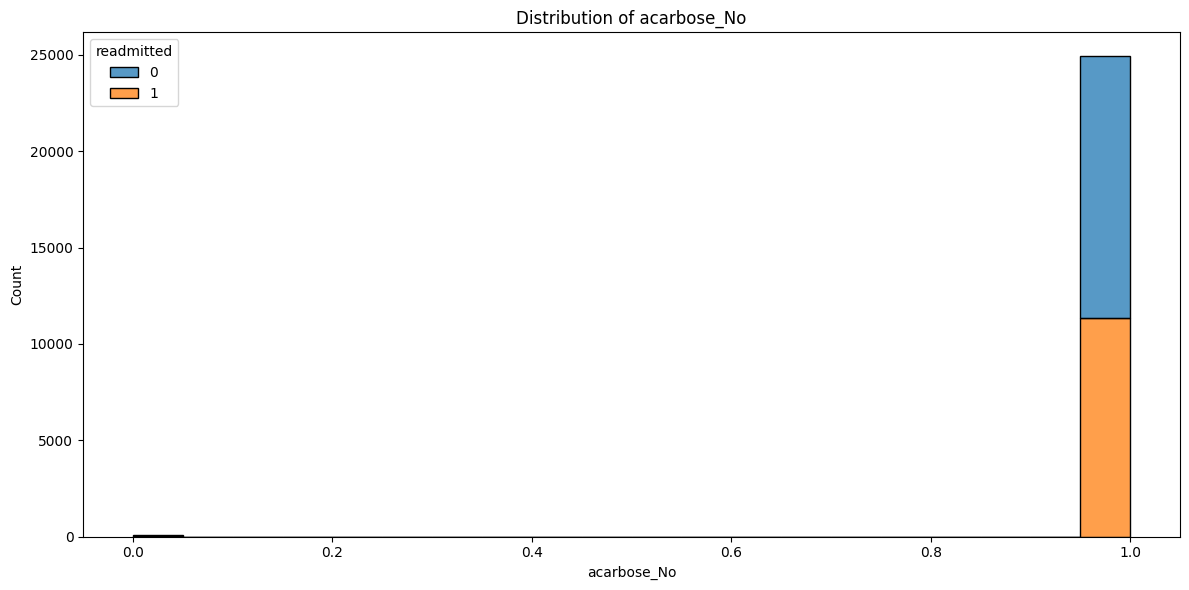

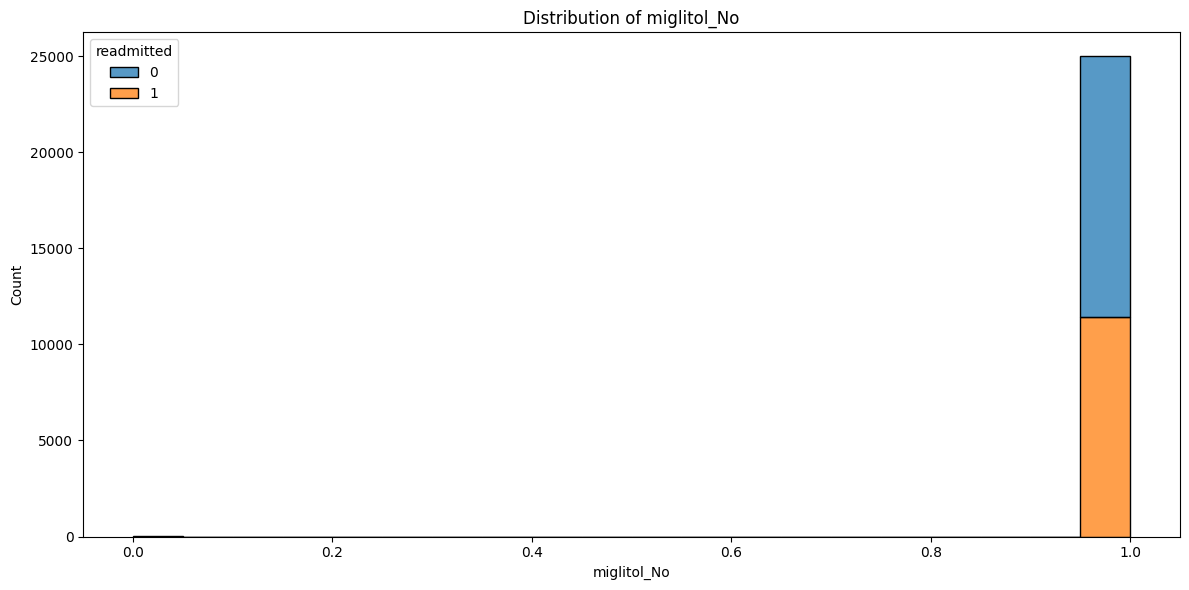

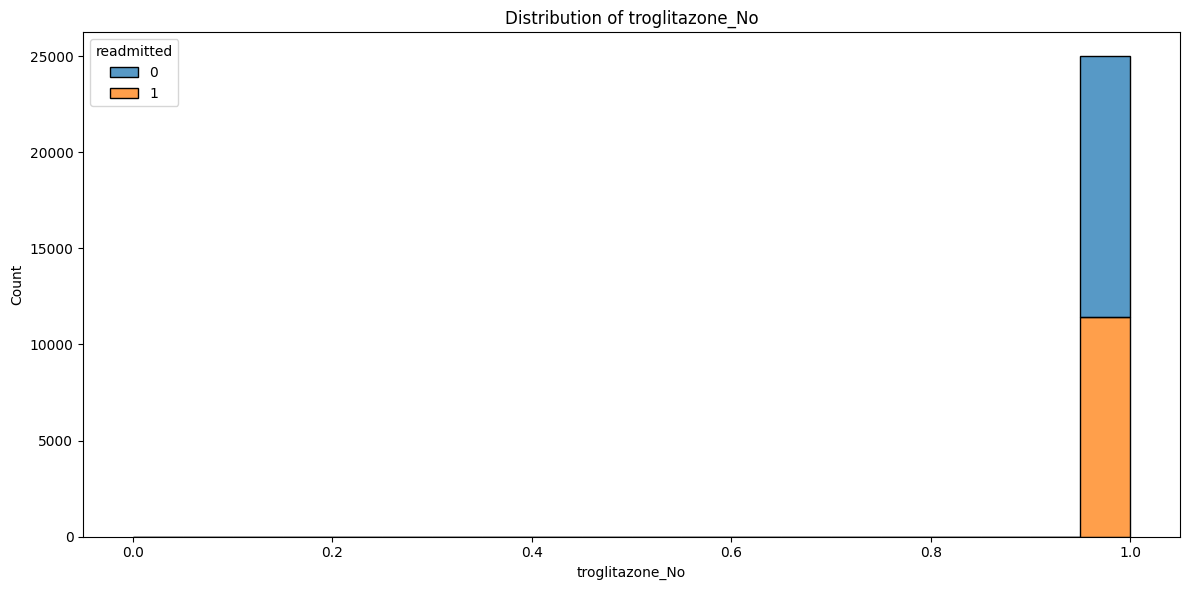

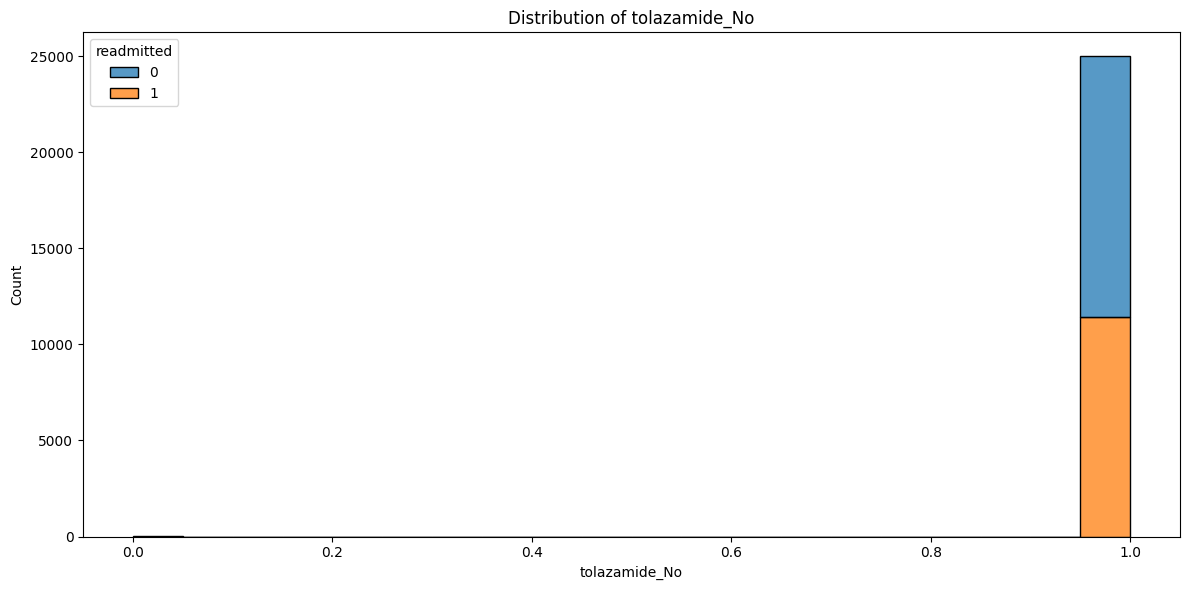

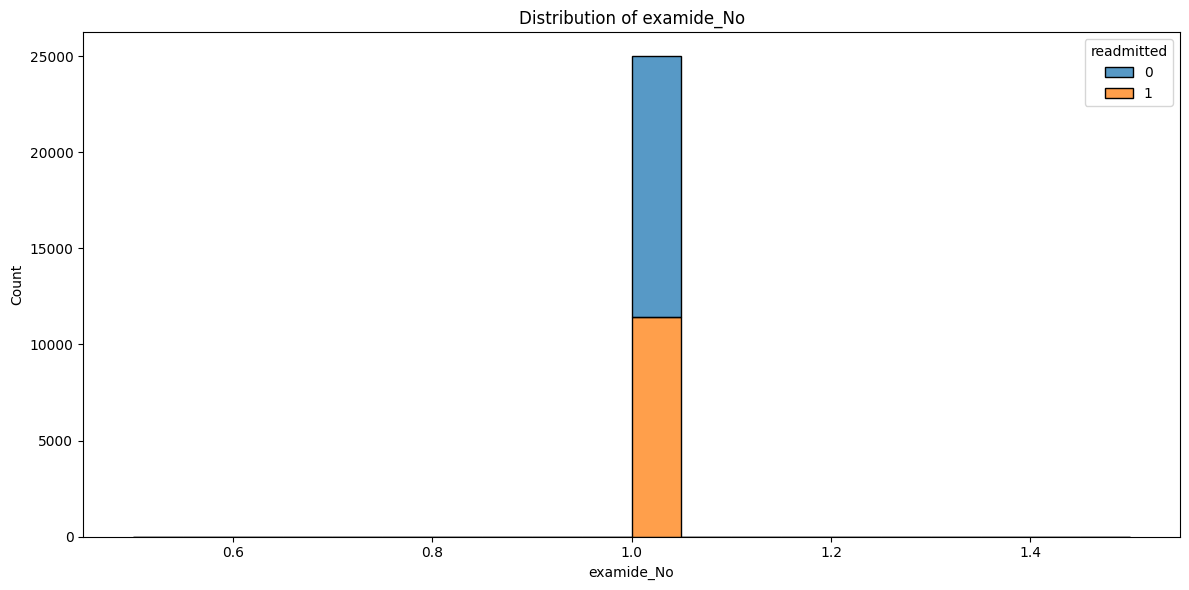

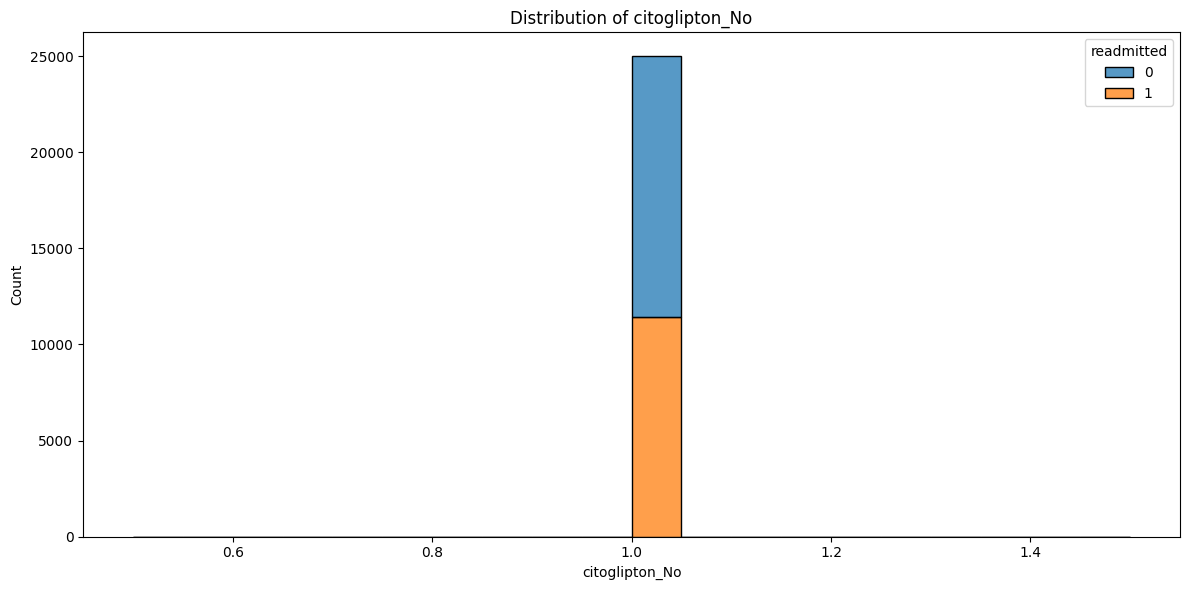

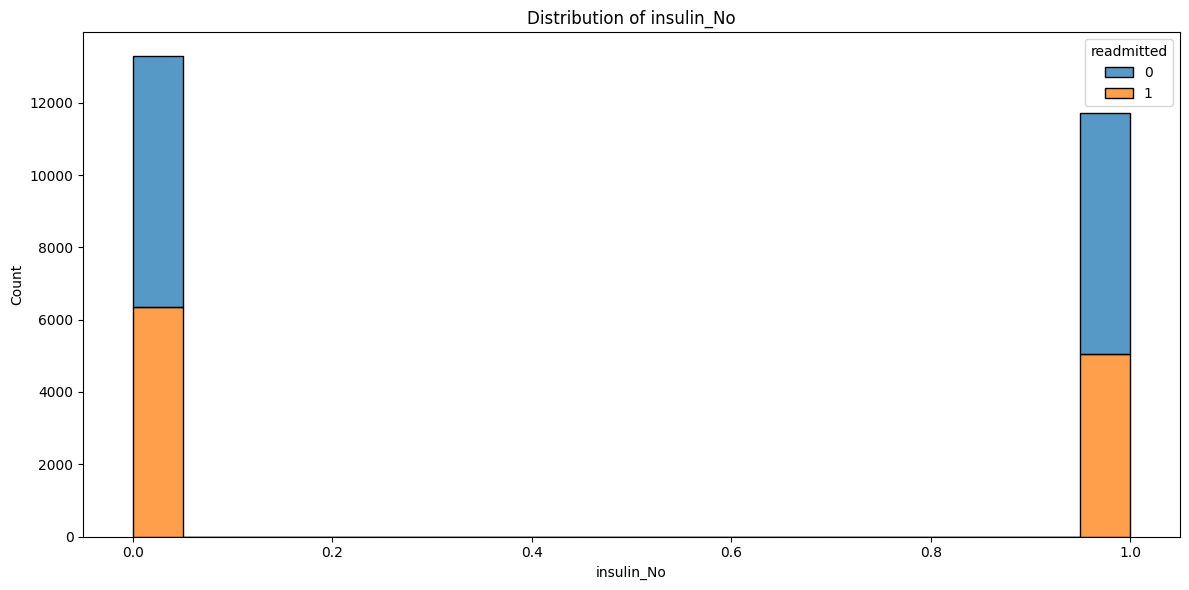

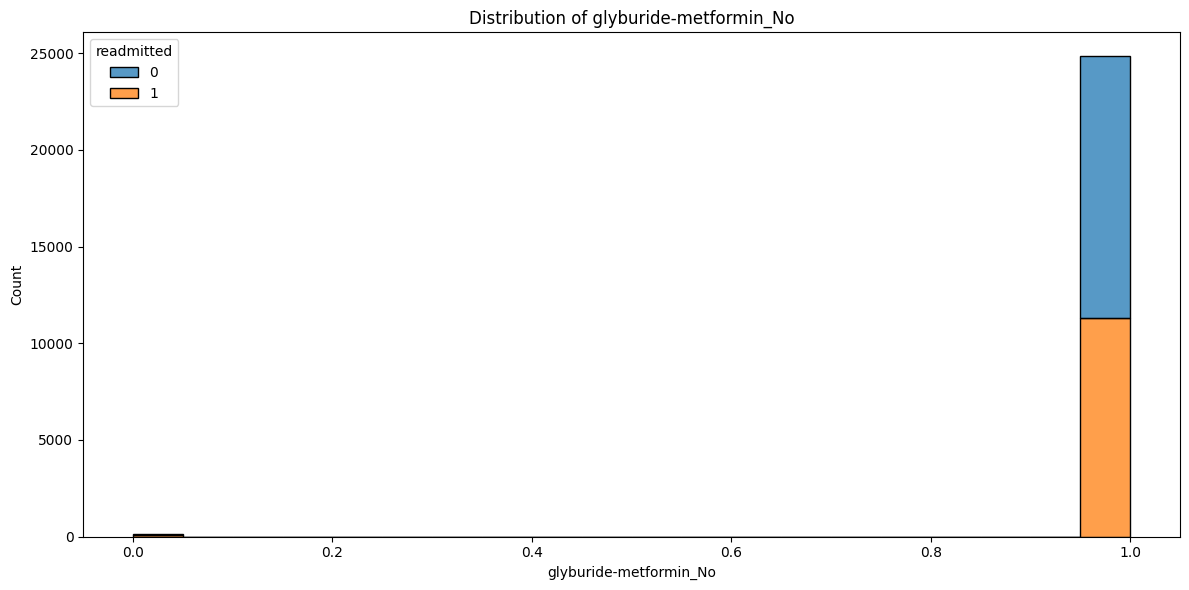

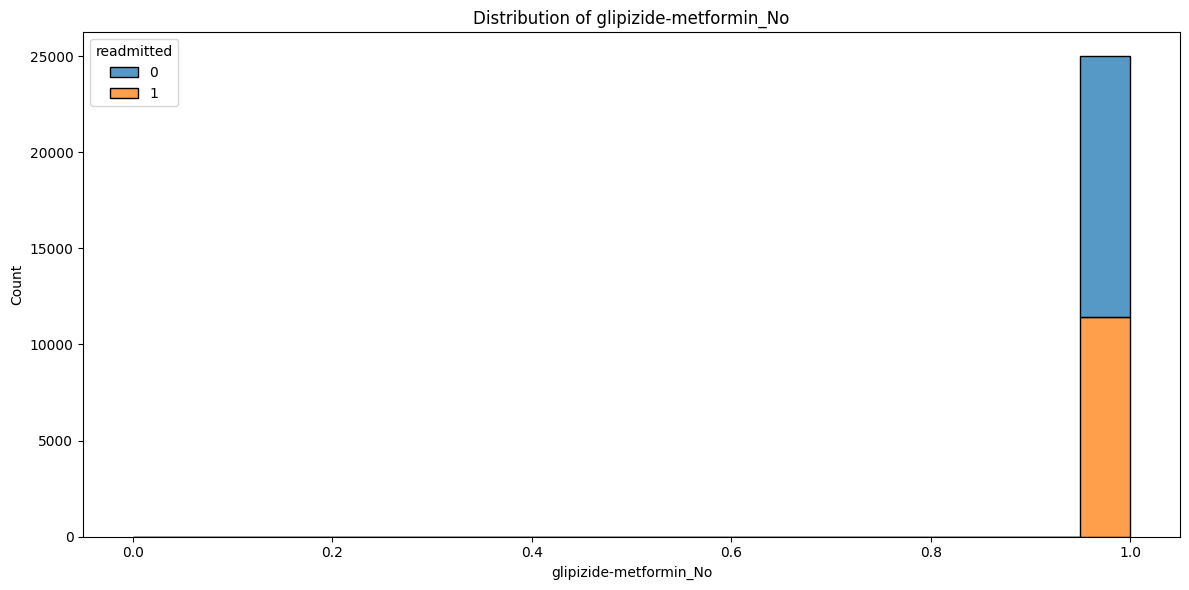

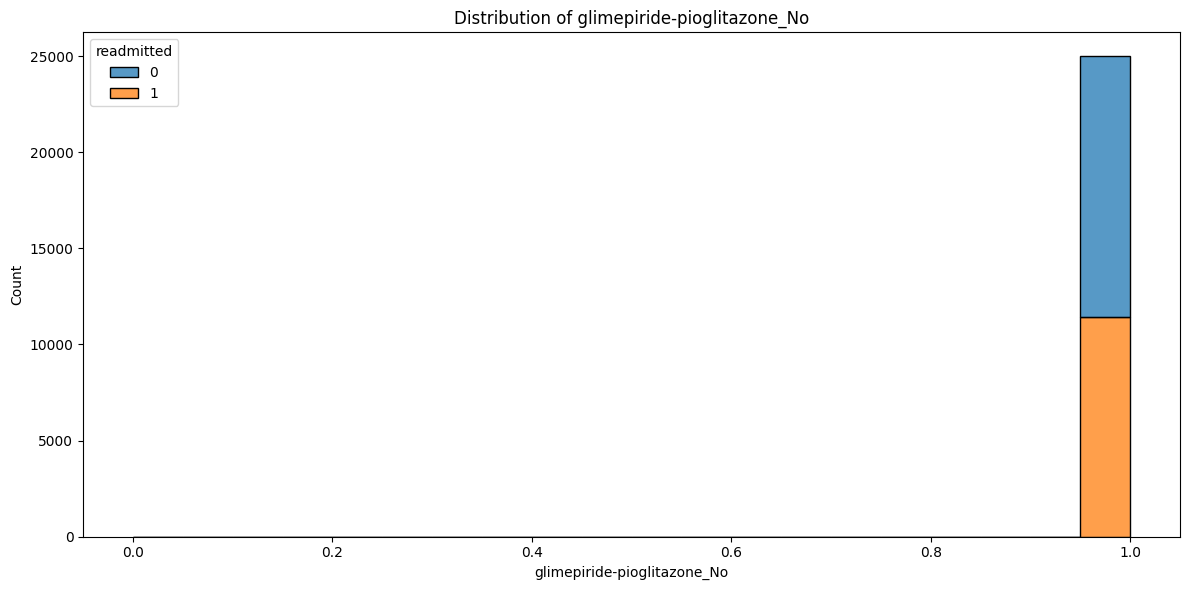

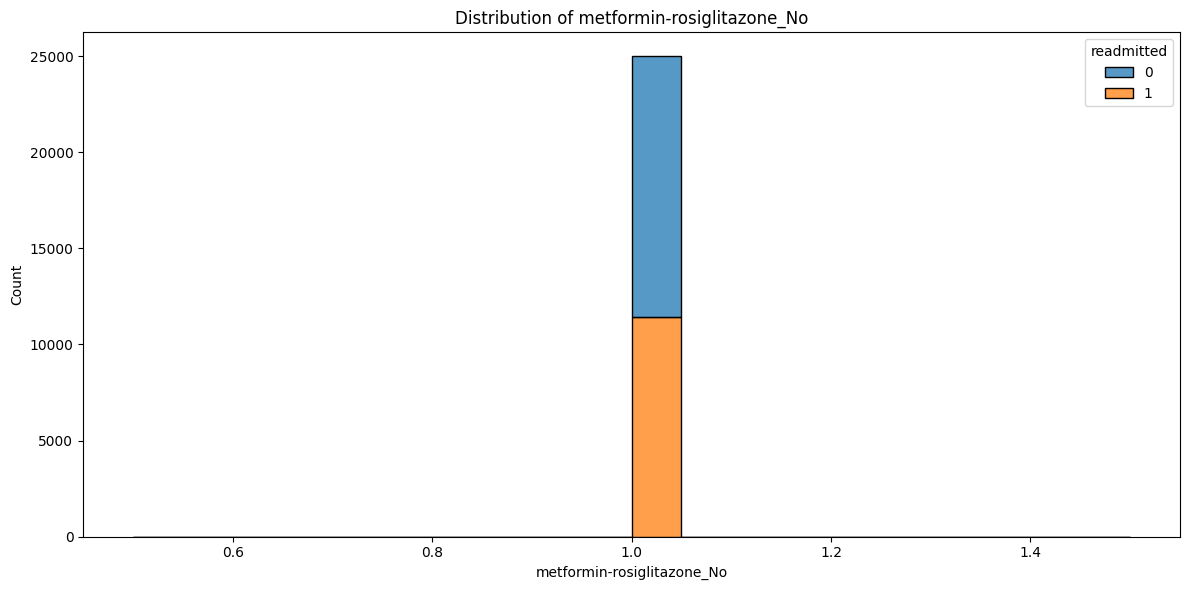

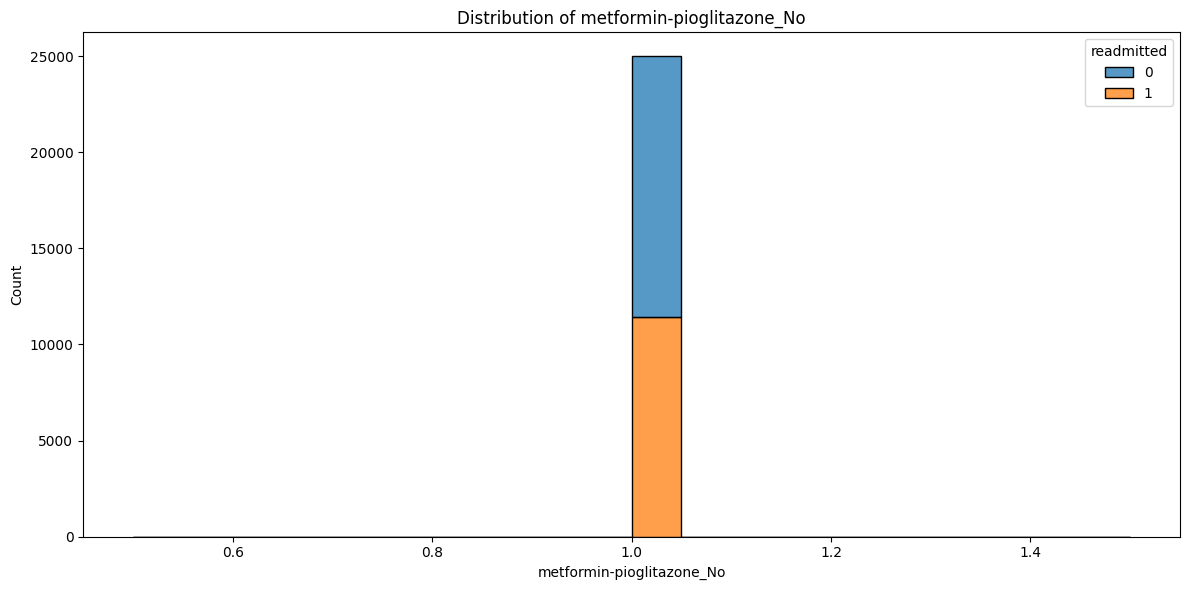

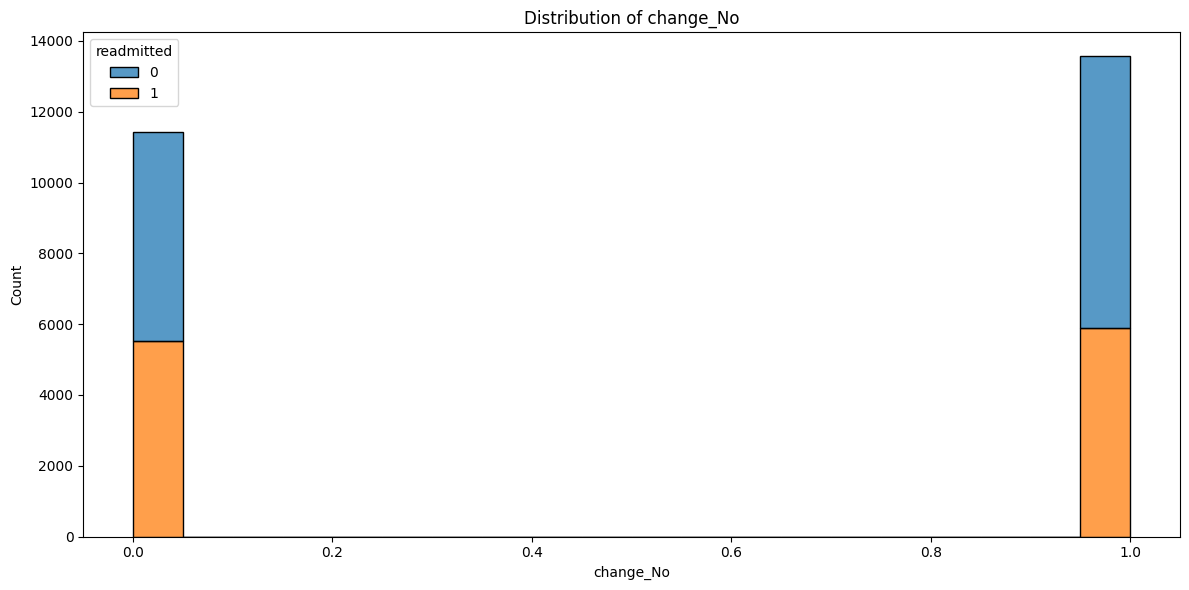

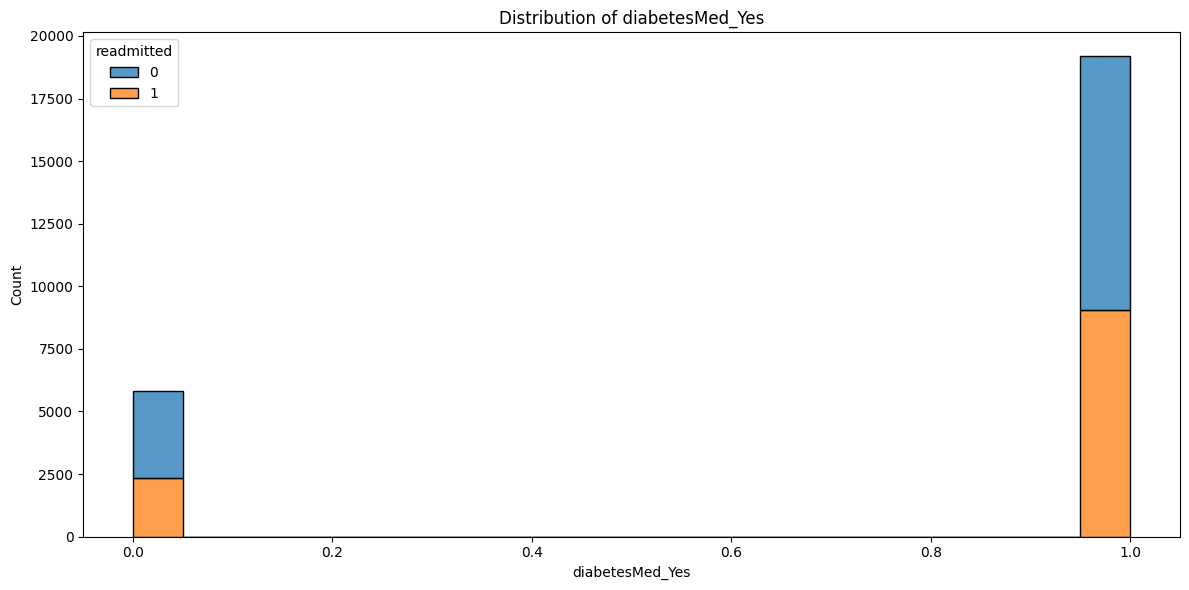

Variable: time_in_hospital
Summary Statistics:
count    25000.000000
mean         4.395640
std          2.991165
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64
Distribution by Readmission Status:
              count      mean       std  min  25%  50%  75%   max
readmitted                                                       
0           13590.0  4.237822  2.957562  1.0  2.0  3.0  6.0  14.0
1           11410.0  4.583611  3.020088  1.0  2.0  4.0  6.0  14.0
Variable: num_lab_procedures
Summary Statistics:
count    25000.00000
mean        42.96012
std         19.76881
min          1.00000
25%         31.00000
50%         44.00000
75%         57.00000
max        126.00000
Name: num_lab_procedures, dtype: float64
Distribution by Readmission Status:
              count       mean        std  min   25%   50%   75%    max
readmitted                                                             


In [35]:
# Perform EDA for variable by variable
for variable in variables_to_analyze:
    plt.figure(figsize=(12, 6))
    if variable in df.columns:
        if df[variable].dtype == 'object':
            sns.countplot(data=df, x=variable, hue='readmitted', palette='Set1')
            plt.title(f'Readmission by {variable}')
            plt.xticks(rotation=45)
        else:
            sns.histplot(data=df, x=variable, hue='readmitted', multiple='stack', bins=20)
            plt.title(f'Distribution of {variable}')
    plt.tight_layout()
    plt.show()


# Generate text representation of detailed EDA results
for variable in variables_to_analyze:
    print(f"Variable: {variable}")
    if variable in df.columns:
        if df[variable].dtype == 'object':
            print(f"Unique Values: {df[variable].unique()}")
            print(f"Value Counts:\n{df[variable].value_counts()}")
            print(f"Cross Tabulation:\n{pd.crosstab(df[variable], df['readmitted'], normalize='index')}")
        else:
            print(f"Summary Statistics:\n{df[variable].describe()}")
            print(f"Distribution by Readmission Status:\n{df.groupby('readmitted')[variable].describe()}")
    print("="*80)

## Derivative Variabes

### Creating Derivative Variables

In [36]:
# Combine similar variables to create derivative variables
df['total_age'] = df['age_[70-80)'] + df['age_[60-70)'] + df['age_[50-60)'] + df['age_[80-90)'] + df['age_[40-50)']
df['total_race'] = df['race_Caucasian'] + df['race_AfricanAmerican']
df['total_payer'] = df['payer_code_?'] + df['payer_code_MC'] + df['payer_code_HM'] + df['payer_code_SP'] + df['payer_code_BC']
df['total_medical_specialty'] = df['medical_specialty_?'] + df['medical_specialty_InternalMedicine'] + df['medical_specialty_Emergency/Trauma'] + df['medical_specialty_Family/GeneralPractice'] + df['medical_specialty_Cardiology']
df['total_diagnosis'] = df['diag_1_428'] + df['diag_1_414'] + df['diag_1_786'] + df['diag_2_276'] + df['diag_2_428'] + df['diag_2_250'] + df['diag_2_427'] + df['diag_3_250'] + df['diag_3_401'] + df['diag_3_276'] + df['diag_3_428']
df['total_meds'] = df.loc[:, 'metformin_No':'metformin-pioglitazone_No'].sum(axis=1)
df['total_glucose_tests'] = df['max_glu_serum_None'] + df['A1Cresult_None']
df['total_insulin'] = df['insulin_No'] + df['glyburide-metformin_No'] + df['glipizide-metformin_No'] + df['glimepiride-pioglitazone_No'] + df['metformin-rosiglitazone_No'] + df['metformin-pioglitazone_No']
df['total_change_diabetesMed'] = df['change_No'] + df['diabetesMed_Yes']


In [37]:
# List of derived variables for EDA
derived_variables = ['total_age', 'total_race', 'total_payer', 'total_medical_specialty',
                     'total_diagnosis', 'total_meds', 'total_glucose_tests', 'total_insulin', 'total_change_diabetesMed']

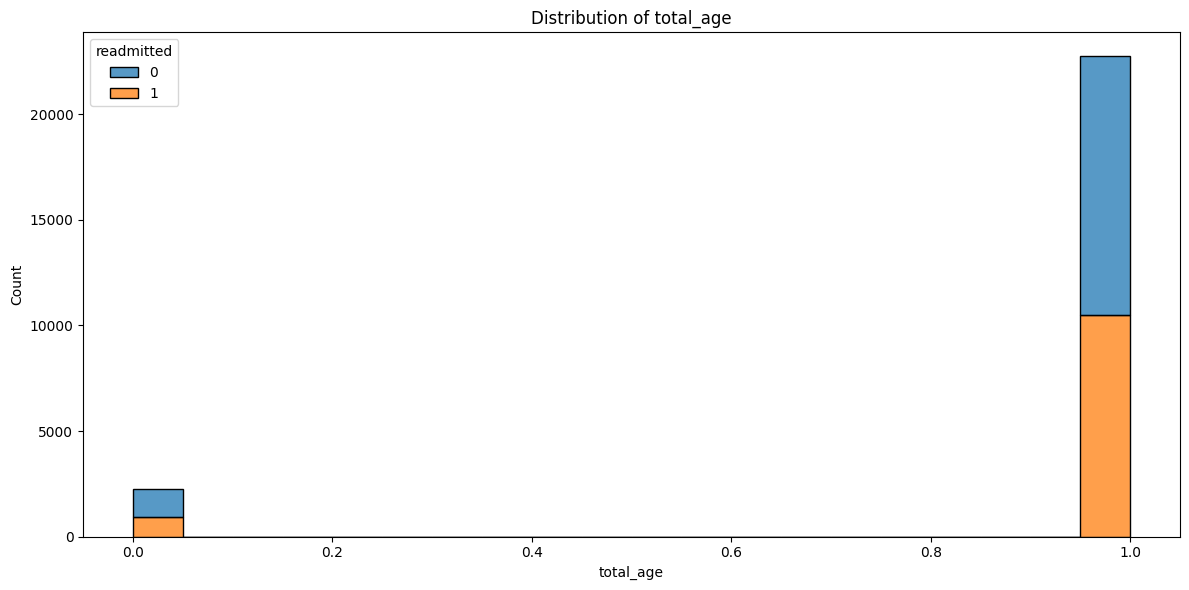

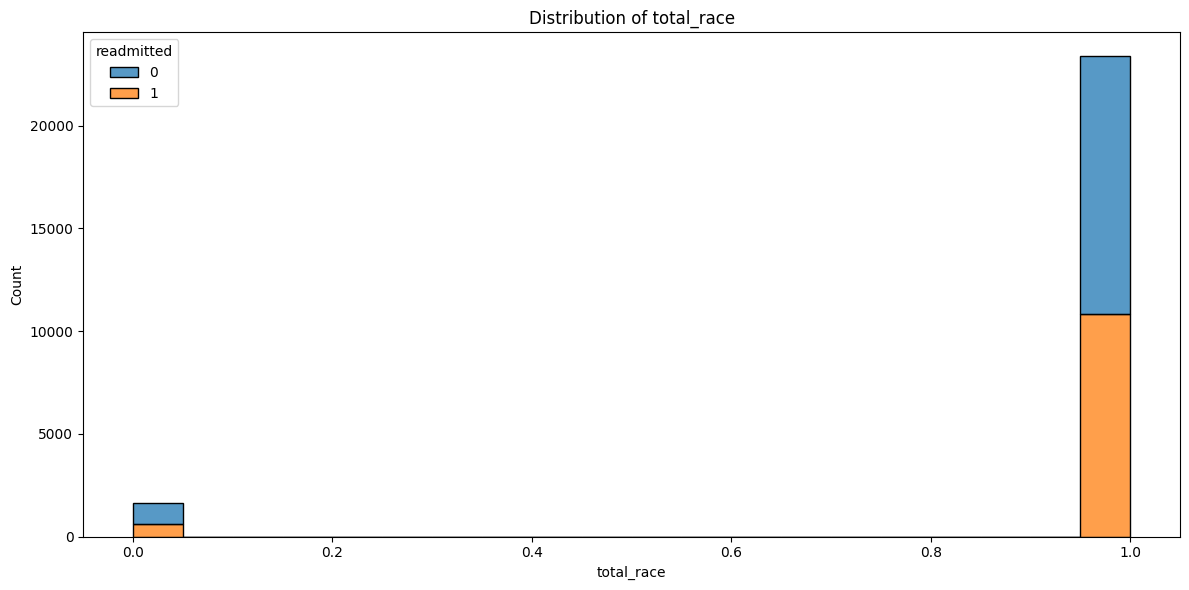

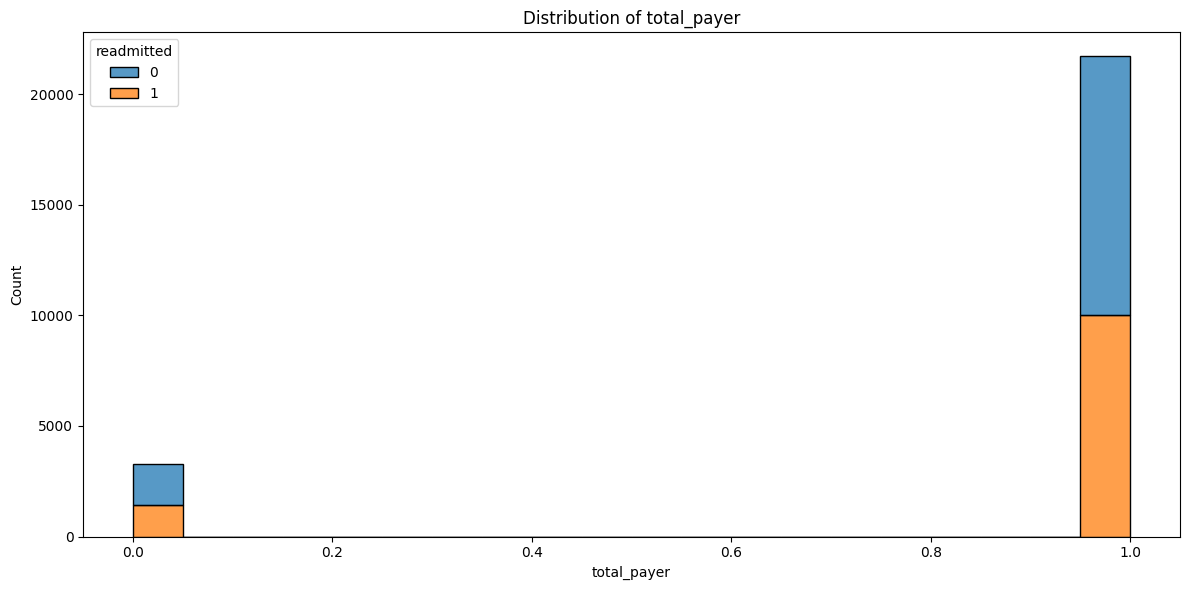

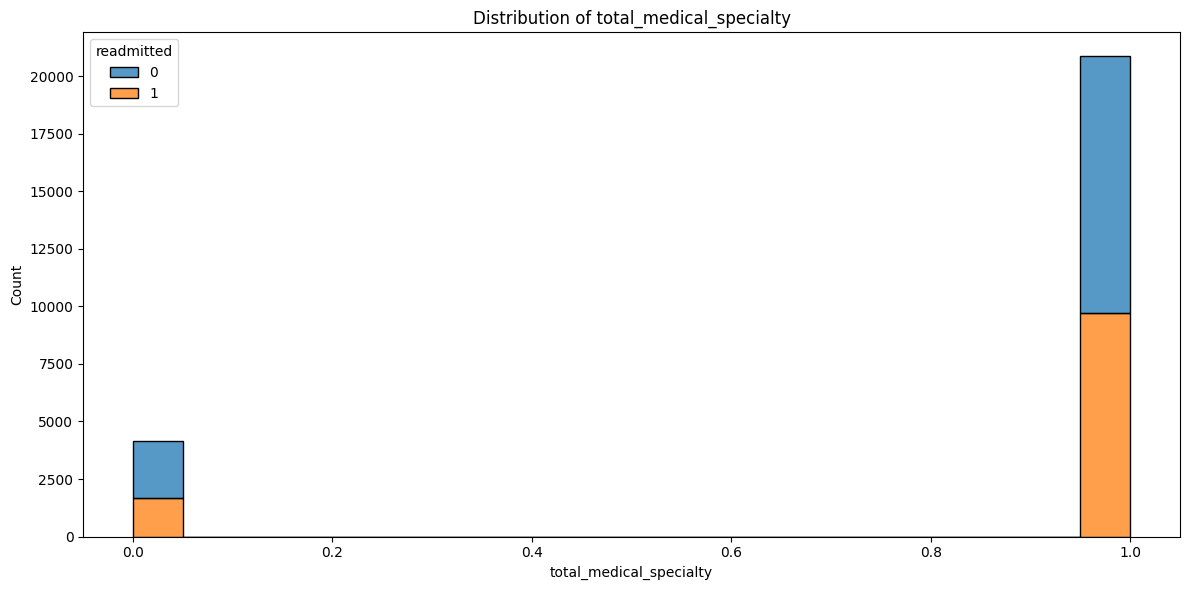

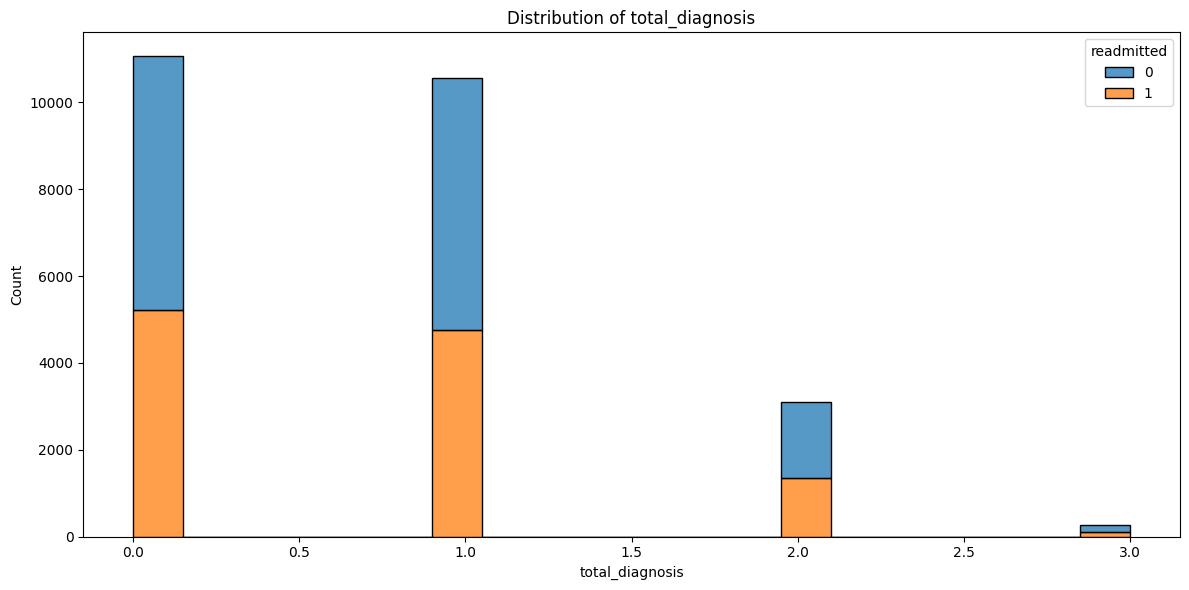

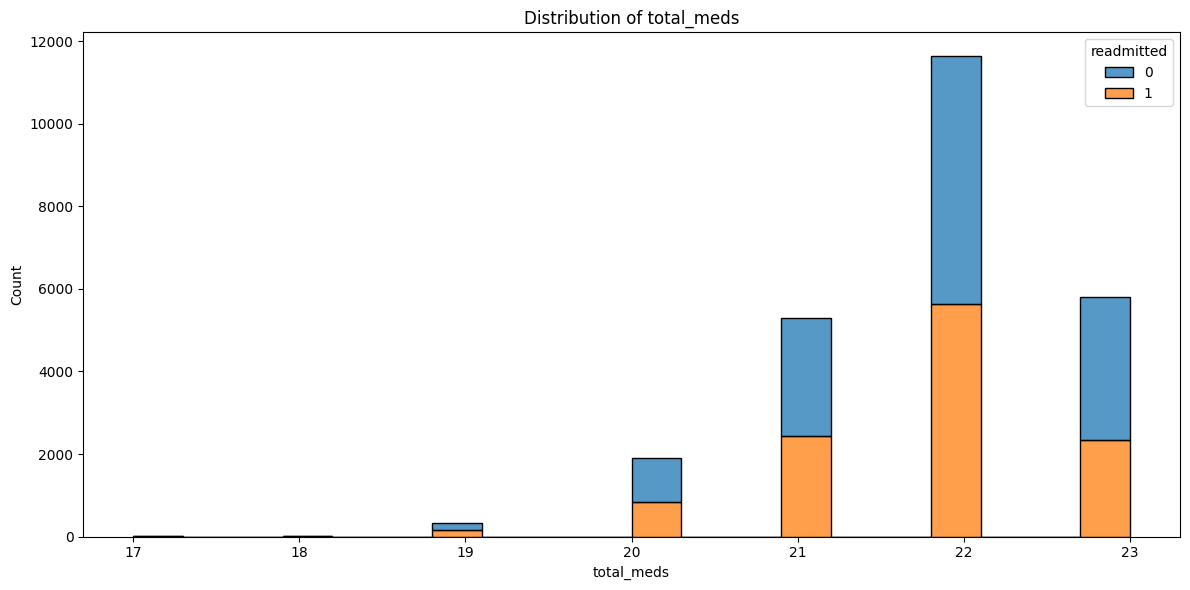

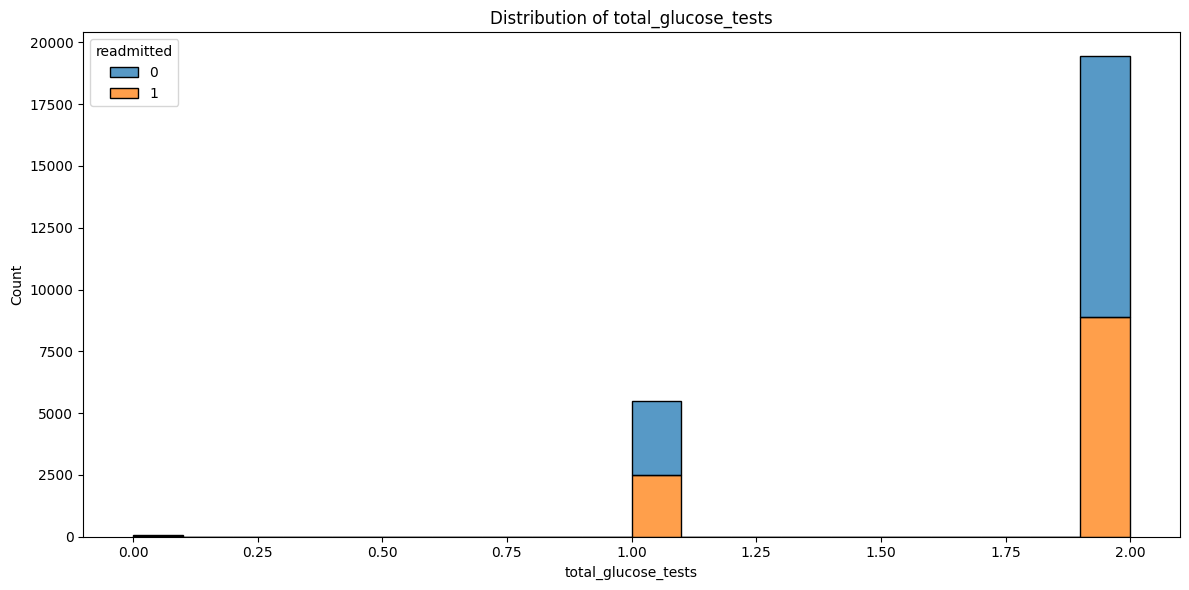

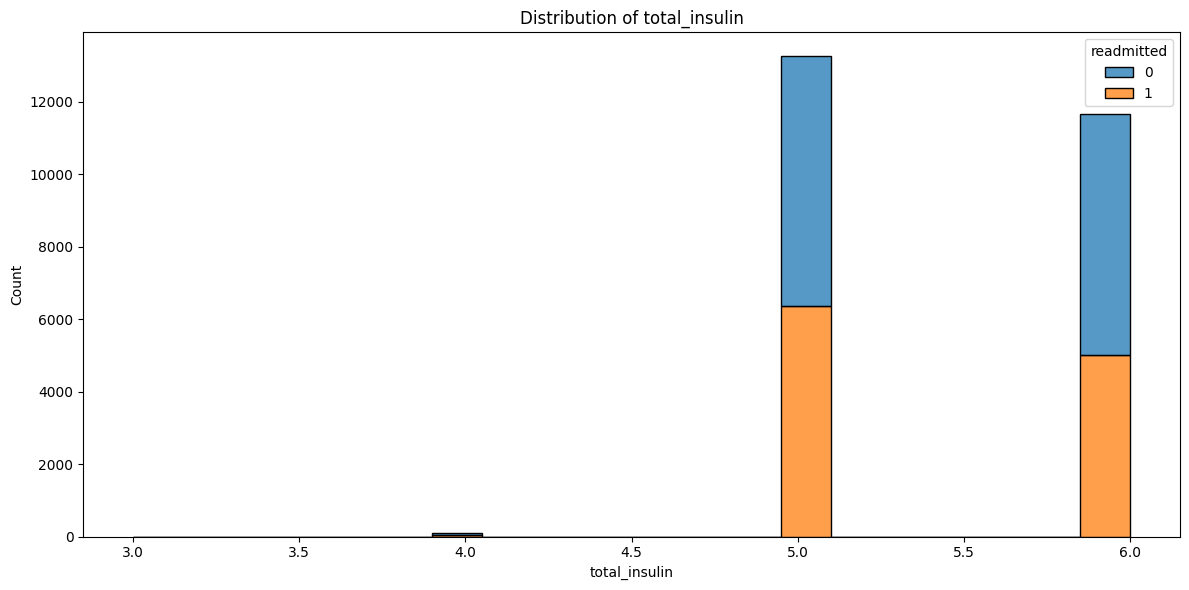

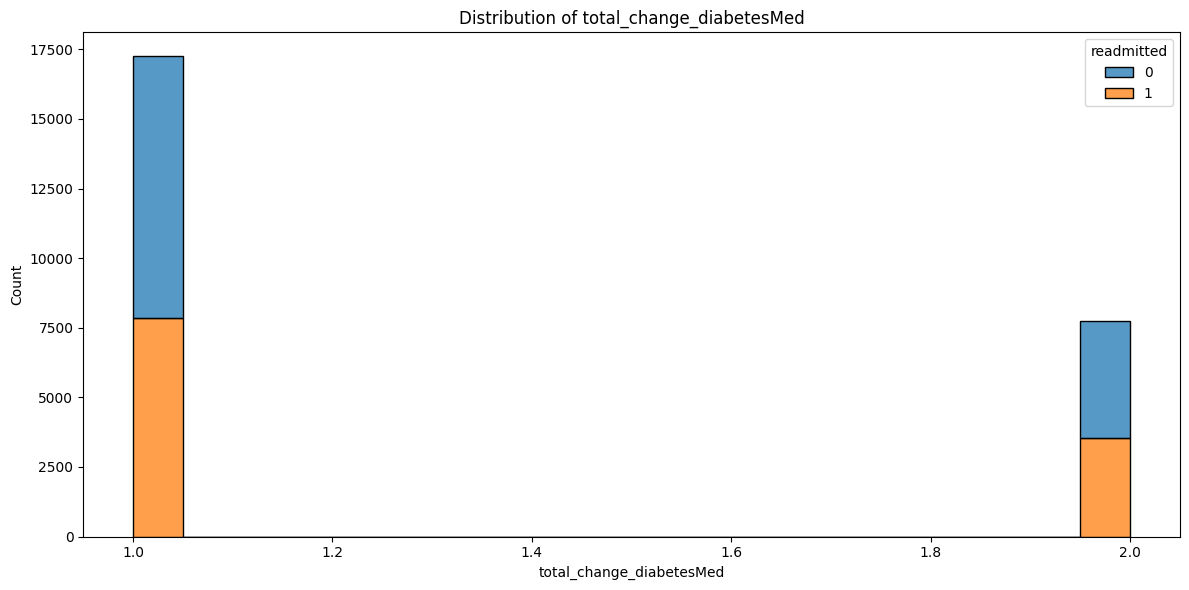

In [38]:
# Perform EDA for each derived variable
for variable in derived_variables:
    plt.figure(figsize=(12, 6))
    if df[variable].dtype == 'object':
        sns.countplot(data=df, x=variable, hue='readmitted', palette='Set1')
        plt.title(f'Readmission by {variable}')
        plt.xticks(rotation=45)
    else:
        sns.histplot(data=df, x=variable, hue='readmitted', multiple='stack', bins=20)
        plt.title(f'Distribution of {variable}')
    plt.tight_layout()
    plt.show()

In [39]:
# Calculate EDA results in numbers and percentages
eda_results = pd.DataFrame(columns=['Variable', 'Readmitted=0', 'Readmitted=1', 'Total', 'Percent_Readmitted=1'])

for variable in derived_variables:
    grouped = df.groupby([variable, 'readmitted'])['readmitted'].count().unstack()
    grouped = grouped.fillna(0)
    total = grouped.sum(axis=1)
    percent_readmitted = (grouped[1] / total) * 100

    eda_results = eda_results.append({
        'Variable': variable,
        'Readmitted=0': grouped[0],
        'Readmitted=1': grouped[1],
        'Total': total,
        'Percent_Readmitted=1': percent_readmitted
    }, ignore_index=True)

In [40]:
# Iterate through the rows of the eda_results DataFrame and print the results
for index, row in eda_results.iterrows():
    print(f"Variable: {row['Variable']}")
    print("Readmitted=0:", row['Readmitted=0'])
    print("Readmitted=1:", row['Readmitted=1'])
    print("Total:", row['Total'])
    print("Percent_Readmitted=1:", row['Percent_Readmitted=1'])
    print("\n")

Variable: total_age
Readmitted=0: total_age
0     1335
1    12255
Name: 0, dtype: int64
Readmitted=1: total_age
0      916
1    10494
Name: 1, dtype: int64
Total: total_age
0     2251
1    22749
dtype: int64
Percent_Readmitted=1: total_age
0    40.693025
1    46.129500
dtype: float64


Variable: total_race
Readmitted=0: total_race
0     1036
1    12554
Name: 0, dtype: int64
Readmitted=1: total_race
0      594
1    10816
Name: 1, dtype: int64
Total: total_race
0     1630
1    23370
dtype: int64
Percent_Readmitted=1: total_race
0    36.441718
1    46.281558
dtype: float64


Variable: total_payer
Readmitted=0: total_payer
0     1889
1    11701
Name: 0, dtype: int64
Readmitted=1: total_payer
0     1406
1    10004
Name: 1, dtype: int64
Total: total_payer
0     3295
1    21705
dtype: int64
Percent_Readmitted=1: total_payer
0    42.670713
1    46.090762
dtype: float64


Variable: total_medical_specialty
Readmitted=0: total_medical_specialty
0     2444
1    11146
Name: 0, dtype: int64
Readmitt

## Build the model

### Model with Numerical Data

In [41]:
# Splitting the data into features (X) and target (y)
X_numerical = numerical_data
y = df['readmitted']

# Split the data into training and testing sets
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numerical, y, test_size=0.25, random_state=42)

# Define preprocessing step for numerical variables
numerical_preprocessor = StandardScaler()

# Create a pipeline with preprocessing and RandomForest classifier
pipeline_num = Pipeline([
    ('preprocessor', numerical_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline_num.fit(X_train_num, y_train)

# Predict on the test data
y_pred_num = pipeline_num.predict(X_test_num)

# Calculate accuracy
accuracy_num = accuracy_score(y_test, y_pred_num)
print("Accuracy with numerical data only:", accuracy_num)


Accuracy with numerical data only: 0.58752


### Accuracy with Categorical Variables Only

In [42]:
# Splitting the data into features (X) and target (y)
X_categorical = categorical_data
y = df['readmitted']

# Split the data into training and testing sets
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_categorical, y, test_size=0.25, random_state=42)

# Define preprocessing step for categorical variables
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Create a pipeline with preprocessing and RandomForest classifier
pipeline_cat = Pipeline([
    ('preprocessor', categorical_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline_cat.fit(X_train_cat, y_train)

# Predict on the test data
y_pred_cat = pipeline_cat.predict(X_test_cat)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print("Accuracy with categorical data only:", accuracy_cat)


Accuracy with categorical data only: 0.54928


### Accuracy By Variable Sets

In [43]:
# Define different sets of variables for slicing
variable_sets = [age_variables, race_variables, hospital_variables, payer_variables,
                  medical_specialty_variables, diagnosis_variables, medicine_variables, diabetes_variables]

# Loop through each set of variables and build a model
for var_set in variable_sets:
    # Create a new DataFrame with the selected variables
    selected_vars = var_set + ['readmitted']
    selected_data = df[selected_vars]

    # Separate the target variable and features
    X = selected_data.drop('readmitted', axis=1)
    y = selected_data['readmitted']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Define preprocessing steps for numerical and categorical variables
    numerical_preprocessor = StandardScaler()
    categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

    # Create a column transformer to apply preprocessing to specific columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_preprocessor, X.select_dtypes(include=['int64', 'float64']).columns),
            ('cat', categorical_preprocessor, X.select_dtypes(include=['object']).columns)
        ])

    # Create a pipeline with preprocessing and classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for variable set {var_set}: {accuracy}")


Accuracy for variable set ['age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)', 'age_[40-50)']: 0.54416
Accuracy for variable set ['race_Caucasian', 'race_AfricanAmerican']: 0.54416
Accuracy for variable set ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']: 0.58752
Accuracy for variable set ['payer_code_?', 'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC']: 0.54416
Accuracy for variable set ['medical_specialty_?', 'medical_specialty_InternalMedicine', 'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice', 'medical_specialty_Cardiology']: 0.54496
Accuracy for variable set ['diag_1_428', 'diag_1_414', 'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427', 'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428']: 0.56624
Accuracy for variable set ['max_glu_serum_None', 'A1Cresult_None', 'metformin_No', 'repaglinid

### Accuracy for Independent Variable Model

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.25, random_state=42)

# Define preprocessing steps for numerical and categorical variables
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply preprocessing to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, independent.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_preprocessor, independent.select_dtypes(include=['object']).columns)
    ])

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.628


### Accuracy for Model built with only Derived Variables

In [45]:
# Define the derived variables
derived_vars = ['total_age', 'total_race', 'total_payer', 'total_medical_specialty',
                'total_diagnosis', 'total_meds', 'total_glucose_tests', 'total_insulin', 'total_change_diabetesMed']

# Separate the target variable and features
X = df[derived_vars]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing step for numerical variables
numerical_preprocessor = StandardScaler()

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', numerical_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.53968


### Accuracy for model built by combining existing and Derived variables

In [46]:
# Independent variables
independent_vars = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                    'num_medications', 'number_outpatient', 'number_emergency',
                    'number_inpatient', 'number_diagnoses', 'race_Caucasian',
                    'race_AfricanAmerican', 'gender_Female', 'age_[70-80)',
                    'age_[60-70)', 'age_[50-60)', 'age_[80-90)',
                    'age_[40-50)', 'payer_code_?', 'payer_code_MC',
                    'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
                    'medical_specialty_?', 'medical_specialty_InternalMedicine',
                    'medical_specialty_Emergency/Trauma', 'medical_specialty_Family/GeneralPractice',
                    'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
                    'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
                    'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428', 'max_glu_serum_None',
                    'A1Cresult_None', 'metformin_No', 'repaglinide_No', 'nateglinide_No',
                    'chlorpropamide_No', 'glimepiride_No', 'acetohexamide_No',
                    'glipizide_No', 'glyburide_No', 'tolbutamide_No',
                    'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No',
                    'miglitol_No', 'troglitazone_No', 'tolazamide_No',
                    'examide_No', 'citoglipton_No', 'insulin_No',
                    'glyburide-metformin_No', 'glipizide-metformin_No',
                    'glimepiride-pioglitazone_No', 'metformin-rosiglitazone_No',
                    'metformin-pioglitazone_No', 'change_No', 'diabetesMed_Yes']

# Derived variables
derived_vars = ['total_age', 'total_race', 'total_payer', 'total_medical_specialty',
                'total_diagnosis', 'total_meds', 'total_glucose_tests', 'total_insulin', 'total_change_diabetesMed']

# Combine all variables
selected_vars = independent_vars + derived_vars

# Separate the target variable and features
X = df[selected_vars]
y = df['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing steps for numerical and categorical variables
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply preprocessing to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_preprocessor, X.select_dtypes(include=['object']).columns)
    ])

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.61872


In [47]:
# Combine the datasets and encode categorical variables
combined_data = pd.concat([X_train, X_test], axis=0)
label_encoder = LabelEncoder()

for col in categorical_vars:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Split the data back into training and testing sets
X_train_encoded = combined_data[:len(X_train)]
X_test_encoded = combined_data[len(X_train):]

# List to store accuracy scores for each individual feature
accuracy_scores = []

# Loop through each feature
for idx, feature in enumerate(variables_to_analyze, start=1):
    # Prepare the data with the current feature
    X_train_feature = X_train_encoded[[feature]]
    X_test_feature = X_test_encoded[[feature]]

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train_feature, y_train)

    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test_feature)
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy
    accuracy_scores.append((idx, feature, accuracy))

# Sort accuracy scores from most accurate to least accurate
accuracy_scores.sort(key=lambda x: x[2], reverse=True)

# Print accuracy for each feature (highest to lowest)
for idx, feature, accuracy in accuracy_scores:
    print(f'{idx}. Feature: {feature}, Accuracy: {accuracy:.4f}')


7. Feature: number_inpatient, Accuracy: 0.5942
6. Feature: number_emergency, Accuracy: 0.5720
5. Feature: number_outpatient, Accuracy: 0.5616
27. Feature: diag_1_428, Accuracy: 0.5605
8. Feature: number_diagnoses, Accuracy: 0.5536
31. Feature: diag_2_428, Accuracy: 0.5515
41. Feature: repaglinide_No, Accuracy: 0.5482
37. Feature: diag_3_428, Accuracy: 0.5459
24. Feature: medical_specialty_Emergency/Trauma, Accuracy: 0.5450
51. Feature: acarbose_No, Accuracy: 0.5448
1. Feature: time_in_hospital, Accuracy: 0.5446
3. Feature: num_procedures, Accuracy: 0.5442
9. Feature: race_Caucasian, Accuracy: 0.5442
10. Feature: race_AfricanAmerican, Accuracy: 0.5442
11. Feature: gender_Female, Accuracy: 0.5442
12. Feature: age_[70-80), Accuracy: 0.5442
13. Feature: age_[60-70), Accuracy: 0.5442
14. Feature: age_[50-60), Accuracy: 0.5442
15. Feature: age_[80-90), Accuracy: 0.5442
16. Feature: age_[40-50), Accuracy: 0.5442
17. Feature: payer_code_?, Accuracy: 0.5442
18. Feature: payer_code_MC, Accuracy:

### Actual Model
Since the model with only Independent Variables yielded more accuracy, that is the one to be used for further analysis

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.25, random_state=42)

# Define preprocessing steps for numerical and categorical variables
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply preprocessing to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, independent.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categorical_preprocessor, independent.select_dtypes(include=['object']).columns)
    ])

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.628


### OLS Regression

In [49]:
## OLS Regression

X = sm.add_constant(independent)
model = sm.OLS(dependent, independent)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             readmitted   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     36.53
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:20:28   Log-Likelihood:                -17013.
No. Observations:               25000   AIC:                         3.415e+04
Df Residuals:                   24940   BIC:                         3.463e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Random Forest Classifier Model Building and Accuracies

In [50]:
# Instantiate the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

# Calculate training accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Calculate validation accuracy
validation_pred = model.predict(X_test)
validation_accuracy = accuracy_score(y_test, validation_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", validation_accuracy)

# Calculate training precision
train_precision = precision_score(y_train, train_pred)

# Calculate validation precision
validation_precision = precision_score(y_test, validation_pred)

print("Training Precision:", train_precision)
print("Validation Precision:", validation_precision)

# Calculate training recall
train_recall = recall_score(y_train, train_pred)

# Calculate validation recall
validation_recall = recall_score(y_test, validation_pred)

print("Training Recall:", train_recall)
print("Validation Recall:", validation_recall)

# Calculate training F1 score
train_f1_score = f1_score(y_train, train_pred)

# Calculate validation F1 score
validation_f1_score = f1_score(y_test, validation_pred)

print("Training F1 Score:", train_f1_score)
print("Validation F1 Score:", validation_f1_score)

# Calculate training balanced accuracy
train_balanced_accuracy = balanced_accuracy_score(y_train, train_pred)

# Calculate validation balanced accuracy
validation_balanced_accuracy = balanced_accuracy_score(y_test, validation_pred)

print("Training Balanced Accuracy:", train_balanced_accuracy)
print("Validation Balanced Accuracy:", validation_balanced_accuracy)

Model Accuracy: 0.63
Confusion Matrix:
[[2521  880]
 [1443 1406]]
Training Accuracy: 1.0
Validation Accuracy: 0.62832
Training Precision: 1.0
Validation Precision: 0.6150481189851269
Training Recall: 1.0
Validation Recall: 0.4935064935064935
Training F1 Score: 1.0
Validation F1 Score: 0.5476144109055502
Training Balanced Accuracy: 1.0
Validation Balanced Accuracy: 0.6173795331396037


### Testing Accuracies with Different Number of Variables

In [51]:
# Define preprocessing steps for numerical and categorical variables
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

# Initialize an empty list to store accuracy scores for each model
accuracy_scores = []

# Iterate through different numbers of variables
for num_vars in range(1, len(independent_vars) + 1):
    # Select the first num_vars variables
    selected_vars_subset = independent_vars[:num_vars]

    # Separate the target variable and features
    X_subset = X_train[selected_vars_subset]

    # Preprocess and transform the data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_preprocessor, X_subset.select_dtypes(include=['int64', 'float64']).columns),
            ('cat', categorical_preprocessor, X_subset.select_dtypes(include=['object']).columns)
        ])

    X_preprocessed = preprocessor.fit_transform(X_subset)

    # Train a RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_preprocessed, y_train)

    # Predict on the test data
    X_test_subset = X_test[selected_vars_subset]
    X_test_preprocessed = preprocessor.transform(X_test_subset)
    y_pred = model.predict(X_test_preprocessed)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((num_vars, accuracy))

# Sort accuracy scores from highest to lowest
accuracy_scores.sort(key=lambda x: x[1], reverse=True)

# Print accuracy for each model
for num_vars, accuracy in accuracy_scores:
    print(f'Number of Variables: {num_vars}, Accuracy: {accuracy:.4f}')

Number of Variables: 64, Accuracy: 0.6280
Number of Variables: 49, Accuracy: 0.6259
Number of Variables: 63, Accuracy: 0.6224
Number of Variables: 50, Accuracy: 0.6222
Number of Variables: 57, Accuracy: 0.6190
Number of Variables: 44, Accuracy: 0.6182
Number of Variables: 51, Accuracy: 0.6182
Number of Variables: 34, Accuracy: 0.6181
Number of Variables: 28, Accuracy: 0.6176
Number of Variables: 42, Accuracy: 0.6173
Number of Variables: 55, Accuracy: 0.6171
Number of Variables: 22, Accuracy: 0.6168
Number of Variables: 29, Accuracy: 0.6166
Number of Variables: 46, Accuracy: 0.6166
Number of Variables: 58, Accuracy: 0.6165
Number of Variables: 48, Accuracy: 0.6163
Number of Variables: 52, Accuracy: 0.6162
Number of Variables: 54, Accuracy: 0.6162
Number of Variables: 35, Accuracy: 0.6160
Number of Variables: 37, Accuracy: 0.6158
Number of Variables: 39, Accuracy: 0.6158
Number of Variables: 62, Accuracy: 0.6154
Number of Variables: 45, Accuracy: 0.6150
Number of Variables: 56, Accuracy:

## Logistic Regression

### KMeansSMOTE Oversampling

In [52]:
# Apply KMeansSMOTE for oversampling
smote = KMeansSMOTE(cluster_balance_threshold=0.134, random_state=55, k_neighbors=12, sampling_strategy=0.99)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [53]:
# Train a Logistic Regression model on the resampled data
logistic_model = LogisticRegression(random_state=93)
logistic_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=93)

In [54]:
# Evaluate the model on the test set
test_predictions = logistic_model.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, test_predictions))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      3401
           1       0.57      0.50      0.53      2849

    accuracy                           0.60      6250
   macro avg       0.59      0.59      0.59      6250
weighted avg       0.60      0.60      0.59      6250



In [55]:
# Train a Logistic Regression model on the resampled data
logistic_model = LogisticRegression(random_state=93)
logistic_model.fit(X_resampled, y_resampled)

# Evaluate the model on the training set
train_predictions = logistic_model.predict(X_resampled)
print("Classification Report on Training Set:")
print(classification_report(y_resampled, train_predictions))


Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65     10189
           1       0.64      0.57      0.60     10093

    accuracy                           0.63     20282
   macro avg       0.63      0.63      0.63     20282
weighted avg       0.63      0.63      0.63     20282



In [56]:
# Apply Polynomial features and train a Logistic Regression model
poly = PolynomialFeatures(degree=2)
logistic_poly_model = LogisticRegression(random_state=93)

pipeline = Pipeline([('Polynomial2', poly), ('Logistic_regression', logistic_poly_model)])
pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('Polynomial2', PolynomialFeatures()),
                ('Logistic_regression', LogisticRegression(random_state=93))])

In [57]:
# Evaluate the polynomial logistic regression model on the test set
test_predictions = pipeline.predict(X_test)
classification_rep = classification_report(y_test, test_predictions)

# Print the classification report
print("Classification Report (Polynomial Logistic Regression) on Test Set:")
print(classification_rep)

Classification Report (Polynomial Logistic Regression) on Test Set:
              precision    recall  f1-score   support

           0       0.62      0.69      0.66      3401
           1       0.58      0.50      0.54      2849

    accuracy                           0.60      6250
   macro avg       0.60      0.60      0.60      6250
weighted avg       0.60      0.60      0.60      6250



In [58]:
# Evaluate the polynomial logistic regression model on the training set
train_predictions = pipeline.predict(X_resampled)
classification_rep_train = classification_report(y_resampled, train_predictions)

# Print the classification report for the train set
print("Classification Report (Polynomial Logistic Regression) on Train Set:")
print(classification_rep_train)


Classification Report (Polynomial Logistic Regression) on Train Set:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     10189
           1       0.65      0.57      0.61     10093

    accuracy                           0.63     20282
   macro avg       0.63      0.63      0.63     20282
weighted avg       0.63      0.63      0.63     20282



### ROC Curve for the Linear Regression Model

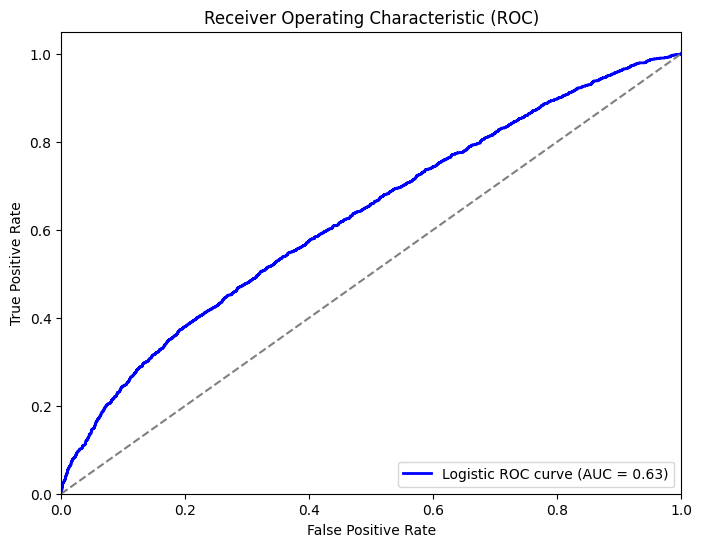

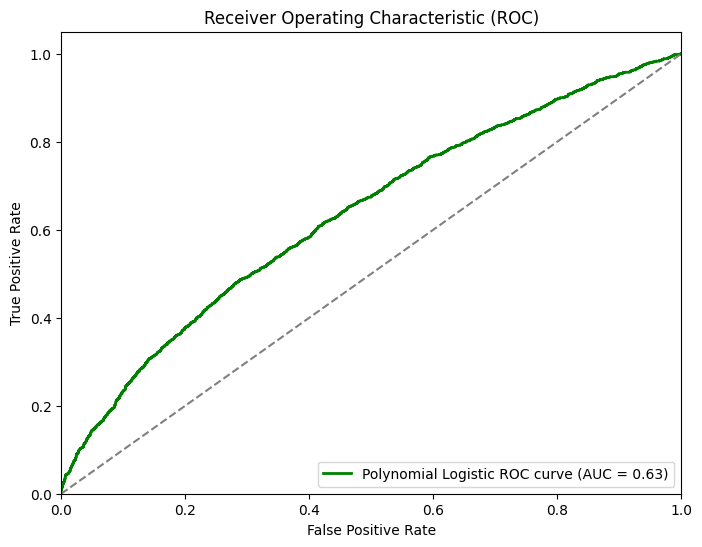

In [59]:
# Calculate predicted probabilities for the logistic model
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Calculate predicted probabilities for the polynomial logistic model
y_pred_proba_poly = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test, y_pred_proba_poly)

# Calculate ROC-AUC score
roc_auc_poly = roc_auc_score(y_test, y_pred_proba_poly)

# Plot ROC curve for polynomial model
plt.figure(figsize=(8, 6))
plt.plot(fpr_poly, tpr_poly, color='green', lw=2, label=f'Polynomial Logistic ROC curve (AUC = {roc_auc_poly:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Confusion Matrix

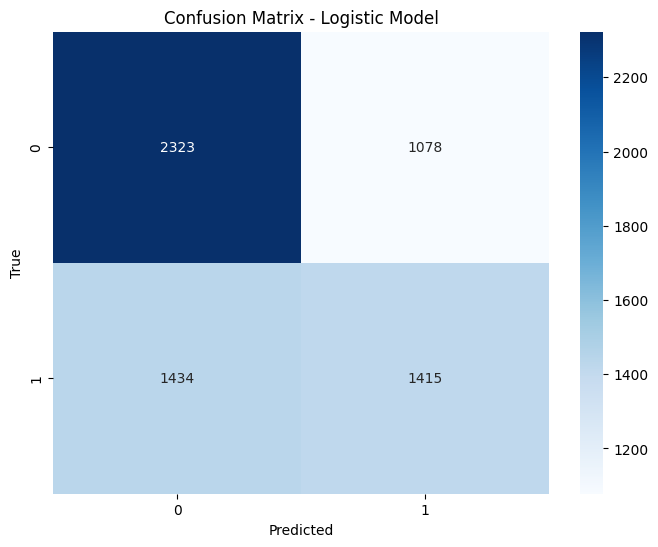

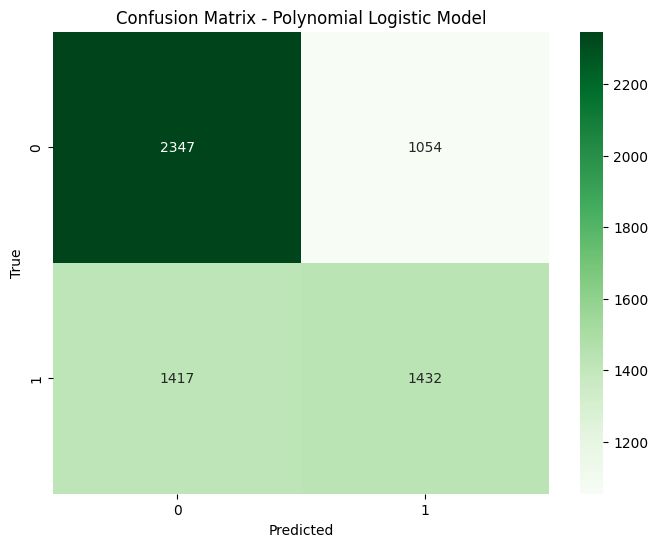

In [60]:
# Confusion matrix for logistic model
logistic_confusion = confusion_matrix(y_test, logistic_model.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Model')
plt.show()

# Confusion matrix for polynomial logistic model
poly_confusion = confusion_matrix(y_test, pipeline.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(poly_confusion, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Polynomial Logistic Model')
plt.show()


## Support Vector Machine

In [61]:
# Create and train the Support Vector Machine model
svm_model = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and other hyperparameters
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [63]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [64]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6106
Confusion Matrix:
[[2988  413]
 [2021  828]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.88      0.71      3401
           1       0.67      0.29      0.40      2849

    accuracy                           0.61      6250
   macro avg       0.63      0.58      0.56      6250
weighted avg       0.63      0.61      0.57      6250



In [65]:
# Make predictions on the training set
train_predictions = svm_model.predict(X_train)

# Generate classification report for the training set
print("Support Vector Machine Model - Training Set")
print(classification_report(y_train, train_predictions))



Support Vector Machine Model - Training Set
              precision    recall  f1-score   support

           0       0.60      0.88      0.71     10189
           1       0.67      0.29      0.41      8561

    accuracy                           0.61     18750
   macro avg       0.64      0.59      0.56     18750
weighted avg       0.63      0.61      0.57     18750



In [66]:
# Make predictions on the test set
test_predictions = svm_model.predict(X_test)

# Generate classification report for the test set
print("Support Vector Machine Model - Test Set")
print(classification_report(y_test, test_predictions))


Support Vector Machine Model - Test Set
              precision    recall  f1-score   support

           0       0.60      0.88      0.71      3401
           1       0.67      0.29      0.40      2849

    accuracy                           0.61      6250
   macro avg       0.63      0.58      0.56      6250
weighted avg       0.63      0.61      0.57      6250



### ROC Curve for SVM Model

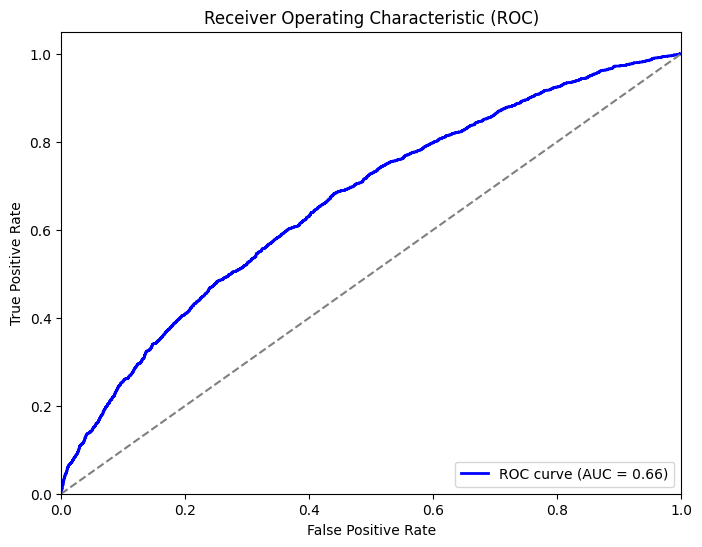

In [67]:
# Calculate predicted probabilities for the positive class
y_pred_proba = svm_model.decision_function(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Confusion Matrix

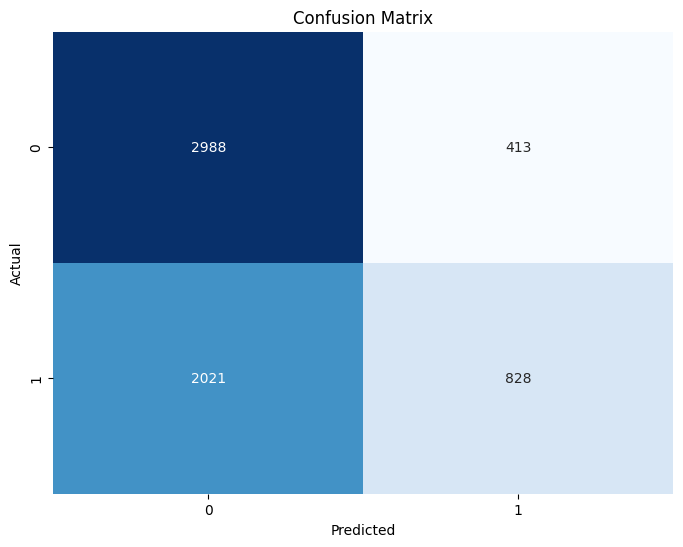

In [68]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XG Boost

In [69]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=93, max_depth=3, learning_rate=0.80)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, random_state=93)

In [70]:
# Evaluate the Gradient Boosting model
print(classification_report(y_train, gb_model.predict(X_train)))


              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10189
           1       0.69      0.58      0.63      8561

    accuracy                           0.69     18750
   macro avg       0.69      0.68      0.68     18750
weighted avg       0.69      0.69      0.69     18750



In [71]:
# Check for invalid characters and replace them with underscores
X_train.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train.columns]
X_test.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test.columns]

In [72]:
# Initialize and train the XGBoost model
xg_model = XGBClassifier(n_estimators=150, max_depth=4)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
# Evaluate the XGBoost model on training data
print(classification_report(y_train, xg_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10189
           1       0.72      0.60      0.65      8561

    accuracy                           0.71     18750
   macro avg       0.71      0.70      0.70     18750
weighted avg       0.71      0.71      0.71     18750



In [74]:
# Evaluate the XGBoost model on testing data
print(classification_report(y_test, xg_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      3401
           1       0.60      0.51      0.55      2849

    accuracy                           0.62      6250
   macro avg       0.62      0.61      0.61      6250
weighted avg       0.62      0.62      0.62      6250



### ROC Curve for XGBoost Model

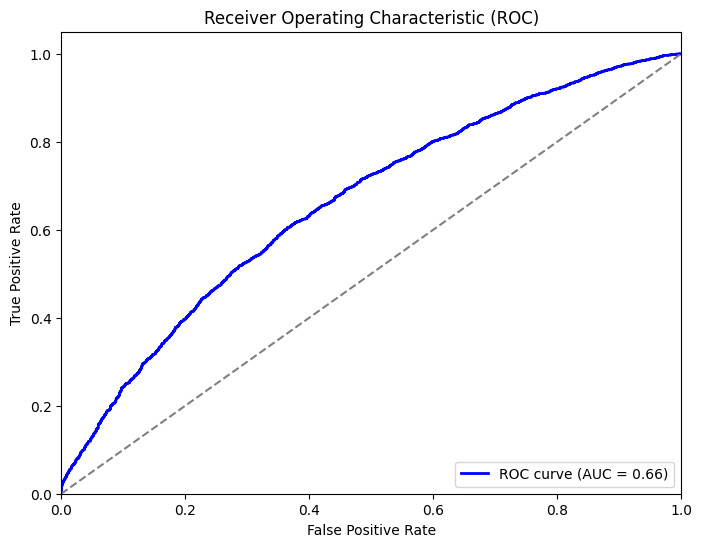

In [75]:
# Predict probabilities for the positive class
y_pred_proba = xg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Confusion Matrix

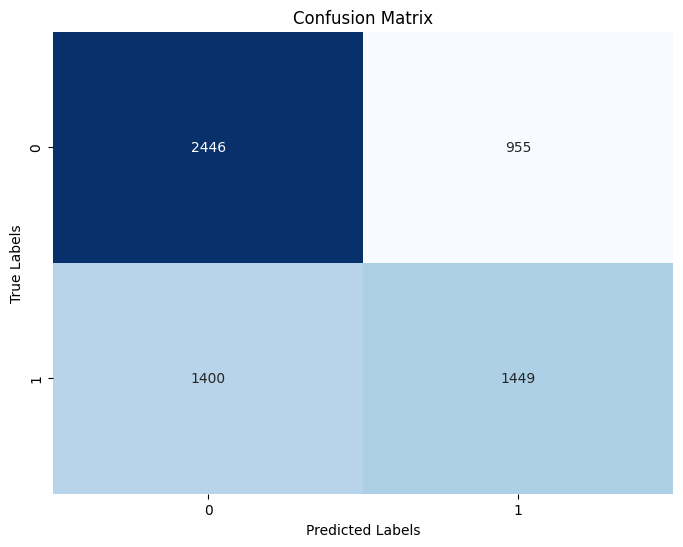

In [76]:
# Predict the target labels
y_pred = xg_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

In [77]:
# Initialize and train the Gaussian Naive Bayes model
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [78]:
# Evaluate the model on the training set
train_predictions = naive_model.predict(X_train)
print("Training Set Performance:")
print(classification_report(y_train, train_predictions))

Training Set Performance:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67     10189
           1       0.59      0.47      0.52      8561

    accuracy                           0.61     18750
   macro avg       0.60      0.60      0.59     18750
weighted avg       0.60      0.61      0.60     18750



In [79]:
# Evaluate the model on the testing set
test_predictions = naive_model.predict(X_test)
print("Testing Set Performance:")
print(classification_report(y_test, test_predictions))

Testing Set Performance:
              precision    recall  f1-score   support

           0       0.63      0.73      0.67      3401
           1       0.60      0.48      0.53      2849

    accuracy                           0.62      6250
   macro avg       0.61      0.60      0.60      6250
weighted avg       0.61      0.62      0.61      6250



### ROC Curve

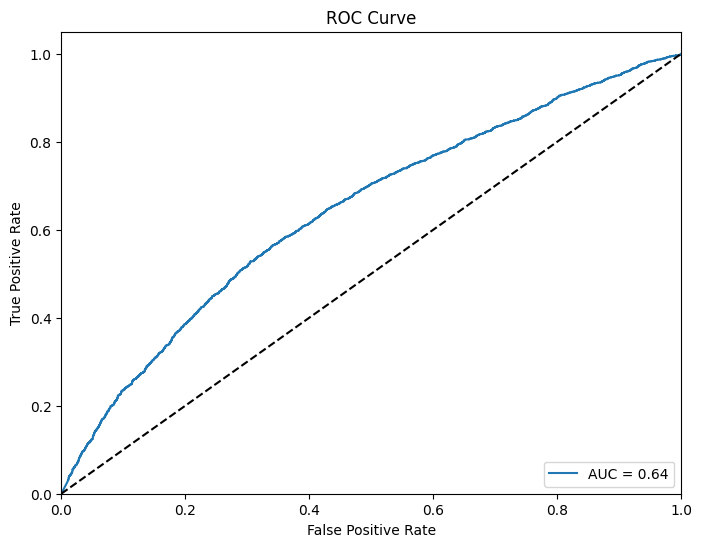

In [80]:
# Calculate the predicted probabilities
y_pred_prob = naive_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Confusion Matrix

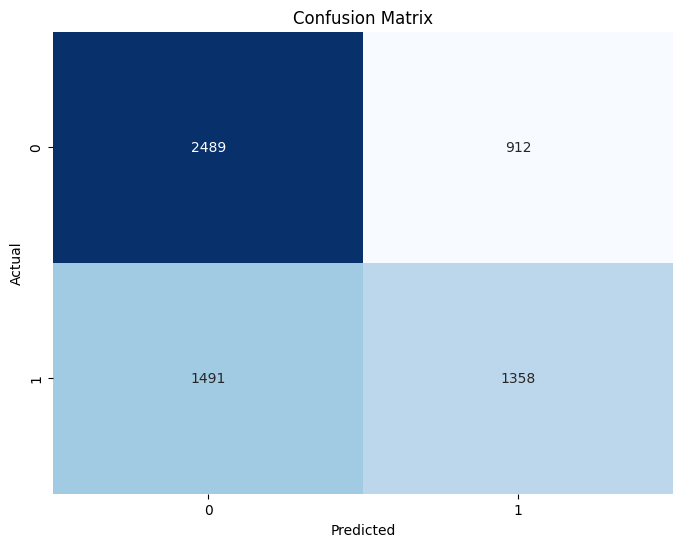

In [81]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## KNN

In [82]:
# Preprocess the data: scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [84]:
# Evaluate the model
print("K-Nearest Neighbors Model - Training Set (Original Data)")
print(classification_report(y_train, knn_model.predict(X_train_scaled)))

K-Nearest Neighbors Model - Training Set (Original Data)
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10189
           1       0.71      0.64      0.67      8561

    accuracy                           0.72     18750
   macro avg       0.71      0.71      0.71     18750
weighted avg       0.72      0.72      0.71     18750



In [85]:
# Evaluate the model
print("K-Nearest Neighbors Model - Testing Set (Original Data)")
print(classification_report(y_test, knn_model.predict(X_test_scaled)))

K-Nearest Neighbors Model - Testing Set (Original Data)
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      3401
           1       0.52      0.46      0.49      2849

    accuracy                           0.56      6250
   macro avg       0.55      0.55      0.55      6250
weighted avg       0.56      0.56      0.56      6250



### ROC Curve

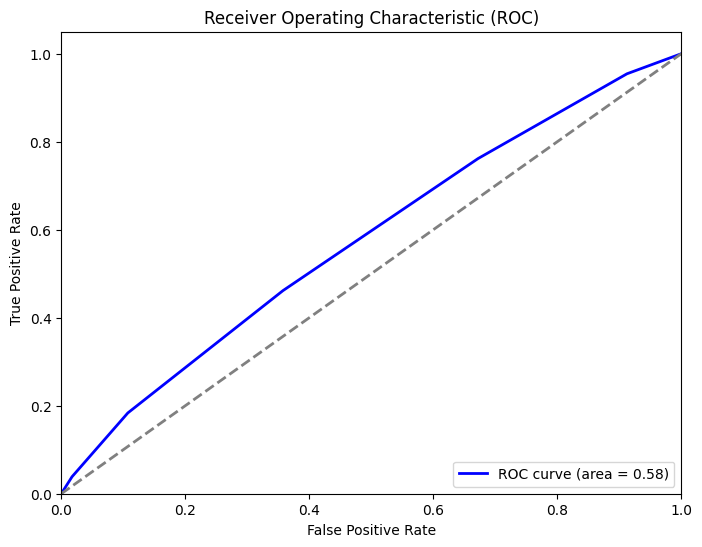

In [86]:
# Calculate ROC curve and ROC AUC score
y_test_prob = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix

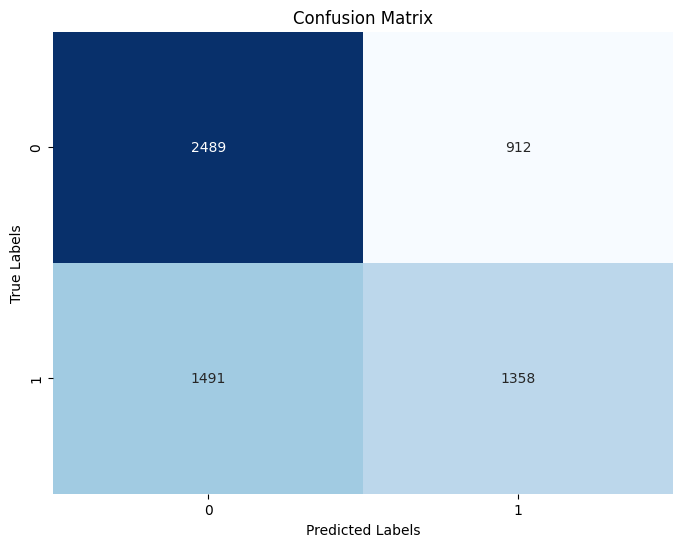

In [87]:
# Calculate confusion matrix for testing set predictions
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Neural Networks

In [88]:
# Build a neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),             # Hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),              # Hidden layer with ReLU activation
    layers.Dense(1, activation='sigmoid')             # Output layer with sigmoid activation
])

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [90]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)



Epoch 1/10
528/528 [==============================] - 4s 3ms/step - loss: 0.6615 - accuracy: 0.6043 - val_loss: 0.6493 - val_accuracy: 0.6341
Epoch 2/10
528/528 [==============================] - 1s 3ms/step - loss: 0.6381 - accuracy: 0.6333 - val_loss: 0.6473 - val_accuracy: 0.6539
Epoch 3/10
528/528 [==============================] - 1s 3ms/step - loss: 0.6268 - accuracy: 0.6460 - val_loss: 0.6557 - val_accuracy: 0.6373
Epoch 4/10
528/528 [==============================] - 1s 3ms/step - loss: 0.6179 - accuracy: 0.6557 - val_loss: 0.6680 - val_accuracy: 0.6347
Epoch 5/10
528/528 [==============================] - 2s 4ms/step - loss: 0.6083 - accuracy: 0.6636 - val_loss: 0.6680 - val_accuracy: 0.6235
Epoch 6/10
528/528 [==============================] - 2s 4ms/step - loss: 0.5984 - accuracy: 0.6697 - val_loss: 0.6734 - val_accuracy: 0.6181
Epoch 7/10
528/528 [==============================] - 2s 4ms/step - loss: 0.5885 - accuracy: 0.6820 - val_loss: 0.6777 - val_accuracy: 0.6203
Epoch 

In [91]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

196/196 [==============================] - 0s 2ms/step


In [92]:
# Print the classification report
print("Neural Network Model - Testing Set")
print(classification_report(y_test, y_pred))

Neural Network Model - Testing Set
              precision    recall  f1-score   support

           0       0.62      0.67      0.65      3401
           1       0.57      0.51      0.53      2849

    accuracy                           0.60      6250
   macro avg       0.59      0.59      0.59      6250
weighted avg       0.59      0.60      0.59      6250



In [93]:
# Evaluate the model on the training set
train_pred_prob = model.predict(X_train_scaled)
train_pred = (train_pred_prob > 0.5).astype(int)

# Print the classification report for training set
print("Neural Network Model - Training Set")
print(classification_report(y_train, train_pred))

586/586 [==============================] - 1s 1ms/step
Neural Network Model - Training Set
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     10189
           1       0.73      0.67      0.70      8561

    accuracy                           0.74     18750
   macro avg       0.74      0.73      0.73     18750
weighted avg       0.74      0.74      0.73     18750



### ROC Curve

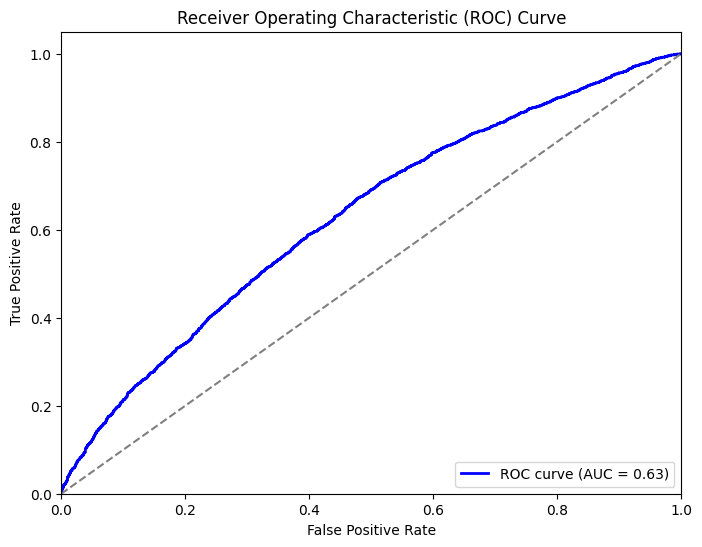

In [94]:
# Calculate ROC curve and AUC score for testing set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Confusion Matrix

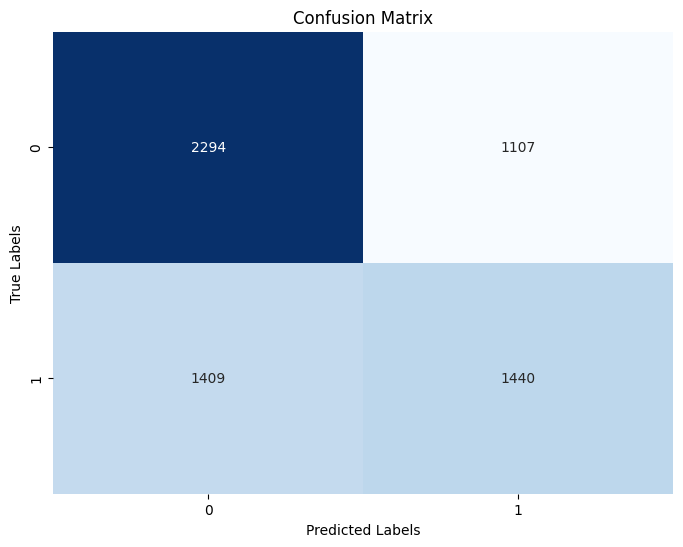

In [95]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
